## **Sommaire**

1. [Introduction](#Introduction)  
2. [Nettoyage et traitement du jeu de données](#Nettoyage-et-traitement-du-jeu-de-données)  
    1. [Nettoyer le jeu de données](#Nettoyer-le-jeu-de-données)  
    2. [Automatisation](#Automatisation)  
3. [Identification et traitement des valeurs aberrantes](#Identification-et-traitement-des-valeurs-aberrantes)  
    1. [Outliers valeurs numériques](#Outliers-valeurs-numériques)  
    2. [Outliers valeurs non numériques](#Outliers-valeurs-non-numériques)  
4. [Identification et traitement des valeurs manquantes](#Identification-et-traitement-des-valeurs-manquantes)  
5. [Analyse univariée et bivariée](#Analyse-univariée-et-bivariée)  
    1. [Analyse univariée](#Analyse-univariée)  
    2. [Analyse bivariée](#Analyse-bivariée)  
6. [Analyse multivariée](#Analyse-multivariée)
7. [Conclusion](#Conclusion)

## **Introduction**

L’agence Santé publique France confie à votre entreprise la création d’un système de suggestion ou d’auto-complétion pour aider les usagers à remplir plus efficacement la base de données. Dans un premier temps, vous devez vous concentrer sur la prise en main des données, et d’abord les nettoyer et les explorer. 
Vous êtes missionné sur le projet de nettoyage et exploration des données en interne, afin de déterminer la faisabilité de cette idée d’application de Santé publique France.

Plusieurs étapes devront être respecté dans la réalisation de ce projet :
- Un nettoyage complet de notre jeu de données
- Un traitement des valeurs aberrantes + des valeurs manquantes
- Des analyses uni-varié, bi-varié et multi-varié

In [458]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from scipy.stats import f_oneway
from sklearn.decomposition import PCA

In [460]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

## **Nettoyage et traitement du jeu de données**

### *Nettoyer le jeu de données*

In [464]:
# Chargement + affichage de la base de données
data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')
data.head(1)

C:\Users\guill\AppData\Local\Temp\ipykernel_11688\3422870900.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')


code                                                url  \
0  3087  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   

  last_modified_t last_modified_datetime        product_name generic_name  \
0      1474103893   2016-09-17T09:18:13Z  Farine de blé noir          NaN   

  quantity packaging packaging_tags           brands      brands_tags  \
0      1kg       NaN            NaN  Ferme t'y R'nao  ferme-t-y-r-nao   

  categories categories_tags categories_fr origins origins_tags  \
0        NaN             NaN           NaN     NaN          NaN   

  manufacturing_places manufacturing_places_tags labels labels_tags labels_fr  \
0                  NaN                       NaN    NaN         NaN       NaN   

  emb_codes emb_codes_tags first_packaging_code_geo cities cities_tags  \
0       NaN            NaN                      NaN    NaN         NaN   

  purchase_places stores countries countries_tags countries_fr  \
0             NaN    NaN     en:FR      en:france       France   

  ingredients_text allergens allergens_fr traces traces_tags traces_fr  \
0              NaN       NaN          NaN    NaN         NaN       NaN   

  serving_size  no_nutriments  additives_n additives additives_tags  \
0          NaN            NaN          NaN       NaN            NaN   

  additives_fr  ingredients_from_palm_oil_n  ingredients_from_palm_oil  \
0          NaN                          NaN                        NaN   

  ingredients_from_palm_oil_tags  ingredients_that_may_be_from_palm_oil_n  \
0                            NaN                                      NaN   

   ingredients_that_may_be_from_palm_oil  \
0                                    NaN   

  ingredients_that_may_be_from_palm_oil_tags  nutrition_grade_uk  \
0                                        NaN                 NaN   

  nutrition_grade_fr pnns_groups_1 pnns_groups_2  \
0                NaN           NaN           NaN   

                                              states  \
0  en:to-be-completed, en:nutrition-facts-to-be-c...   

                                         states_tags  \
0  en:to-be-completed,en:nutrition-facts-to-be-co...   

                                           states_fr main_category  \
0  A compléter,Informations nutritionnelles à com...           NaN   

  main_category_fr image_url image_small_url  energy_100g  \
0              NaN       NaN             NaN          NaN   

   energy-from-fat_100g  fat_100g  saturated-fat_100g  butyric-acid_100g  \
0                   NaN       NaN                 NaN                NaN   

   caproic-acid_100g  caprylic-acid_100g  capric-acid_100g  lauric-acid_100g  \
0                NaN                 NaN               NaN               NaN   

   myristic-acid_100g  palmitic-acid_100g  stearic-acid_100g  \
0                 NaN                 NaN                NaN   

   arachidic-acid_100g  behenic-acid_100g  lignoceric-acid_100g  \
0                  NaN                NaN                   NaN   

   cerotic-acid_100g  montanic-acid_100g  melissic-acid_100g  \
0                NaN                 NaN                 NaN   

   monounsaturated-fat_100g  polyunsaturated-fat_100g  omega-3-fat_100g  \
0                       NaN                       NaN               NaN   

   alpha-linolenic-acid_100g  eicosapentaenoic-acid_100g  \
0                        NaN                         NaN   

   docosahexaenoic-acid_100g  omega-6-fat_100g  linoleic-acid_100g  \
0                        NaN               NaN                 NaN   

   arachidonic-acid_100g  gamma-linolenic-acid_100g  \
0                    NaN                        NaN   

   dihomo-gamma-linolenic-acid_100g  omega-9-fat_100g  oleic-acid_100g  \
0                               NaN               NaN              NaN   

   elaidic-acid_100g  gondoic-acid_100g  mead-acid_100g  erucic-

In [465]:
# Affichage des types de nos variables
data.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

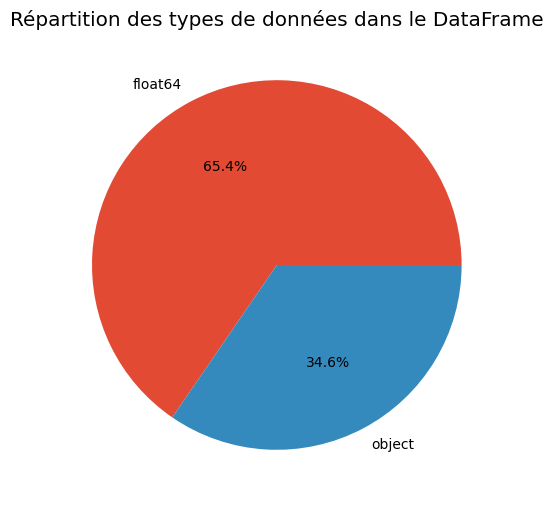

In [466]:
# Affichage des types de nos variables
data_types_counts = data.dtypes.value_counts()
# Création du camembert
plt.figure(figsize=(8, 6))
plt.pie(data_types_counts, labels=data_types_counts.index, autopct='%1.1f%%')
plt.title("Répartition des types de données dans le DataFrame")
plt.show()

In [467]:
# Colonnes numériques
colonnes_numeriques = data.select_dtypes(include=['number']).columns.tolist()
# Colonnes catégorielles
colonnes_categorielles = data.select_dtypes(include=['object', 'category']).columns.tolist()

In [468]:
# Recherche des valeurs manquantes
missing_values = data.isnull().mean() * 100
missing_values

code                                            0.007170
url                                             0.007170
creator                                         0.000623
created_t                                       0.000935
created_datetime                                0.002806
last_modified_t                                 0.000000
last_modified_datetime                          0.000000
product_name                                    5.537266
generic_name                                   83.541269
quantity                                       67.322896
packaging                                      75.384385
packaging_tags                                 75.384073
brands                                          8.857382
brands_tags                                     8.859876
categories                                     73.685359
categories_tags                                73.691906
categories_fr                                  73.685047
origins                        

In [469]:
# Renvoie le nombre de valeurs uniques
data['pnns_groups_1'].nunique()

14

In [470]:
# Supprimer les lignes ou 'pnns_groups_1' est vide
data_test = data.dropna(subset=['pnns_groups_1'])

In [471]:
# Afficher le nombre de lignes restantes
data_test.shape

(91513, 162)

In [472]:
# Séparer la colonne pnns_groups_1
cible = data_test['pnns_groups_1']
# Conserver le reste des colonnes dans data_test
data_test = data_test.drop(columns=['pnns_groups_1'])

In [473]:
# Pourcentage de données présentes
present_values = data_test.notnull().mean() * 100
present_values

code                                          100.000000
url                                           100.000000
creator                                        99.997815
created_t                                     100.000000
created_datetime                               99.998907
last_modified_t                               100.000000
last_modified_datetime                        100.000000
product_name                                   96.705386
generic_name                                   56.055424
quantity                                       88.981893
packaging                                      80.524079
packaging_tags                                 80.527357
brands                                         95.827915
brands_tags                                    95.824637
categories                                     88.935998
categories_tags                                88.935998
categories_fr                                  88.935998
origins                        

In [474]:
# Filtrage à plus de 50%
colonnes_plus_50 = present_values[present_values > 50]
colonnes_plus_50

code                                       100.000000
url                                        100.000000
creator                                     99.997815
created_t                                  100.000000
created_datetime                            99.998907
last_modified_t                            100.000000
last_modified_datetime                     100.000000
product_name                                96.705386
generic_name                                56.055424
quantity                                    88.981893
packaging                                   80.524079
packaging_tags                              80.527357
brands                                      95.827915
brands_tags                                 95.824637
categories                                  88.935998
categories_tags                             88.935998
categories_fr                               88.935998
purchase_places                             61.393463
stores                      

In [475]:
# Test avec nos features
data['states_fr'].nunique()

1021

In [476]:
# Suite du test
categories_uniques = data_test['states_fr'].unique()
categories_uniques

array(['A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite complétée,Caractéristiques à compléter,Catégories complétées,Marques à compléter,Emballage complété,Quantité complétée,Nom du produit complete,Photos à valider,Photos envoyées',
       'A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à valider,Photos envoyées',
       'A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques à compléter,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer',
       'A compléter,Informations nutritionnelles complétées,Ingrédients à compléter,Date limite à compléter,en:Packaging-code-to-be-completed,Car

In [477]:
# Sélection des variables
colonnes_selectionnees = ['main_category_fr', 'nutrition_grade_fr', 'countries', 'salt_100g', 'proteins_100g', 'sugars_100g', 'carbohydrates_100g', 'saturated-fat_100g', 'fat_100g', 'energy_100g']
data_cat = data_test[colonnes_selectionnees]
data_cat.head()

main_category_fr nutrition_grade_fr   countries  salt_100g  proteins_100g  \
46    Filet-de-boeuf                NaN      France        NaN            NaN   
106              NaN                  e  France, US    0.09652           2.50   
136              NaN                NaN      France        NaN            NaN   
138              NaN                NaN  France, US        NaN           6.25   
174    Légumes frais                  c      Canada    2.16000          22.00   

     sugars_100g  carbohydrates_100g  saturated-fat_100g  fat_100g  \
46           NaN                 NaN                 NaN       NaN   
106         57.5               70.00                12.5     20.00   
136          NaN                 NaN                 NaN       NaN   
138          NaN               77.08                 NaN      4.17   
174          0.0               23.00                 7.0     12.00   

     energy_100g  
46           NaN  
106       1883.0  
136          NaN  
138       1481.0  
174       1210.0

In [478]:
# Affichage du nombre de colonnes
data_cat.shape

(91513, 10)

In [479]:
# Recherche de doublons
num_duplicate = data_cat.duplicated().sum()
num_duplicate

25363

In [480]:
# Affichage des doublons
doublons = data_cat[data_cat.duplicated(keep=False)]
doublons.head()

main_category_fr nutrition_grade_fr  \
136                                      NaN                NaN   
177                                    Pains                NaN   
182  Aliments et boissons à base de végétaux                NaN   
184                                   Sablés                NaN   
187                                  Bonbons                NaN   

          countries  salt_100g  proteins_100g  sugars_100g  \
136          France        NaN            NaN          NaN   
177  United Kingdom        NaN            NaN          NaN   
182          France        NaN            NaN          NaN   
184          France        NaN            NaN          NaN   
187          France        NaN            NaN          NaN   

     carbohydrates_100g  saturated-fat_100g  fat_100g  energy_100g  
136                 NaN                 NaN       NaN          NaN  
177                 NaN                 NaN       NaN          NaN  
182                 NaN                 NaN       NaN          NaN  
184                 NaN                 NaN       NaN          NaN  
187                 NaN                 NaN       NaN          NaN

In [481]:
# Suppression des doublons
data_cat = data_cat.drop_duplicates()

In [482]:
# Recherche de doublons
num_duplicate2 = data_cat.duplicated().sum()
num_duplicate2

0

In [483]:
#Affichage du nombre de lignes restantes
data_cat.shape

(66150, 10)

### *Automatisation*

In [485]:
# Copie de data_cat
data_cat2 = data_cat.copy()

In [486]:
def process_data(data, cible, variables):


    # Calculer le pourcentage de valeurs manquantes par colonne
    missing_values = data.isnull().mean() * 100
    print("Pourcentage de valeurs manquantes par colonne :\n", missing_values)

    # Supprimer les lignes où la colonne cible est manquante
    data_test = data.dropna(subset=[cible])

    # Séparer la colonne cible
    cible_test = data_test[cible]

    # Supprimer la colonne cible du DataFrame 'data_test'
    data_test = data_test.drop(columns=[cible])

    # Calculer le pourcentage de valeurs présentes par colonne et sélectionner les colonnes avec plus de 50 % de données présentes
    present_values = data_test.notnull().mean() * 100
    colonnes_plus_50 = present_values[present_values > 50].index.tolist()
    print("Colonnes avec plus de 50% de données présentes :\n", colonnes_plus_50)

    # Utiliser la liste de variables fournies pour la sélection des colonnes
    colonnes_selectionnees = [col for col in variables if col in data_test.columns]
    print("Colonnes sélectionnées :\n", colonnes_selectionnees)

    # Filtrer 'data_test' pour garder uniquement les colonnes sélectionnées
    data_cat2 = data_test[colonnes_selectionnees]

    # Identifier et supprimer les doublons
    num_duplicate = data_cat2.duplicated().sum()
    doublons = data_cat2[data_cat2.duplicated(keep=False)]
    data_cat = data_cat2.drop_duplicates()

    print(f"Nombre de doublons supprimés : {num_duplicate}")

    return data_cat2

# Exemple d'utilisation :
# Liste des colonnes spécifiques à conserver
variables = ['main_category_fr', 'nutrition_grade_fr', 'countries', 'salt_100g', 'proteins_100g', 'sugars_100g', 'carbohydrates_100g', 'saturated-fat_100g', 'fat_100g', 'energy_100g']

data_cat2 = process_data(data, cible='pnns_groups_1', variables=variables)

Pourcentage de valeurs manquantes par colonne :
 code                                            0.007170
url                                             0.007170
creator                                         0.000623
created_t                                       0.000935
created_datetime                                0.002806
last_modified_t                                 0.000000
last_modified_datetime                          0.000000
product_name                                    5.537266
generic_name                                   83.541269
quantity                                       67.322896
packaging                                      75.384385
packaging_tags                                 75.384073
brands                                          8.857382
brands_tags                                     8.859876
categories                                     73.685359
categories_tags                                73.691906
categories_fr                          

Au cours de cette étape, nous avons sélectionner notre cible : pnns_groups_1. Elle présente moins de 50% de valeurs présentes et ne dispose que de 14 sous-catégorie différentes ce qui rendra son analyse plus pertinentes.
Pour ce qui est du dataframe, nous ne garderons que les features les plus interessantes à analyser. Nous garderons :
'main_category_fr', 'nutrition_grade_fr', 'countries', 'salt_100g', 'proteins_100g', 'sugars_100g', 'carbohydrates_100g', 'saturated-fat_100g', 'fat_100g', 'energy_100g'. 

Maintenant occupons nous des valeurs aberrantes de notre dataset.

## **Identification et traitement des valeurs aberrantes**

### *Outliers valeurs numériques*

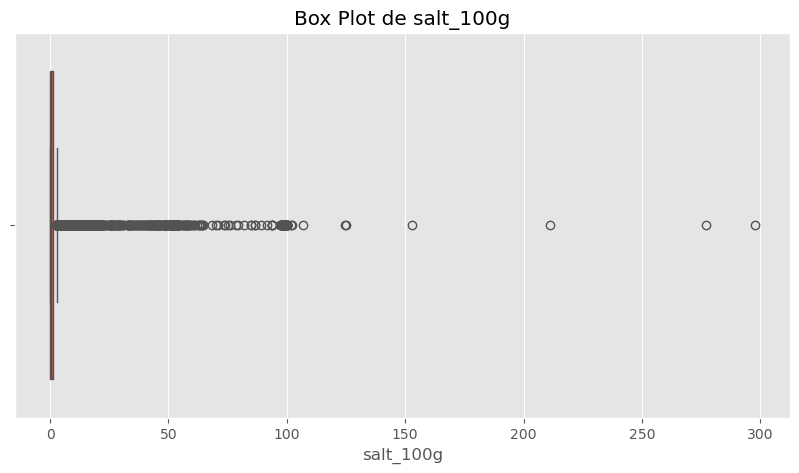

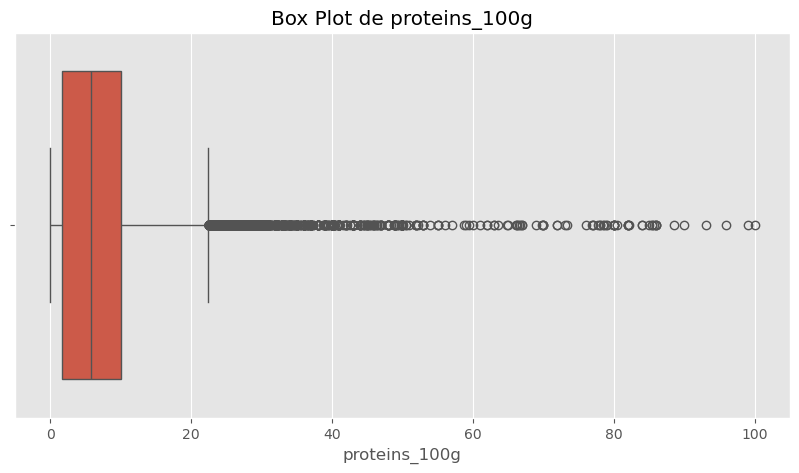

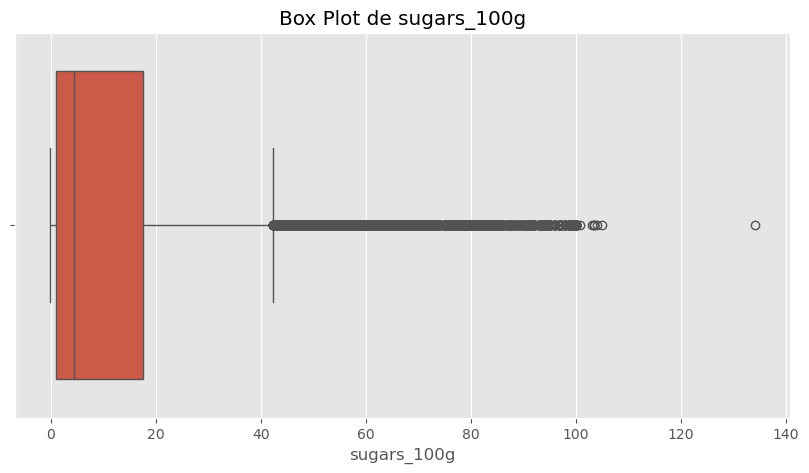

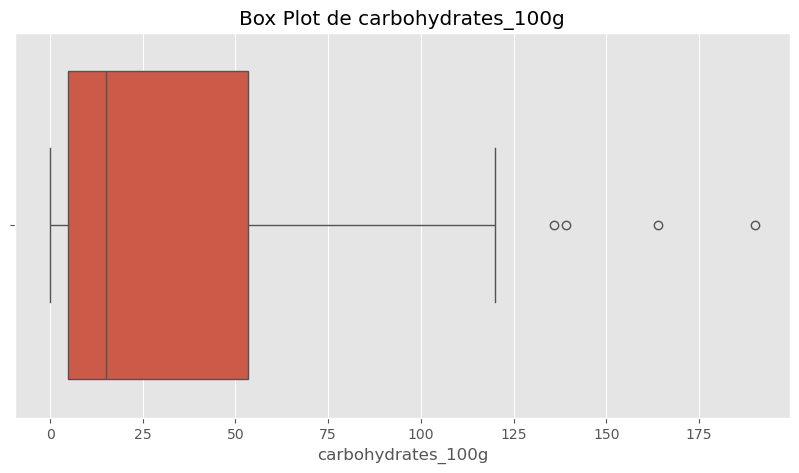

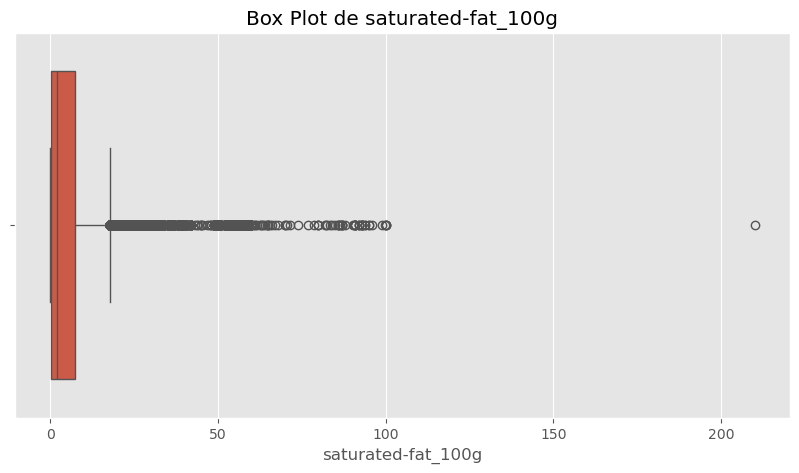

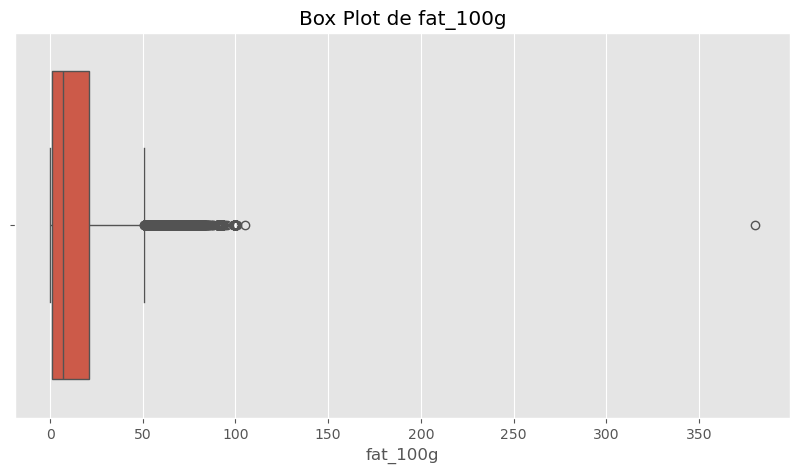

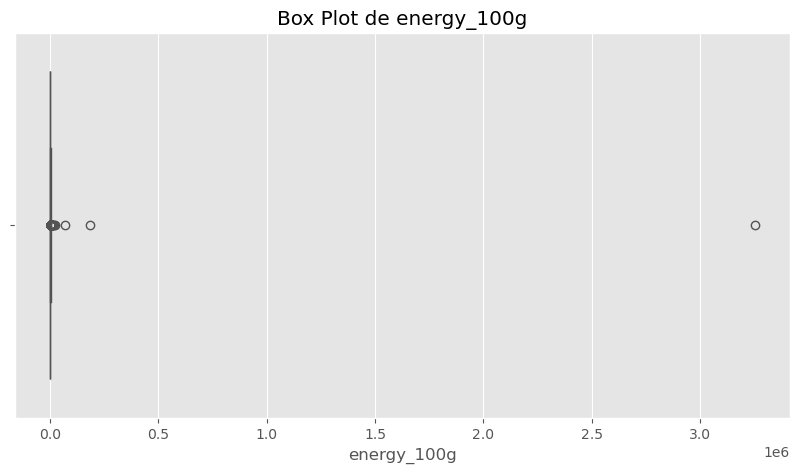

In [491]:
# Boxplot des valeurs numériques
for column in data_cat.columns:
    if data_cat[column].dtype in ['float64']:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=data_cat[column])
        plt.title(f"Box Plot de {column}")
        plt.xlabel(column)
        plt.show()

salt_100g, proteins_100g, sugar_100g, carbohydrates_100g, saturated-fat_100g, fat_100g et energy_100g présentent des outliers. Certaines plus que d'autre. Utilisons maintenant un outils statistiques afin des les traiter.


In [493]:
# Définition d'un min et d'un max
features = ['salt', 'sugars','saturated-fat','proteins','fat', 'carbohydrates']
max_possible, min_possible = 100, 0
for feat in features:
    data_cat.loc[data[feat + '_100g'] > max_possible, feat + '_100g'] = max_possible
    data_cat.loc[data[feat + '_100g'] < min_possible, feat + '_100g'] = min_possible

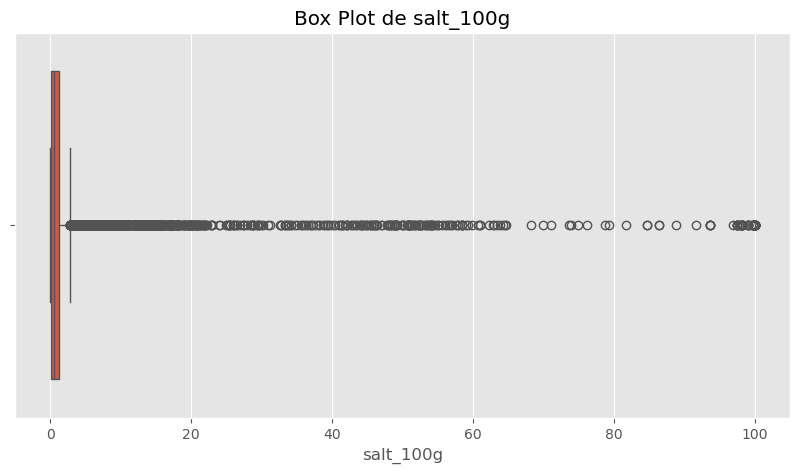

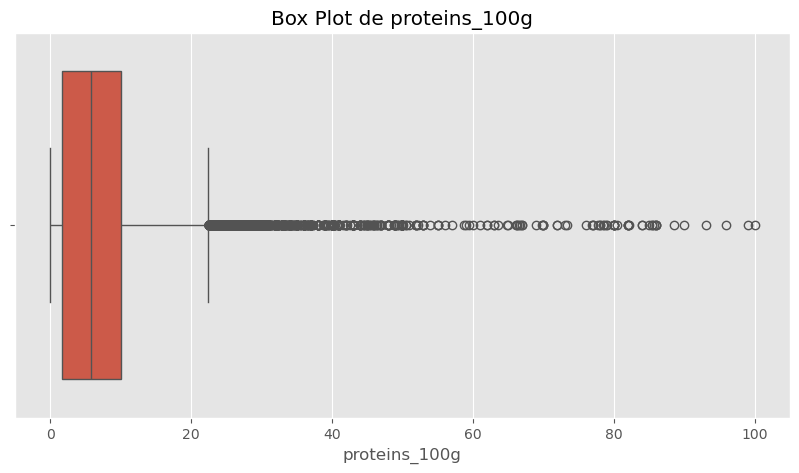

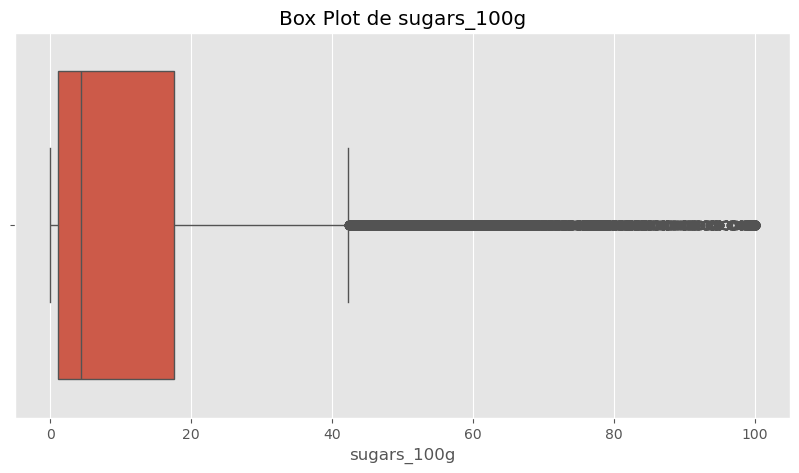

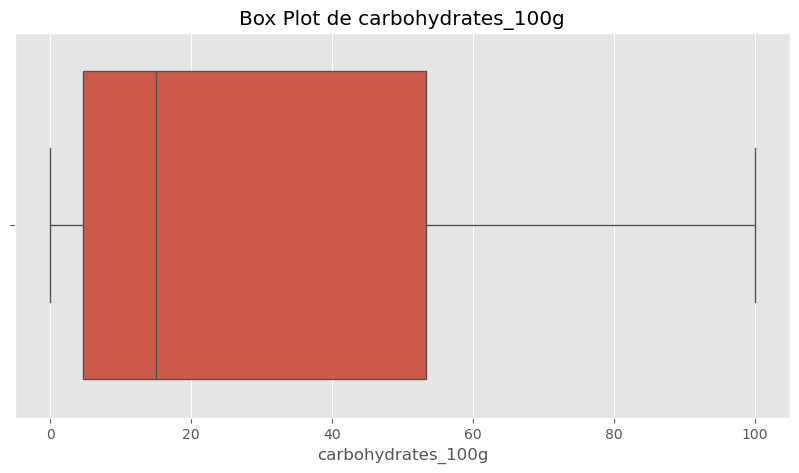

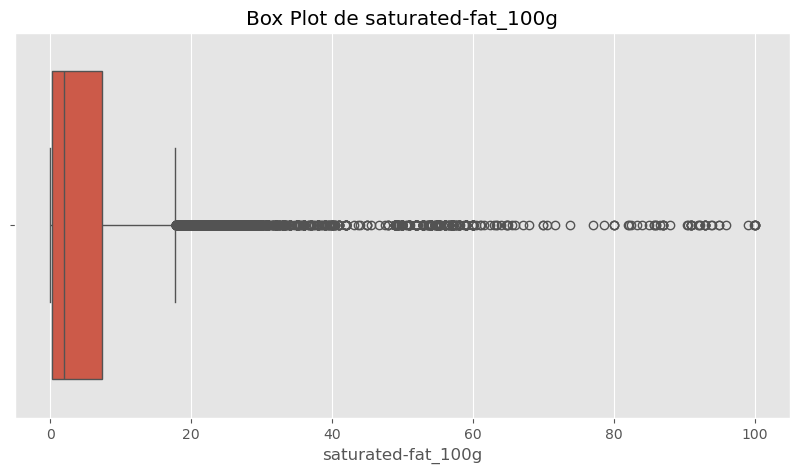

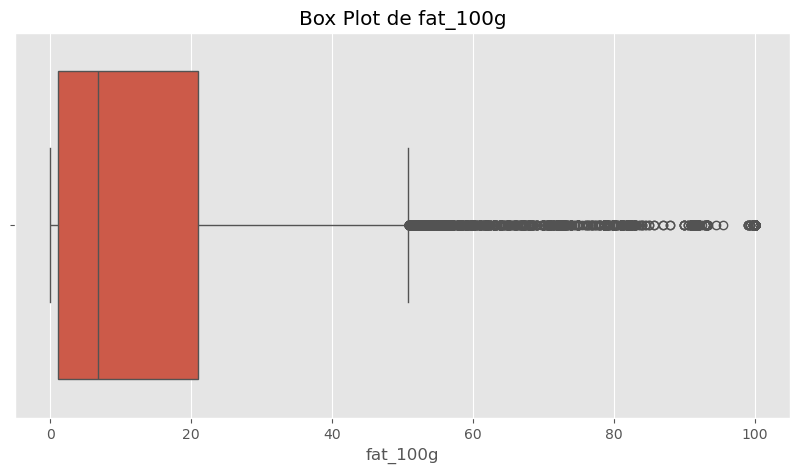

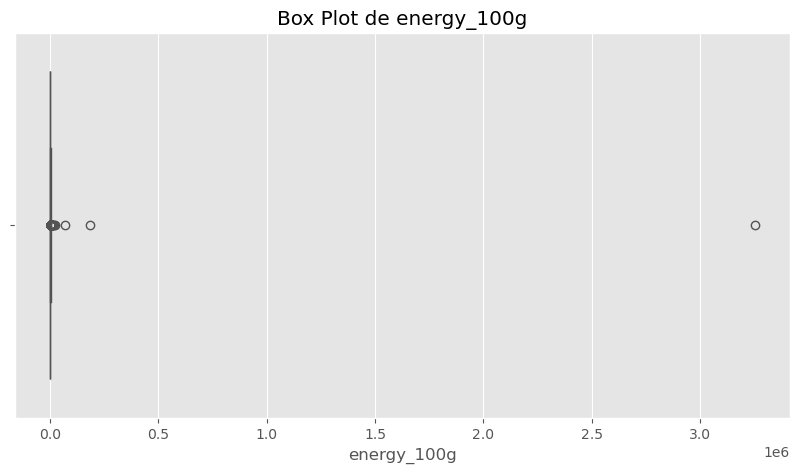

In [494]:
# Boxplot modifié
for column in data_cat.columns:
    if data_cat[column].dtype in ['float64']:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=data_cat[column])
        plt.title(f"Box Plot de {column}")
        plt.xlabel(column)
        plt.show()

**proteins_100g :**

In [496]:
# Recherche des outliers
data_tet = data_cat.copy()
d1 = data_tet['proteins_100g'].quantile(0.1)
d9 = data_tet['proteins_100g'].quantile(0.9)
iqr = d9 - d1
upper_limit = d9 + iqr * 3
outliers = data_tet[data_tet['proteins_100g'] > upper_limit]
print("Lignes où 'proteins_100g' dépasse d9 * 3 :")
outliers

Lignes où 'proteins_100g' dépasse d9 * 3 :


main_category_fr nutrition_grade_fr  \
267                    Compléments alimentaires                NaN   
297                    Compléments alimentaires                NaN   
298                    Compléments alimentaires                NaN   
128158                 Compléments alimentaires                  b   
136316                 Compléments alimentaires                NaN   
170118                          Non alimentaire                  a   
176404                                      NaN                NaN   
178270                    Additifs alimentaires                  c   
193318                                 Boissons                  e   
198798                                      NaN                  e   
213017  Aliments et boissons à base de végétaux                  b   
220802                                      NaN                  a   
222741                          Non alimentaire                  d   
236751                                      NaN                  c   
242107                            Snacks sucrés                  a   
244428                 Compléments alimentaires                  b   
244447                 Compléments alimentaires                  d   
244451                                      NaN                NaN   
244480                 Compléments alimentaires                  b   
249196                 Compléments alimentaires                  b   
258468                 Compléments alimentaires                  b   
258470                 Compléments alimentaires                  b   
258471                 Compléments alimentaires                  c   
261843                 Compléments alimentaires                  d   
264817                 Compléments alimentaires                  a   
264818                 Compléments alimentaires                  a   
264822                 Compléments alimentaires                  a   
264863  Aliments et boissons à base de végétaux                  b   
270209                      en:Egg-white-powder                  b   
274141                 Compléments alimentaires                  d   
274144                                      NaN                  b   
274156                 Compléments alimentaires                  b   
274165                 Compléments alimentaires                  d   
274181                 Compléments alimentaires                  d   
274186                 Compléments alimentaires                  d   
274809                 Compléments alimentaires                  b   
279881                 Compléments alimentaires                  c   
280749                 Compléments alimentaires                  b   
282759                                      NaN                  a   
310137                                      NaN                  b   
315784                                      NaN                  d   

                     countries  salt_100g  proteins_100g  sugars_100g  \
267                Deutschland        NaN          85.50          NaN   
297                Deutschland        NaN          88.50          NaN   
298                Deutschland    1.21158          78.05       6.0000   
128158             Switzerland    1.28000          78.90       3.1500   
136316                  France        NaN          73.30       5.0000   
170118                  France    0.00000         100.00       0.0000   
176404                  France        NaN          85.00          NaN   
178270             Deutschland    1.30000          86.00       0.0000   
193318                  France    0.00000          86.00      10.6000   
198798                  France  100.00000          96.00       0.5000   
213017                  France    0.08000          93.10       6.9000   
220802                  France    0.01000          77.00       0.0000   
222741                  France    2.00000          99.00       6.0000   
236751                  France    3.26000          78.67       0.100

In [497]:
# Extraire la liste des catégories uniques de ces valeurs aberrantes
outlier_categories = outliers['main_category_fr'].unique()
outlier_categories

array(['Compléments alimentaires', 'Non alimentaire', nan,
       'Additifs alimentaires', 'Boissons',
       'Aliments et boissons à base de végétaux', 'Snacks sucrés',
       'en:Egg-white-powder'], dtype=object)

In [498]:
# Création d'une copie
data_cat3 = data_cat.copy()

In [499]:
exceptions_main_category = ['Additifs alimentaires', 'Compléments alimentaires', 'Egg-white-powder']
# Calculer les bornes des valeurs acceptables avec l'iqr
d1 = data_cat3['proteins_100g'].quantile(0.1)
d9 = data_cat3['proteins_100g'].quantile(0.9)
iqr = d9 - d1

lower_bound = d1 - 3 * iqr
upper_bound = d9 + 3 * iqr

# Calculer la médiane des valeurs non aberrantes dans 'proteins_100g'
median_proteins_100g = data_cat3[(data_cat3['proteins_100g'] >= lower_bound) & (data_cat3['proteins_100g'] <= upper_bound)]['proteins_100g'].median()
data_cat3.loc[(data_cat3['proteins_100g'] < lower_bound) | (data_cat3['proteins_100g'] > upper_bound) 
    & ~data_cat3['main_category_fr'].isin(exceptions_main_category),'proteins_100g'] = median_proteins_100g

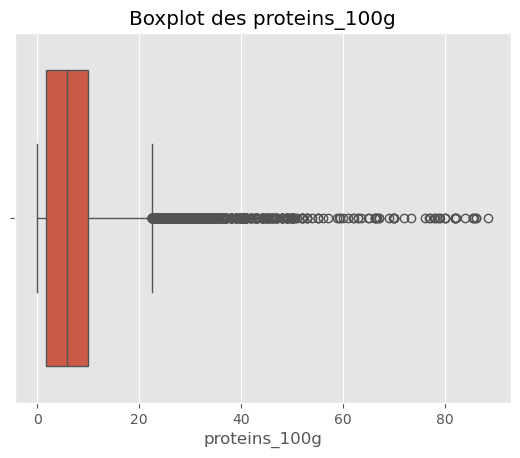

In [500]:
sns.boxplot(x=data_cat3['proteins_100g'])
plt.title("Boxplot des proteins_100g")
plt.show()

**salt_100g :**

In [502]:
data_tet2 = data_cat.copy()
# Calcul du dernier décile (d9) et de la limite supérieure d9 * 3
d1 = data_tet2['salt_100g'].quantile(0.1)
d9 = data_tet2['salt_100g'].quantile(0.9)
iqr = d9 - d1
upper_limit = d9 + iqr * 3

# Filtrer et afficher les lignes où salt_100g dépasse d9 * 3
outliers = data_tet2[data_tet2['salt_100g'] > upper_limit]
print("Lignes où 'salt_100g' dépasse d9 * 3 :")
outliers

Lignes où 'salt_100g' dépasse d9 * 3 :


main_category_fr nutrition_grade_fr  \
10253                                               Sodas                  e   
11883                                                 NaN                  c   
13141                                                 NaN                  c   
21608                                                Sels                  c   
21610                                                Sels                NaN   
21632                                                Sels                NaN   
23711                                     Chips et frites                  c   
32371                                                 NaN                  d   
40298                                            Poissons                NaN   
40408                                                Sels                NaN   
46883                                                 NaN                NaN   
57344                                            Epicerie                NaN   
57934                                                 NaN                  d   
57935                                              Epices                  d   
58182                                                 NaN                NaN   
59366                                            Epicerie                  d   
63861                                                 NaN                NaN   
66708                                            Boissons                  e   
67223                                  en:Petit-dejeuners                  d   
68008                                  Tartinade-de-fruit                NaN   
68175                                     Melange-a-soupe                  d   
68316                                                 NaN                  c   
68337                                            Epicerie                  d   
72987                                    en:Anchovy-paste                  d   
74466                                         Fruits secs                  c   
82247                                            Epicerie                  d   
84757                                                 NaN                  c   
93410                                            Epicerie                  e   
98251                                          Condiments                  c   
99146                                     en:Asian-sauces                  d   
99152                                      en:Asian-foods                NaN   
99205                                            Epicerie                  d   
99237                                 en:Asian-condiments                NaN   
105710                                           Epicerie                  e   
106481                                           Epicerie                  e   
109154                                               Sels                NaN   
111870                                         Condiments                  d   
111872                                         Condiments                  d   
112323            Aliments et boissons à base de végétaux                  c   
115509                                           Epicerie                NaN   
117947                                         Confitures                NaN   
118232                                     en:Power-drink                NaN   
119267                                             Epices                  c   
123471                                           Boissons                  e   
124183            Aliments et boissons à base de végétaux                  d   
124184                                              en:醤油                NaN   
138108                                    Petit-déjeuners                  e   
144779                                       Jus de pomme                  d   
146254                                             Epices                  d   
148168                                   

In [503]:
# Extraire la liste des catégories uniques de ces valeurs aberrantes
outlier_categories = outliers['main_category_fr'].unique()
outlier_categories

array(['Sodas', nan, 'Sels', 'Chips et frites', 'Poissons', 'Epicerie',
       'Epices', 'Boissons', 'en:Petit-dejeuners', 'Tartinade-de-fruit',
       'Melange-a-soupe', 'en:Anchovy-paste', 'Fruits secs', 'Condiments',
       'en:Asian-sauces', 'en:Asian-foods', 'en:Asian-condiments',
       'Aliments et boissons à base de végétaux', 'Confitures',
       'en:Power-drink', 'en:醤油', 'Petit-déjeuners', 'Jus de pomme',
       'Conserves', 'Produits-energisants', 'Cuisson-en-sachet',
       'es:Pescados', 'Soupes', 'Chocolats', 'en:Cookies-chocolate',
       'Additifs alimentaires', 'Édulcorants', 'Viandes',
       'pt:Creme-de-leite-bovino-enlatado', 'en:Coffee-ice-cream',
       'Pickles', 'Snacks salés', 'Fonds-de-veau', 'Eaux',
       'Fonds-de-volaille', 'Potage-deshydrate', 'Poissons en conserve',
       'Beurres', 'Preparations-culinaires', 'Produits déshydratés',
       'Sel-fin-iode-fluore', 'Capres', 'Olives entières',
       'Légumes frais', 'Produits panés', 'Puree-de-fruit', '

In [504]:
exceptions_main_category = [
    'Sels', 'Sel-fin-iode-fluore', 'Sauce-de-soja-et-froment-nuaturellement-fermentes', 'Sauce-piquante', 'Capres', 'Cube-pour-soupe-miso',
    'Bouillonterning (xx: Bouillonterning)', 'Fond-de-veau', 'Fonds-de-veau', 'Fonds-de-volaille', 'Poissons en conserve', 'Pickles', 
]
# Calculer les bornes des valeurs acceptables avec l'iqr
d1 = data_cat3['salt_100g'].quantile(0.1)
d3 = data_cat3['salt_100g'].quantile(0.9)
iqr = d9 - d1

lower_bound = d1 - 3 * iqr
upper_bound = d9 + 3 * iqr

# Calculer la médiane des valeurs non aberrantes dans 'salt_100g'
median_salt = data_cat3[(data_cat3['salt_100g'] >= lower_bound) & (data_cat3['salt_100g'] <= upper_bound)]['salt_100g'].median()
data_cat3.loc[(data_cat3['salt_100g'] < lower_bound) | (data_cat3['salt_100g'] > upper_bound) 
    & ~data_cat3['main_category_fr'].isin(exceptions_main_category),'salt_100g'] = median_salt

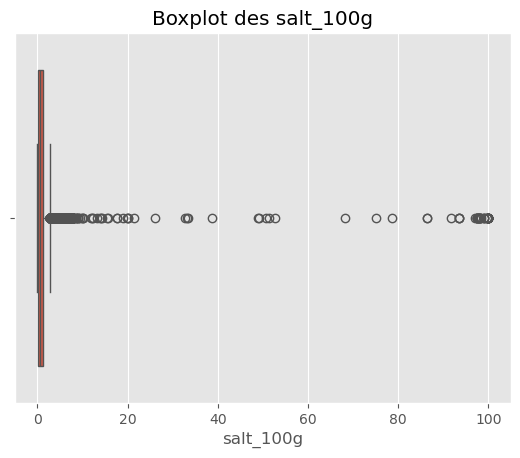

In [505]:
sns.boxplot(x=data_cat3['salt_100g'])
plt.title("Boxplot des salt_100g")
plt.show()

**sugars_100g :**

In [507]:
data_tet5 = data_cat.copy()
# Calcul du dernier décile (d9) et de la limite supérieure d9 * 3
d1 = data_tet5['sugars_100g'].quantile(0.1)
d9 = data_tet5['sugars_100g'].quantile(0.9)
iqr = d9 - d1
upper_limit = d9 + iqr * 3

# Filtrer et afficher les lignes où sugars_100g dépasse d9 * 3
outliers = data_tet5[data_tet5['sugars_100g'] > upper_limit]
print("Lignes où 'sugars_100g' dépasse d9 * 3 :")
outliers.head()

Lignes où 'sugars_100g' dépasse d9 * 3 :


Empty DataFrame
Columns: [main_category_fr, nutrition_grade_fr, countries, salt_100g, proteins_100g, sugars_100g, carbohydrates_100g, saturated-fat_100g, fat_100g, energy_100g]
Index: []

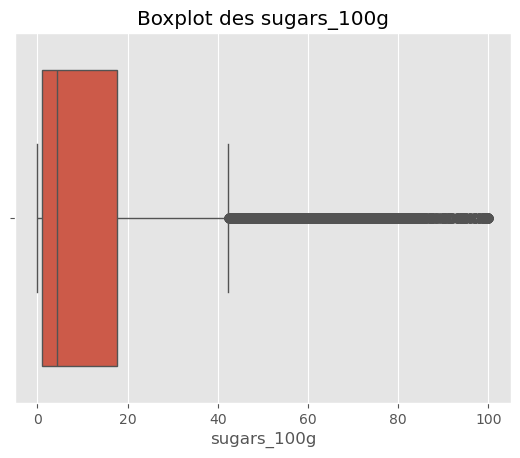

In [508]:
sns.boxplot(x=data_cat3['sugars_100g'])
plt.title("Boxplot des sugars_100g")
plt.show()

**saturated-fat_100g :**

In [510]:
data_tet6 = data_cat.copy()
# Calcul du troisième quartile (d9) et de la limite supérieure d9 * 3
d1 = data_tet6['saturated-fat_100g'].quantile(0.1)
d9 = data_tet6['saturated-fat_100g'].quantile(0.9)
iqr = d9 - d1
upper_limit = d9 + iqr * 3
# Filtrer et afficher les lignes où saturated-fat_100g dépasse d9 * 3
outliers = data_tet6[data_tet['saturated-fat_100g'] > upper_limit]
print("Lignes où 'saturated-fat_100g' dépasse Q3 * 1.5 :")
outliers

Lignes où 'saturated-fat_100g' dépasse Q3 * 1.5 :


main_category_fr nutrition_grade_fr               countries  \
19654                       Huiles                  d           United States   
19988            en:Aceite-de-coco                  e                  Mexico   
115370                      Huiles                  d                  France   
144880                      Huiles                  d                  France   
150060                      Huiles                  d           United States   
153710                      Huiles                NaN                  Canada   
167006                      Huiles                NaN           United States   
176935                     Farines                  d                  France   
177219  Matières grasses végétales                  e                  France   
186536                     cs:Butt                NaN                   Česko   
195512                    Epicerie                  d                  France   
201915                     Beurres                  e                  France   
203319                    Boissons                  e                  France   
203402                      Huiles                  d                  France   
203516           Beurre-de-baratte                  e                  France   
211926   Matières grasses animales                  e                  France   
217970                      Huiles                  d                  France   
217971                      Huiles                  d                  France   
223303                      Huiles                  e                  France   
223304                      Huiles                  d                  France   
223363                      Huiles                  d                  France   
226626                      Fruits                  c                  France   
231361                     Beurres                  e                  France   
232987                     Beurres                  e                  France   
245311                Snacks salés                  e                  France   
247140                         NaN                  e                  France   
251503                      Huiles                  d                  France   
253012                      Huiles                  d                  France   
255485                     Beurres                NaN                  France   
256082  Matières grasses végétales                NaN             Deutschland   
257640                      Huiles                  d                  France   
257684            de:Butterschmalz                  e             Deutschland   
258203                      Huiles                  d                  France   
261373  Matières grasses végétales                  e             Deutschland   
263747            Matières grasses                  e                  France   
264237             Fruits à coques                  d             Deutschland   
264638                      Huiles                  e             Deutschland   
264639                      Huiles                  e                  France   
264700                      Huiles                  d             Deutschland   
264766                      Huiles                  d             Deutschland   
264805                      Huiles                  d                  France   
265118                 Fruits secs                  c             Deutschland   
265119                      Huiles                  d             Deutschland   
271793                         NaN                  e          United Kingdom   
275205                      Huiles                  d                  France   
277355                      Huiles                  d                Belgique   
278493             Petit-déjeuners                  c                  France   
280238                      Huiles                  d                  France   
282909                         NaN               

In [511]:
# Extraire la liste des catégories uniques de ces valeurs aberrantes
outlier_categories = outliers['main_category_fr'].unique()
outlier_categories

array(['Huiles', 'en:Aceite-de-coco', 'Farines',
       'Matières grasses végétales', 'cs:Butt', 'Epicerie', 'Beurres',
       'Boissons', 'Beurre-de-baratte', 'Matières grasses animales',
       'Fruits', 'Snacks salés', nan, 'de:Butterschmalz',
       'Matières grasses', 'Fruits à coques', 'Fruits secs',
       'Petit-déjeuners', "Huiles d'olive", 'Produits à tartiner salés',
       'en:Mct-oil'], dtype=object)

In [512]:
exceptions_main_category = ['Huiles','en:Aceite-de-coco','Matières grasses végétales','cs:Butt', 'Beurres', 
                            'Beurre-de-baratte', 'Matières grasses animales', 'de:Butterschmalz', 'Matières grasses', 
                            "Huiles d'olive",'en:Mct-oil'
                            ]

# Calculer les bornes des valeurs acceptables avec l'iqr
d1 = data_cat3['saturated-fat_100g'].quantile(0.1)
d9 = data_cat3['saturated-fat_100g'].quantile(0.9)
iqr = d9 - d1

lower_bound = d1 - 3 * iqr
upper_bound = d9 + 3 * iqr

# Calculer la médiane des valeurs non aberrantes dans 'salt_100g'
median_saturatedfat = data_cat3[(data_cat3['saturated-fat_100g'] >= lower_bound) 
    & (data_cat3['saturated-fat_100g'] <= upper_bound)]['saturated-fat_100g'].median()
data_cat3.loc[(data_cat3['saturated-fat_100g'] < lower_bound) | (data_cat3['saturated-fat_100g'] > upper_bound) 
    & ~data_cat3['main_category_fr'].isin(exceptions_main_category),'saturated-fat_100g'] = median_saturatedfat

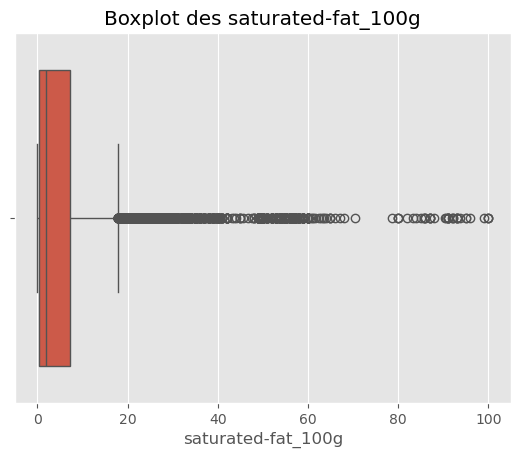

In [513]:
sns.boxplot(x=data_cat3['saturated-fat_100g'])
plt.title("Boxplot des saturated-fat_100g")
plt.show()

**fat_100g :**

In [515]:
data_tet7 = data_cat.copy()
# Calcul du troisième quartile (d9) et de la limite supérieure d9 * 3
d1 = data_tet7['fat_100g'].quantile(0.1)
d9 = data_tet7['fat_100g'].quantile(0.9)
iqr = d9 - d1
upper_limit = d9 + iqr * 3

# Filtrer et afficher les lignes où salt_100g dépasse d9 * 3
outliers = data_tet7[data_tet7['fat_100g'] > upper_limit]
print("Lignes où 'fat_100g' dépasse d9 * 3 :")
outliers.head()

Lignes où 'fat_100g' dépasse d9 * 3 :


Empty DataFrame
Columns: [main_category_fr, nutrition_grade_fr, countries, salt_100g, proteins_100g, sugars_100g, carbohydrates_100g, saturated-fat_100g, fat_100g, energy_100g]
Index: []

In [516]:
# Extraire la liste des catégories uniques de ces valeurs aberrantes
outlier_categories = outliers['main_category_fr'].unique()
outlier_categories

array([], dtype=object)

In [517]:
exceptions_main_category = {'Huiles', 'en:Aceite-de-coco', 'en:Black-truffle-oil', "Huiles d'olive", "Huiles d'olive vierges", 'en:Oil', 'Melange-4-huiles-vegetales-enrichie-en-vitamine-d', 'Matières grasses végétales', 'Huile-olive-vierge-extra', 'Huile-pour-wok', 'Huile-d-olive-extra-vierge', 'de:Pflanzenfett', 'de:Ol', 'en:Mct-oil'}
# Calculer les bornes des valeurs acceptables avec l'iqr
d1 = data_cat3['fat_100g'].quantile(0.1)
d9 = data_cat3['fat_100g'].quantile(0.9)
iqr = d9 - d1

lower_bound = d1 - 3 * iqr
upper_bound = d9 + 3 * iqr

# Calculer la médiane des valeurs non aberrantes dans 'fat_100g'
median_fat = data_cat3[(data_cat3['fat_100g'] >= lower_bound) & (data_cat3['fat_100g'] <= upper_bound)]['fat_100g'].median()
data_cat3.loc[(data_cat3['fat_100g'] < lower_bound) | (data_cat3['fat_100g'] > upper_bound) 
    & ~data_cat3['main_category_fr'].isin(exceptions_main_category),'fat_100g'] = median_fat

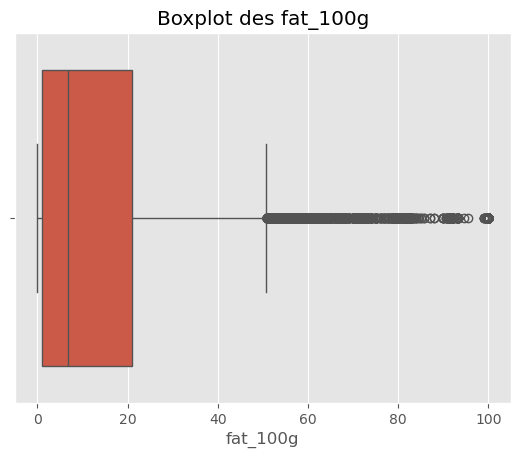

In [518]:
sns.boxplot(x=data_cat3['fat_100g'])
plt.title("Boxplot des fat_100g")
plt.show()

**energy_100g :**

In [520]:
data_tet8 = data_cat.copy()
# Calcul du troisième quartile (d9) et de la limite supérieure d9 * 3
d1 = data_tet8['energy_100g'].quantile(0.1)
d9 = data_tet8['energy_100g'].quantile(0.9)
iqr = d9 - d1
upper_limit = d9 + iqr * 3

# Filtrer et afficher les lignes où energy_100g dépasse d9 * 3
outliers = data_tet8[data_tet8['energy_100g'] > upper_limit]
print("Lignes où 'energy_100g' dépasse d9 * 3 :")
outliers

Lignes où 'energy_100g' dépasse d9 * 3 :


main_category_fr nutrition_grade_fr countries  salt_100g  \
176697        Chocolats                  e  السعودية     0.2794   
178787    Snacks sucrés                  e    France     0.0000   
212928      Pois-casses                  b    France     0.0100   
219302              NaN                  c    France     0.0100   
223318           Huiles                  c    France     0.0000   
224442            Pains                  e    France     1.7400   
245311     Snacks salés                  e    France     9.3300   
249101              NaN                  d    France     1.1900   

        proteins_100g  sugars_100g  carbohydrates_100g  saturated-fat_100g  \
176697            8.9         54.0                56.5               18.00   
178787           12.9         32.0                44.2                7.80   
212928           22.7          2.5                48.2                0.20   
219302            0.8         11.5                14.8                0.01   
223318            0.0          0.0                 0.0                8.00   
224442            8.5          3.5                54.3                3.00   
245311            0.0         22.7               100.0              100.00   
249101            4.0          4.5                21.0                2.00   

        fat_100g  energy_100g  
176697      29.5      22000.0  
178787      36.8       9983.0  
212928       1.2    3251373.0  
219302       0.5      69292.0  
223318     100.0      15481.0  
224442      28.9       9050.0  
245311     100.0      18700.0  
249101       9.0     182764.0

In [521]:
# Extraire la liste des catégories uniques de ces valeurs aberrantes
outlier_categories = outliers['main_category_fr'].unique()
outlier_categories

array(['Chocolats', 'Snacks sucrés', 'Pois-casses', nan, 'Huiles',
       'Pains', 'Snacks salés'], dtype=object)

In [522]:
exceptions_main_category = {''}
# Calculer les bornes des valeurs acceptables avec l'iqr
d1 = data_cat3['energy_100g'].quantile(0.1)
d9 = data_cat3['energy_100g'].quantile(0.9)
iqr = d9 - d1

lower_bound = d1 - 3 * iqr
upper_bound = d9 + 3 * iqr

# Calculer la médiane des valeurs non aberrantes dans 'energy_100g'
median_energy = data_cat3[(data_cat3['energy_100g'] >= lower_bound) & (data_cat3['energy_100g'] <= upper_bound)]['energy_100g'].median()
data_cat3.loc[(data_cat3['energy_100g'] < lower_bound) | (data_cat3['energy_100g'] > upper_bound) 
    & ~data_cat3['main_category_fr'].isin(exceptions_main_category),'energy_100g'] = median_energy

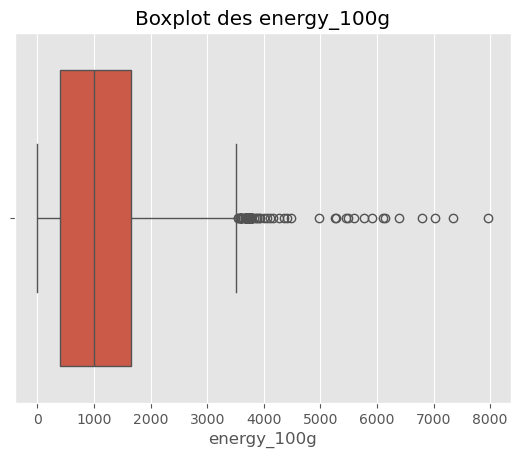

In [523]:
sns.boxplot(x=data_cat3['energy_100g'])
plt.title("Boxplot des energy_100g")
plt.show()

**carbohydrates_100g :**

In [525]:
# Calculer les bornes des valeurs acceptables avec l'iqr
d1 = data_cat3['carbohydrates_100g'].quantile(0.1)
d9 = data_cat3['carbohydrates_100g'].quantile(0.9)
iqr = d9 - d1

lower_bound = d1 - 3 * iqr
upper_bound = d9 + 3 * iqr

# Calculer la médiane des valeurs non aberrantes dans 'carbohydrates_100g'
median_carbohydrates = data_cat3[(data_cat3['carbohydrates_100g'] >= lower_bound) 
    & (data_cat3['carbohydrates_100g'] <= upper_bound)]['carbohydrates_100g'].median()

# Remplacer les outliers par la médiane, sans exceptions
data_cat3.loc[(data_cat3['carbohydrates_100g'] < lower_bound) 
   | (data_cat3['carbohydrates_100g'] > upper_bound), 'carbohydrates_100g'] = median_carbohydrates

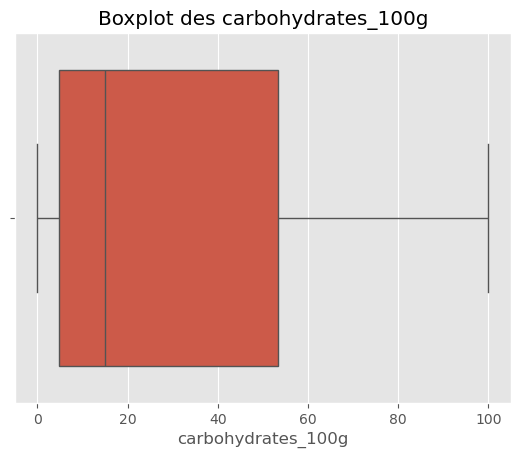

In [526]:
sns.boxplot(x=data_cat3['carbohydrates_100g'])
plt.title("Boxplot des carbohydrates_100g")
plt.show()

In [527]:
data_cat3

main_category_fr nutrition_grade_fr    countries  salt_100g  \
46       Filet-de-boeuf                NaN       France        NaN   
106                 NaN                  e   France, US    0.09652   
136                 NaN                NaN       France        NaN   
138                 NaN                NaN   France, US        NaN   
174       Légumes frais                  c       Canada    2.16000   
...                 ...                ...          ...        ...   
320734  Chips et frites                  c    France,UK    1.35000   
320736          Attieke                NaN       France        NaN   
320751            Pains                  a       France    0.68000   
320752            Sodas                NaN  Switzerland        NaN   
320762        pl:Szprot                NaN       Poland        NaN   

        proteins_100g  sugars_100g  carbohydrates_100g  saturated-fat_100g  \
46                NaN          NaN                 NaN                 NaN   
106              2.50         57.5               70.00                12.5   
136               NaN          NaN                 NaN                 NaN   
138              6.25          NaN               77.08                 NaN   
174             22.00          0.0               23.00                 7.0   
...               ...          ...                 ...                 ...   
320734           7.80          1.8                 NaN                 3.4   
320736            NaN          NaN                 NaN                 NaN   
320751          13.00          2.6               74.80                 0.6   
320752            NaN          NaN                 NaN                 NaN   
320762            NaN          NaN                 NaN                 NaN   

        fat_100g  energy_100g  
46           NaN          NaN  
106        20.00       1883.0  
136          NaN          NaN  
138         4.17       1481.0  
174        12.00       1210.0  
...          ...          ...  
320734       NaN       2155.0  
320736       NaN          NaN  
320751      2.80       1643.0  
320752       NaN          NaN  
320762       NaN          NaN  

[66150 rows x 10 columns]

En conclusion de cette partie il aura fallu faire attention aux valeurs aberrantes qui n'en était pas. La présence 
d'exception permet d'éviter cela. Ainsi nous obtenons un modèle le plus proche de la réalité en conservant les informations pertinentes.

#### Automatisation

In [530]:
def handle_outliers(df, column, exceptions_col, exceptions_list, lower_quantile=0.1, upper_quantile=0.9, multiplier=3):
    
    df = data_cat3.copy()
    
    # Calcul des quantiles et des bornes
    d1 = df[column].quantile(lower_quantile)
    d9 = df[column].quantile(upper_quantile)
    iqr = d9 - d1
    lower_bound = d1 - multiplier * iqr
    upper_bound = d9 + multiplier * iqr
    
    print(f"Quantile 10% (d1): {d1}")
    print(f"Quantile 90% (d9): {d9}")
    print(f"IQR: {iqr}")
    print(f"Borne inférieure : {lower_bound}")
    print(f"Borne supérieure : {upper_bound}")
    
    # Identifier les valeurs aberrantes
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Nombre de valeurs aberrantes détectées (hors exceptions) : {len(outliers)}")
    
    # Calcul de la médiane des valeurs non aberrantes
    median_value = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column].median()
    print(f"Médiane des valeurs non aberrantes : {median_value}")
    
    # Remplacement des valeurs aberrantes par la médiane, sauf pour les catégories d'exception
    df.loc[
        ((df[column] < lower_bound) | (df[column] > upper_bound)) & 
        ~df[exceptions_col].isin(exceptions_list), 
        column
    ] = median_value
    
    # Vérification des modifications
    modified_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Nombre de valeurs aberrantes restantes après traitement : {len(modified_outliers)}")
    
    return df

# Utilisation de la fonction sur 'saturated-fat_100g'
exceptions_main_category = ['Huiles', 'en:Aceite-de-coco', 'Matières grasses végétales', 'cs:Butt', 'Beurres', 
                            'Beurre-de-baratte', 'Matières grasses animales', 'de:Butterschmalz', 'Matières grasses', 
                            "Huiles d'olive", 'en:Mct-oil']

data_cat3 = handle_outliers(
    df=data_cat3,
    column='saturated-fat_100g',
    exceptions_col='main_category_fr',
    exceptions_list=exceptions_main_category
)

Quantile 10% (d1): 0.0
Quantile 90% (d9): 16.0
IQR: 16.0
Borne inférieure : -48.0
Borne supérieure : 64.0
Nombre de valeurs aberrantes détectées (hors exceptions) : 46
Médiane des valeurs non aberrantes : 2.0
Nombre de valeurs aberrantes restantes après traitement : 46


### *Outliers valeurs non numériques*

#### cible

In [533]:
# Retourne le nombre de valeurs uniques
cible.nunique()

14

In [534]:
# Retourne le nombre d'occurences
cible.value_counts()

pnns_groups_1
unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: count, dtype: int64

In [535]:
# Remplace les tirets + mets une majuscule
cible = cible.str.replace('-', ' ', regex=False).str.capitalize()

In [536]:
cible.value_counts()

pnns_groups_1
Unknown                    22624
Sugary snacks              12864
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8458
Fish meat eggs              8041
Fruits and vegetables       6895
Composite foods             6747
Fat and sauces              5216
Salty snacks                2810
Name: count, dtype: int64

#### main_category_fr

In [538]:
data_cat3['main_category_fr'].nunique()

3543

In [539]:
# Retourne le nombre d'occurences
data_cat3['main_category_fr'].value_counts()

main_category_fr
Epicerie                                   2305
Chocolats                                  2274
Aliments et boissons à base de végétaux    2248
Boissons                                   2207
Conserves                                  1939
                                           ... 
Plats-chinois                                 1
Cornets                                       1
Preparations-a-base-de-pomme-de-terre         1
en:Preparations-de-viande-surgelees           1
pl:Szprot                                     1
Name: count, Length: 3543, dtype: int64

In [540]:
data_cat3['main_category_fr'] = data_cat3['main_category_fr'].str.replace('-', ' ', regex=False)

In [541]:
# Retirer le préfixe "en:"
data_cat3['main_category_fr'] = data_cat3['main_category_fr'].str.replace(r'en:', '', regex=True)
data_cat3['main_category_fr'] = data_cat3['main_category_fr'].str.replace(r'de:', '', regex=True)

In [542]:
# Retourne le nombre d'occurences
counts = data_cat3['main_category_fr'].value_counts()
# Identifier les catégories rares (moins de 10 occurrences)
rare_values = counts[counts < 10].index
# Remplacer les catégories rares par "Autres"
data_cat3['main_category_fr'] = data_cat3['main_category_fr'].apply(lambda x: 'Autres' if x in rare_values else x)

In [543]:
data_cat3['main_category_fr'].nunique()

155

In [544]:
# Retourne le nombre d'occurences
data_cat3['main_category_fr'].value_counts()

main_category_fr
Autres                                     4309
Epicerie                                   2305
Chocolats                                  2290
Aliments et boissons à base de végétaux    2248
Boissons                                   2211
Conserves                                  1941
Biscuits                                   1837
Plats préparés                             1819
Surgelés                                   1708
Petit déjeuners                            1588
Snacks sucrés                              1564
Desserts                                   1478
Pains                                      1445
Fromages                                   1319
Plats à base de viande                     1113
Pâtes alimentaires                         1082
Gâteaux                                    1054
Chips et frites                            1002
Produits à tartiner salés                   912
Soupes                                      860
Bonbons                

In [547]:
data_cat3['main_category_fr'].nunique()

155

In [549]:
# Création de sous groupes
category_mapping = {
    # Autres
    "Autres": "Autres",
    "Additifs alimentaires": "Autres",
    "Compléments alimentaires": "Autres",
    "Non alimentaire": "Autres",
    "Produits de la ruche": "Autres",
    "Preparations pour desserts" : "Autres",
    "Produits déshydratés": "Autres",
    "Produits labellisés": "Autres",
    "Produits d'élevages": "Autres",
    "Matières grasses": "Autres",
    "Matières grasses animales": "Autres",
    "Matières grasses végétales": "Autres",
    "it:Biscotti": "Autres",
    "es:Pan y reposteria": "Autres",
    "Salad": "Autres",
    "Baked beans": "Autres",
    "Aliments pour bébé": "Autres",
    "Édulcorants": "Autres",
    "Crèmes": "Autres",
    "Produits à teneur réduite en sel": "Autres",
    "Levures": "Autres",

    # Épicerie
    "Epicerie": "Epicerie",
    "Riz": "Epicerie",
    "Farines": "Epicerie",
    "Farines de blé": "Epicerie",
    "Huiles": "Epicerie",
    "Huiles d'olive": "Epicerie",
    "Epices": "Epicerie",
    "Vinaigres": "Epicerie",
    "Sels": "Epicerie",
    "Huiles d'olive vierges": "Epicerie",
    "Tomates": "Epicerie",
    "Champignons": "Epicerie",
    "Purées de pommes de terre": "Epicerie",
    "Snacks salés": "Epicerie",

    
    # Boissons
    "Boissons": "Boissons",
    "Jus de fruits": "Boissons",
    "Jus de pomme": "Boissons",
    "Jus d'orange": "Boissons",
    "Eaux": "Boissons",
    "Sodas": "Boissons",
    "Sodas aux fruits": "Boissons",
    "Sodas light": "Boissons",
    "Thés": "Boissons",
    "Thés verts": "Boissons",
    "Infusions": "Boissons",
    "Jus d'orange 100% pur jus": "Boissons",
    "Boissons gazeuses": "Boissons",
    "Jus de pamplemousse": "Boissons",
    "Jus de fruits 100% pur jus": "Boissons",
    "Jus d'orange à base de concentré": "Boissons",
    "Sirops": "Boissons",
    "Thes glaces": "Boissons",
    "Coconut water": "Boissons",

    # Chocolats et Snacks sucrés
    "Chocolats": "Snacks sucrés",
    "Bonbons": "Snacks sucrés",
    "Snacks sucrés": "Snacks sucrés",
    "Sucres": "Snacks sucrés",
    "Barres sucrées": "Snacks sucrés",
    "Gâteaux en portions": "Snacks sucrés",
    "Beignets": "Snacks sucrés",
    "Chocolats de degustation": "Snacks sucrés",
    "Produits à tartiner sucrés": "Snacks sucrés",

    # Aliments et boissons à base de végétaux
    "Aliments et boissons à base de végétaux": "Aliments et boissons à base de végétaux",
    "Légumes frais": "Aliments et boissons à base de végétaux",
    "Fruits": "Aliments et boissons à base de végétaux",
    "Fruits secs": "Aliments et boissons à base de végétaux",
    "Fruits à coques": "Aliments et boissons à base de végétaux",
    "Compotes pour bébé": "Aliments et boissons à base de végétaux",
    "Légumes tiges": "Aliments et boissons à base de végétaux",
    "Purées": "Aliments et boissons à base de végétaux",
    "Aliments d'origine vegetale": "Aliments et boissons à base de végétaux",
    "Petits pois": "Aliments et boissons à base de végétaux",

    # Conserves
    "Conserves": "Conserves",
    "Poissons en conserve": "Conserves",
    "Sardines en conserve": "Conserves",
    "Pickles": "Conserves",
    "Olives vertes": "Conserves",
    "Olives entières": "Conserves",
    "Olives marinées": "Conserves",
    "Sardines": "Conserves",
    "Produits de la mer": "Conserves",
    
    # Biscuits
    "Biscuits": "Biscuits",
    "Cookies": "Biscuits",
    "Sablés": "Biscuits",
    "Petits beurres": "Biscuits",
    "Gaufres": "Biscuits",

    # Plats préparés
    "Plats préparés": "Plats préparés",
    "Produits panés": "Plats préparés",
    "Poissons fumés": "Plats préparés",
    "Salades composées": "Plats préparés",
    "Produits panés": "Plats préparés",
    "Taboulés":"Plats préparés",
    "Quenelles":"Plats préparés",
    "Terrines":"Plats préparés",
    "Soupes": "Plats préparés",


    # Surgelés
    "Surgelés": "Surgelés",
    "Glaces": "Surgelés",
    "Glaces et sorbets": "Surgelés",

    # Petit déjeuners
    "Petit déjeuners": "Petit déjeuners",
    "Céréales": "Petit déjeuners",
    "Laits": "Petit déjeuners",
    "Yaourts": "Petit déjeuners",
    "Yaourts aux fruits": "Petit déjeuners",
    "Yaourts brassés": "Petit déjeuners",
    "Yaourts à boire": "Petit déjeuners",
    "Yaourts entiers": "Petit déjeuners",

    # Pains
    "Pains": "Pains",
    "Pains de mie complet": "Pains",
    "Baguettes": "Pains",

    # Desserts
    "Desserts": "Desserts",
    "Desserts au chocolat": "Desserts",
    "Gâteaux": "Desserts",
    "Tartes": "Desserts",
    "Crêpes et galettes": "Desserts",
    "Mousses sucrées": "Desserts",
    "Desserts lactés": "Desserts",
    "Genoise": "Desserts",
    "Pâtisseries": "Desserts",
    "Pâtes à tarte": "Desserts",

    # Fromages
    "Fromages": "Fromages",
    "Fromages de France": "Fromages",
    "Fromages de vache": "Fromages",
    "Fromages blancs": "Fromages",
    "Emmental": "Fromages",
    "Ricotta": "Fromages",

    # Pâtes alimentaires
    "Pâtes alimentaires": "Pâtes alimentaires",
    "Spaghettis": "Pâtes alimentaires",
    "Coquillettes": "Pâtes alimentaires",
    "Pâtes à pizza": "Pâtes alimentaires",
    "Gnocchis":"Pâtes alimentaires",
    "Gnocchi":"Pâtes alimentaires",
    "Feuilles de brick":"Pâtes alimentaires",
    "Pate" : "Pâtes alimentaires",
    "Vermicelles": "Pâtes alimentaires",
    "Pates": "Pâtes alimentaires",

    # Chips et frites
    "Chips et frites": "Chips et frites",
    "Chips": "Chips et frites",
    "Frites": "Chips et frites",

    # Produits à tartiner salés
    "Produits à tartiner salés": "Produits à tartiner salés",
    "Pâtes à tartiner": "Produits à tartiner salés",
    "Tartinades": "Produits à tartiner salés",
    "Mayonnaises": "Produits à tartiner salés",
    "Beurres": "Produits à tartiner salés",
    "Produits à tartiner": "Produits à tartiner salés",


    # Plats à base de viande
    "Viandes":"Plats à base de viande",
    "Saucisses":"Plats à base de viande",
    "Saucissons":"Plats à base de viande",
    "Jambons":"Plats à base de viande",
    "Jambons crus":"Plats à base de viande",
    "Jambons secs":"Plats à base de viande",
    "Lardons":"Plats à base de viande",
    "Plats à base de viande":"Plats à base de viande",
    "Charcuteries":"Plats à base de viande",
    "Volailles":"Plats à base de viande",
    "Poissons":"Plats à base de viande",
    "Saucissons secs pur porc":"Plats à base de viande",
    "Poissons et viandes et oeufs": "Plats à base de viande",
    "Jambons de Paris": "Plats à base de viande",
    "Crustacés": "Plats à base de viande",
    "Saumons": "Plats à base de viande"
}

In [550]:
def group_category(category):
    return category_mapping.get(category, "Autres")  # Par défaut, regroupe tout ce qui ne correspond pas dans "Autres"

# Regrouper les catégories
data_cat3['main_category_fr'] = data_cat3['main_category_fr'].apply(group_category)

In [552]:
# Retourne le nombre d'occurences
data_cat3['main_category_fr'].value_counts()

main_category_fr
Autres                                     14305
Boissons                                    5348
Snacks sucrés                               5031
Epicerie                                    4835
Plats à base de viande                      4655
Aliments et boissons à base de végétaux     4149
Petit déjeuners                             3978
Plats préparés                              3643
Desserts                                    3512
Conserves                                   3154
Biscuits                                    2641
Fromages                                    2613
Surgelés                                    2360
Produits à tartiner salés                   2062
Pains                                       1515
Pâtes alimentaires                          1347
Chips et frites                             1002
Name: count, dtype: int64

#### countries

In [554]:
data_cat3['countries'].nunique()

1131

In [557]:
# Retourne le nombre d'occurences
data_cat3['countries'].value_counts()

countries
France                            43940
Deutschland                        4138
España                             2676
United Kingdom                     1755
United States                      1607
                                  ...  
France,Grèce,Pays-Bas                 1
Frankreich,Belgien                    1
France,Espagne,Portugal               1
France,Espagne,Italie,Portugal        1
Hong Kong,China                       1
Name: count, Length: 1131, dtype: int64

In [558]:
# Retourne le nombre d'occurrences 
counts = data_cat3['countries'].value_counts()
# Identifier les catégories rares (moins de 10 occurrences)
rare_values = counts[counts < 10].index
# Remplacer les catégories rares par "Autres"
data_cat3['countries'] = data_cat3['countries'].apply(lambda x: 'Autre' if x in rare_values else x)

In [559]:
# Retourne le nombre d'occurences
data_cat3['countries'].value_counts()

countries
France                                  43940
Deutschland                              4138
España                                   2676
United Kingdom                           1755
Autre                                    1732
United States                            1607
Suisse                                   1389
Australia                                 751
Россия                                    735
Belgique                                  588
France, Suisse                            417
Portugal                                  392
Germany                                   304
Switzerland                               296
Italia                                    243
Canada                                    226
France,Suisse                             206
Belgique,France                           201
Nederland                                 168
Spain                                     157
Germany,Switzerland                       139
Belgium                 

In [560]:
# Table de correspondance des noms de pays
country_mapping = {'Italia': 'Italie','Italie': 'Italie','Deutschland': 'Allemagne','Allemagne': 'Allemagne','España': 'Espagne','Espagne': 'Espagne','United Kingdom': 'Royaume-Uni','UK': 'Royaume-Uni','Royaume-Uni': 'Royaume-Uni','Suisse': 'Suisse','Switzerland': 'Suisse','Schweiz': 'Suisse','France': 'France','Belgique': 'Belgique','Belgium': 'Belgique','Nederland': 'Pays-Bas','Netherlands': 'Pays-Bas','Portugal': 'Portugal','Italia': 'Italie','Italy': 'Italie','United States': 'États-Unis','US': 'États-Unis','États-Unis': 'États-Unis','Guadeloupe': 'Guadeloupe','Guyane': 'Guyane','Brasil': 'Brésil','Brazil': 'Brésil','Россия': 'Russie','Russia': 'Russie','México': 'Mexique','Mexico': 'Mexique','Danemark': 'Danemark','Denmark': 'Danemark','日本': 'Japon','Hong Kong': 'Hong Kong','Australia': 'Australie','La Réunion': 'La Réunion','Ireland': 'Irlande','Irelande': 'Irlande',
}

In [561]:
# Harmoniser les noms des pays dans la colonne
data_cat3['countries'] = data_cat3['countries'].replace(country_mapping)

In [562]:
# Retourne le nombre d'occurences
data_cat3['countries'].value_counts()

countries
France                                  43940
Allemagne                                4169
Espagne                                  2711
Suisse                                   1784
Royaume-Uni                              1775
Autre                                    1732
États-Unis                               1624
Russie                                    754
Australie                                 751
Belgique                                  717
France, Suisse                            417
Portugal                                  392
Italie                                    357
Germany                                   304
Pays-Bas                                  257
Canada                                    226
France,Suisse                             206
Belgique,France                           201
Spain                                     157
Germany,Switzerland                       139
France, en:switzerland                    112
Österreich              

In [563]:
# Retirer le préfixe "en:" dans la colonne 'categories'
data_cat3['countries'] = data_cat3['countries'].str.replace('Suisse, en:france', 'France, Suisse', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('France,Suisse', 'France, Suisse', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('Belgium, France', 'Belgique, France', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('France, en:belgium', 'Belgique, France', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('Belgium, en:france', 'Belgique, France', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('Frankreich, Deutschland', 'France, Allemagne', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('Allemagne, France', 'France, Allemagne', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('France, United Kingdom', 'France, Royaume-Uni', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('France, UK', 'France, Royaume-Uni', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('France,Spain', 'France, Espagne', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('España, en:france', 'France, Espagne', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('Francia, España', 'France, Espagne', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('France, United States', 'France, États-Unis', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('France, US', 'France, États-Unis', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('Guyane, en:france', 'France, Guyane', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('La Réunion, France', 'France, La Réunion', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('Deutschland, Schweiz', 'Allemagne, Suisse', regex=True)
data_cat3['countries'] = data_cat3['countries'].str.replace('Germany, Switzerland', 'Allemagne, Suisse', regex=True)

In [566]:
combination_mapping = {'France, Suisse': 'France, Suisse','France,Suisse': 'France, Suisse','Suisse,France': 'France, Suisse','France, en:switzerland': 'France, Suisse','France, en:switzerland, en:belgium': 'France, Suisse','Belgique, France, en:switzerland': 'France, Suisse, Belgique'}

# Remplacer les combinaisons dans la colonne
data_cat3['countries'] = data_cat3['countries'].replace(combination_mapping)

In [568]:
# Retourne le nombre d'occurences
data_cat3['countries'].value_counts()

countries
France                                  43940
Allemagne                                4169
Espagne                                  2711
Suisse                                   1784
Royaume-Uni                              1775
Autre                                    1732
États-Unis                               1624
France, Suisse                            817
Russie                                    754
Australie                                 751
Belgique                                  717
Portugal                                  392
Italie                                    357
Germany                                   304
Pays-Bas                                  257
Canada                                    226
Belgique,France                           201
Spain                                     157
Germany,Switzerland                       139
Magyarország                              109
Österreich                                109
Brésil                  

In [572]:
main_countries = { 'France': 'France', 'Allemagne': 'Allemagne', 'Germany': 'Allemagne', 'Frankreich': 'Allemagne', 'España': 'Espagne', 'Espagne': 'Espagne', 'Francia': 'Espagne',  'United Kingdom': 'Royaume-Uni', 'UK': 'Royaume-Uni', 'Royaume-Uni': 'Royaume-Uni', 'USA': 'USA', 'États-Unis': 'USA', 'United States': 'USA', 'Australie': 'Australie', 'Australia': 'Australie', 'Russie': 'Russie', 'Russia': 'Russie', 'Россия': 'Russie', 'Suisse': 'Suisse', 'Switzerland': 'Suisse', 'Schweiz': 'Suisse', 'Belgique': 'Belgique', 'Belgium': 'Belgique', 'België': 'Belgique', 'Portugal': 'Portugal', 'Italie': 'Italie','Italy': 'Italie', 'Italia': 'Italie', 'Pays-Bas': 'Pays-Bas','Netherlands': 'Pays-Bas','Nederland': 'Pays-Bas','Brésil': 'Brésil','Brazil': 'Brésil','Brasil': 'Brésil'}

In [574]:
def map_to_main_country(value):
    if pd.isna(value):
        return 'Autre'
    # Diviser les pays dans les combinaisons
    countries = [main_countries.get(country.strip(), 'Autre') for country in value.split(',')]
    # Supprimer les doublons après regroupement
    unique_countries = sorted(set(countries))
    # Retourner le premier pays si c'est un des 10 principaux, sinon "Autre"
    return ', '.join(unique_countries) if len(unique_countries) == 1 else 'Autre'

# Appliquer la méthode sur la colonne
data_cat3['countries'] = data_cat3['countries'].apply(map_to_main_country)

In [581]:
# Compter les valeurs dans les groupes
data_cat3['countries'].value_counts()

countries
France         43940
Autre           6474
Allemagne       4473
Espagne         2734
Suisse          1784
Royaume-Uni     1775
USA             1638
Russie           754
Australie        751
Belgique         728
Portugal         392
Italie           357
Pays-Bas         257
Brésil            93
Name: count, dtype: int64

## **Identification et traitement des valeurs manquantes**

### *Identifier les valeurs manquantes*

In [586]:
# Affichage des valeurs manquantes numériques + pourcentages
missing_data = data_cat3.isnull().sum()
missing_percentage = (missing_data / len(data_cat3)) * 100
missing_summary = pd.DataFrame({'Valeurs Manquantes': missing_data, 'Pourcentage': missing_percentage})
missing_summary = missing_summary[missing_summary['Valeurs Manquantes'] > 0].sort_values(by='Pourcentage', ascending=False)
missing_summary

Valeurs Manquantes  Pourcentage
nutrition_grade_fr                9558    14.448980
saturated-fat_100g                8032    12.142101
sugars_100g                       7753    11.720333
carbohydrates_100g                7566    11.437642
salt_100g                         7501    11.339380
fat_100g                          7381    11.157974
proteins_100g                     4450     6.727135
energy_100g                       3808     5.756614

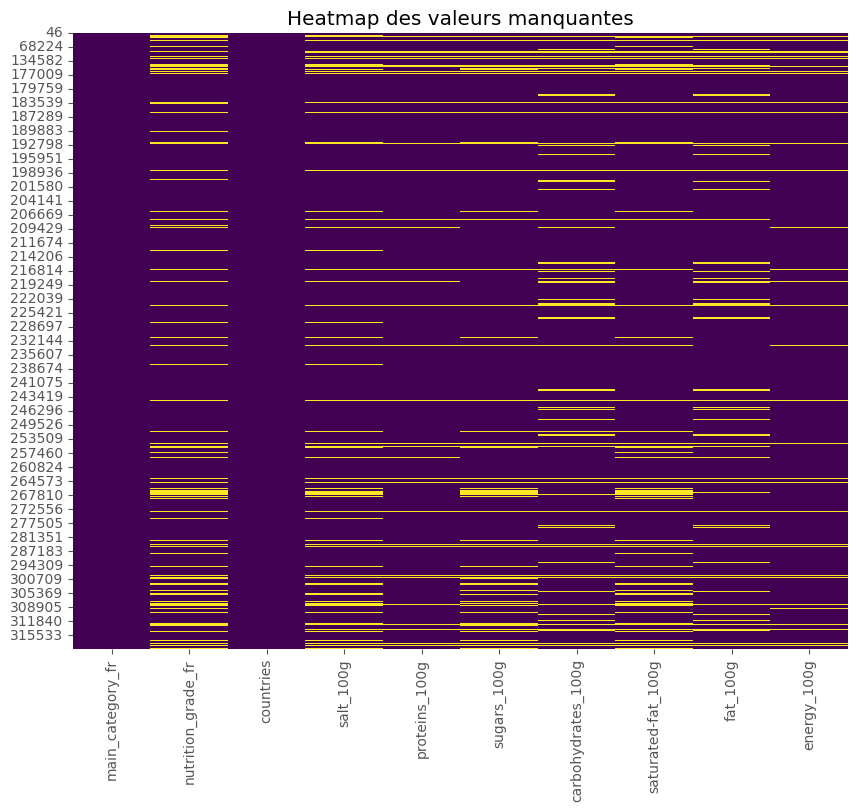

In [587]:
# Heatmap des valeurs manquantes
plt.figure(figsize=(10, 8))
sns.heatmap(data_cat3.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap des valeurs manquantes")
plt.show()

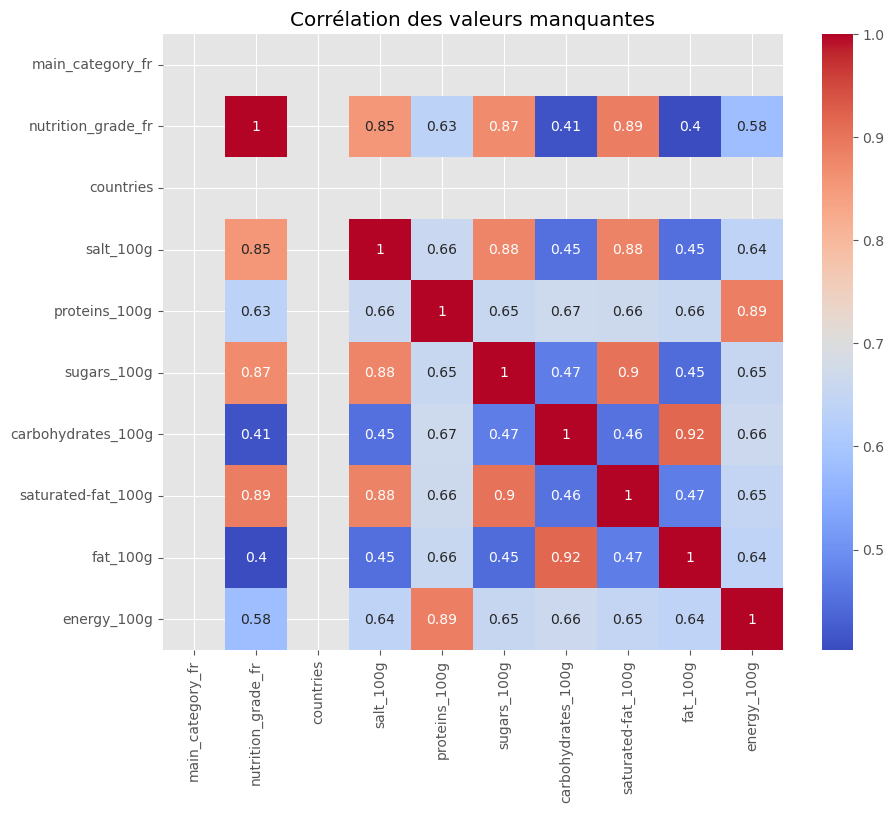

In [588]:
# Corrélation des valeurs manquantes
missing_corr = data_cat3.isnull().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm")
plt.title("Corrélation des valeurs manquantes")
plt.show()

In [589]:
# Remplace les valeurs manquantes des variables non numériques par unknown
for column in data_cat3.select_dtypes(include='object').columns:
    data_cat3[column] = data_cat3[column].fillna("Autre")

In [590]:
data_cat3.head(10)

main_category_fr nutrition_grade_fr    countries  \
46                                    Autres              Autre       France   
106                                   Autres                  e        Autre   
136                                   Autres              Autre       France   
138                                   Autres              Autre        Autre   
174  Aliments et boissons à base de végétaux                  c        Autre   
175                                 Desserts              Autre        Autre   
177                                    Pains              Autre  Royaume-Uni   
180                                 Desserts                  c        Autre   
181                                   Autres                  b        Autre   
182  Aliments et boissons à base de végétaux              Autre       France   

     salt_100g  proteins_100g  sugars_100g  carbohydrates_100g  \
46         NaN            NaN          NaN                 NaN   
106    0.09652           2.50        57.50               70.00   
136        NaN            NaN          NaN                 NaN   
138        NaN           6.25          NaN               77.08   
174    2.16000          22.00         0.00               23.00   
175    0.92200           4.79        28.10               54.10   
177        NaN            NaN          NaN                 NaN   
180    0.64700           3.33        24.70               38.70   
181    1.52000          10.00         1.11               53.30   
182        NaN            NaN          NaN                 NaN   

     saturated-fat_100g  fat_100g  energy_100g  
46                  NaN       NaN          NaN  
106              12.500     20.00       1883.0  
136                 NaN       NaN          NaN  
138                 NaN      4.17       1481.0  
174               7.000     12.00       1210.0  
175                 NaN     14.40       1520.0  
177                 NaN       NaN          NaN  
180               2.000     10.70       1090.0  
181               0.333      1.11       1160.0  
182                 NaN       NaN          NaN

In [591]:
# Sélectionner les colonnes numériques dans le DataFrame
numeric_columns = data_cat3.select_dtypes(include=[float]).columns
# Boucle sur chaque colonne numérique
for col in numeric_columns:
    # Calcule du pourcentage de valeurs manquantes pour chaque catégorie
    missing_by_category = data_cat3.groupby('main_category_fr')[col].apply(lambda x: x.isnull().mean() * 100)
    # Filtrer 
    high_missing_categories = missing_by_category[missing_by_category > 70].index
    # Remplacer les valeurs manquantes par 0
    data_cat3.loc[(data_cat3['main_category_fr'].isin(high_missing_categories)) & (data_cat3[col].isnull()), col] = 0

missing_by_category_updated = data_cat3.groupby('main_category_fr')[numeric_columns].apply(lambda x: x.isnull().mean() * 100)
missing_by_category_updated

salt_100g  proteins_100g  \
main_category_fr                                                    
Aliments et boissons à base de végétaux  11.520848       4.603519   
Autres                                   21.006641      15.903530   
Biscuits                                  4.922378       2.044680   
Boissons                                 11.219147      10.564697   
Chips et frites                           3.892216       2.495010   
Conserves                                11.984781       3.075460   
Desserts                                  4.812073       2.334852   
Epicerie                                 12.140641       5.873837   
Fromages                                 11.787218       6.008419   
Pains                                     7.194719       2.046205   
Petit déjeuners                           8.622423       3.016591   
Plats préparés                            4.748833       1.756794   
Plats à base de viande                    6.809882       3.114930   
Produits à tartiner salés                10.135790       4.752667   
Pâtes alimentaires                        9.799555       2.969562   
Snacks sucrés                             7.513417       3.597694   
Surgelés                                  6.186441       1.737288   

                                         sugars_100g  carbohydrates_100g  \
main_category_fr                                                           
Aliments et boissons à base de végétaux    11.858279            8.218848   
Autres                                     21.209367           22.474659   
Biscuits                                    4.922378            5.338887   
Boissons                                   12.097981           19.371728   
Chips et frites                             4.790419            5.389222   
Conserves                                  12.618897            7.514268   
Desserts                                    4.470387            6.178815   
Epicerie                                   12.678387            9.886246   
Fromages                                   12.973594           11.787218   
Pains                                       6.996700            6.864686   
Petit déjeuners                             8.345902            6.058321   
Plats préparés                              5.819380            5.270382   
Plats à base de viande                      8.270677            6.981740   
Produits à tartiner salés                  11.396702           10.475267   
Pâtes alimentaires                          9.354120            5.790646   
Snacks sucrés                               6.877360            6.281057   
Surgelés                                    6.483051            2.838983   

                                         saturated-fat_100g   fat_100g  \
main_category_fr                                                         
Aliments et boissons à base de végétaux           12.509038   8.556279   
Autres                                            22.278923  22.097169   
Biscuits                                           4.998107   5.376751   
Boissons                                          16.118175  21.671653   
Chips et frites                                    4.091816   4.790419   
Conserves                                         12.333545   7.641091   
Desserts                                           5.039863   6.292711   
Epicerie                                          12.016546   9.410548   
Fromages                                          11.557597   6.046690   
Pains                                              7.062706   6.138614   
Petit déjeuners                                    8.320764   5.907491   
Plats préparés                                     5.352731   5.050782   
Plats à base de viande                             7.132116   5.800215   
Produits à tartiner salés                         10.087294   8.438409   
Pâtes alimentaires                                 9.651076   6.236080   
Snacks sucrés             

In [593]:
# Sélectionner uniquement les colonnes numériques pour l'imputation
numeric_columns = data_cat3.select_dtypes(include=[float]).columns
data_numeric = data_cat3[numeric_columns]

In [594]:
# Normalisation des données
scaler = StandardScaler()
data_numeric_scaled = scaler.fit_transform(data_numeric)

In [595]:
# Initialiser l'imputer KNN avec k voisins
imputer = KNNImputer(n_neighbors=5)
# Appliquer l'imputation sur les données normalisées
data_numeric_imputed = imputer.fit_transform(data_numeric_scaled)

In [596]:
# Annuler la normalisation après l'imputation
data_numeric_restored = scaler.inverse_transform(data_numeric_imputed)
# Créer un DataFrame avec les données imputées
data_imputed_df = pd.DataFrame(data_numeric_restored, columns=numeric_columns)
# Remplacer les anciennes colonnes dans le DataFrame d'origine par les colonnes imputées
data_cat3.loc[:, numeric_columns] = scaler.inverse_transform(data_numeric_imputed)
print("Valeurs manquantes après normalisation :", pd.DataFrame(data_numeric_scaled, columns=numeric_columns).isnull().sum().sum())
print("Valeurs manquantes après imputation :", pd.DataFrame(data_numeric_imputed, columns=numeric_columns).isnull().sum().sum())

Valeurs manquantes après normalisation : 46491
Valeurs manquantes après imputation : 0


In [597]:
data_cat3[numeric_columns].isnull().sum()

salt_100g             0
proteins_100g         0
sugars_100g           0
carbohydrates_100g    0
saturated-fat_100g    0
fat_100g              0
energy_100g           0
dtype: int64

In [598]:
data_cat3.head(10)

main_category_fr nutrition_grade_fr    countries  \
46                                    Autres              Autre       France   
106                                   Autres                  e        Autre   
136                                   Autres              Autre       France   
138                                   Autres              Autre        Autre   
174  Aliments et boissons à base de végétaux                  c        Autre   
175                                 Desserts              Autre        Autre   
177                                    Pains              Autre  Royaume-Uni   
180                                 Desserts                  c        Autre   
181                                   Autres                  b        Autre   
182  Aliments et boissons à base de végétaux              Autre       France   

     salt_100g  proteins_100g  sugars_100g  carbohydrates_100g  \
46     0.89202       7.424056    13.391697           28.233926   
106    0.09652       2.500000    57.500000           70.000000   
136    0.89202       7.424056    13.391697           28.233926   
138    0.04360       6.250000    10.442000           77.080000   
174    2.16000      22.000000     0.000000           23.000000   
175    0.92200       4.790000    28.100000           54.100000   
177    0.89202       7.424056    13.391697           28.233926   
180    0.64700       3.330000    24.700000           38.700000   
181    1.52000      10.000000     1.110000           53.300000   
182    0.89202       7.424056    13.391697           28.233926   

     saturated-fat_100g   fat_100g  energy_100g  
46             5.275975  13.180558  1094.957941  
106           12.500000  20.000000  1883.000000  
136            5.275975  13.180558  1094.957941  
138            0.148000   4.170000  1481.000000  
174            7.000000  12.000000  1210.000000  
175            5.328000  14.400000  1520.000000  
177            5.275975  13.180558  1094.957941  
180            2.000000  10.700000  1090.000000  
181            0.333000   1.110000  1160.000000  
182            5.275975  13.180558  1094.957941

### *nutrition*

In [600]:
data['nutrition_grade_fr'] = data['nutrition_grade_fr'].fillna('Autre')

##  **Analyse univariée et bivariée**

### *Analyse univariée*

In [603]:
# Statistiques descriptives des variables quantitatives
quantitative_vars = ['salt_100g', 'energy_100g', 'proteins_100g','sugars_100g', 'carbohydrates_100g', 'saturated-fat_100g', 'fat_100g']
stats = data_cat3[quantitative_vars].describe()
stats

salt_100g   energy_100g  proteins_100g   sugars_100g  \
count  66150.000000  66150.000000   6.615000e+04  66150.000000   
mean       0.889369   1095.856342   7.396555e+00     13.258114   
std        2.768389    756.884306   7.206610e+00     17.969016   
min        0.000000      0.000000   8.881784e-16      0.000000   
25%        0.100000    420.000000   2.000000e+00      1.300000   
50%        0.590000   1071.000000   6.100000e+00      5.000000   
75%        1.117600   1619.000000   9.710000e+00     15.672500   
max      100.000000   7966.000000   8.850000e+01    100.000000   

       carbohydrates_100g  saturated-fat_100g      fat_100g  
count        66150.000000        66150.000000  66150.000000  
mean            28.191028            5.193438     13.022788  
std             26.228972            7.699977     15.920975  
min              0.000000            0.000000      0.000000  
25%              5.200000            0.300000      1.300000  
50%             17.840000            2.110000      7.500000  
75%             51.900000            6.600000     19.915000  
max            100.000000          100.000000    100.000000

Le nombre d'observations pour chaque variable est 66 150.
Certaines variables ont des écarts-types élevés (salt_100g, fat_100g), indiquant une large gamme de produits.
Les médianes sont souvent inférieures aux moyennes (par exemple, salt_100g avec une médiane de 0,59 g et une moyenne de 0,89 g). Cela suggère des distributions asymétriques avec des valeurs extrêmes tirant la moyenne vers le haut.

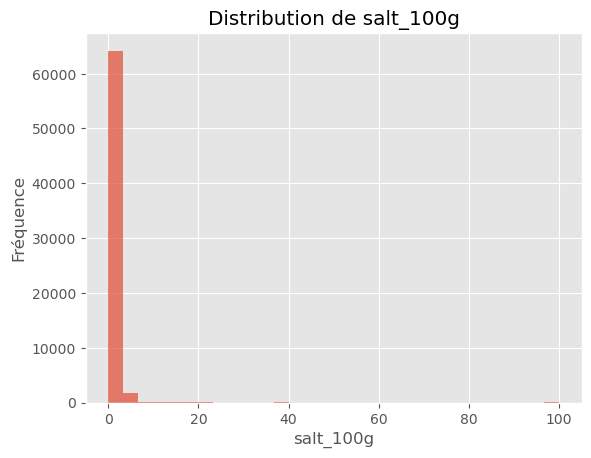

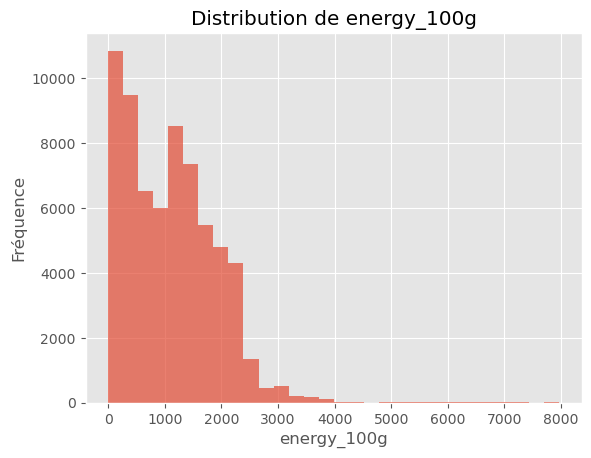

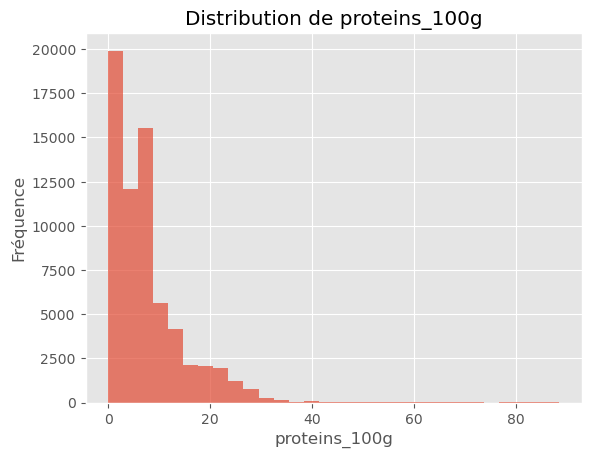

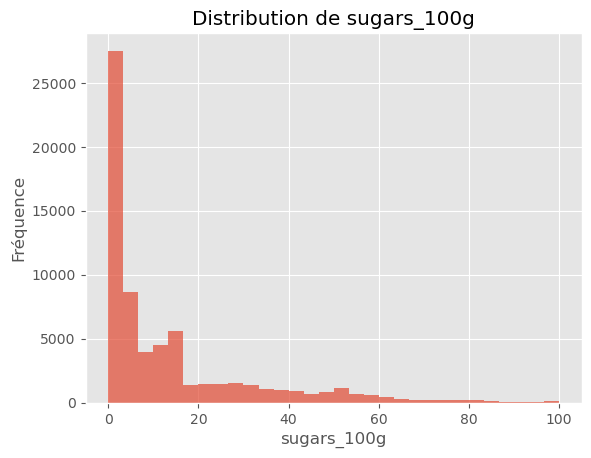

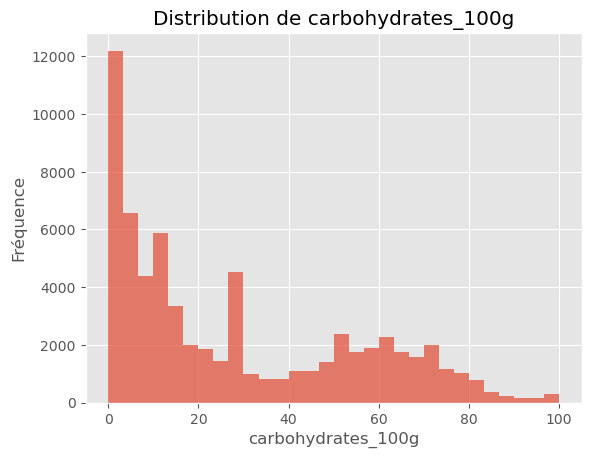

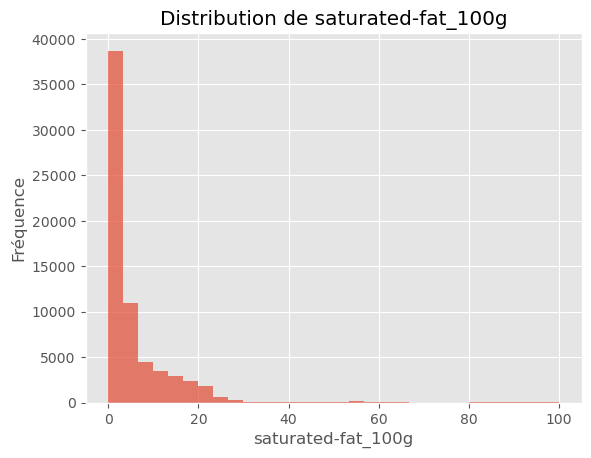

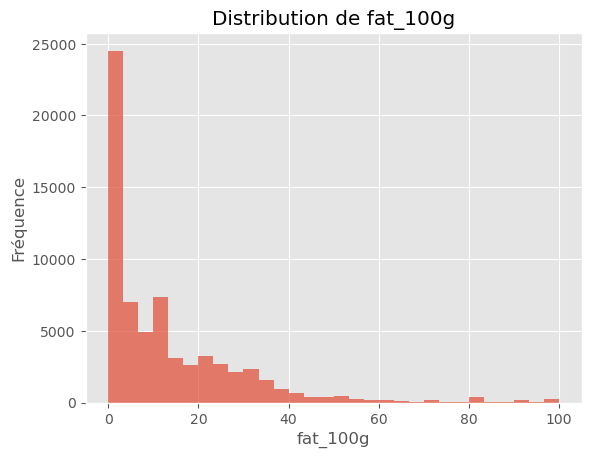

In [605]:
for var in quantitative_vars:
    plt.hist(data_cat3[var].dropna(), bins=30, alpha=0.7)
    plt.title(f"Distribution de {var}")
    plt.xlabel(var)
    plt.ylabel("Fréquence")
    plt.show()

La plupart des distributions sont plus importantes sur le 1er décile.
Les fréquences observé se ressempblent pour la plupart.

Fréquences absolues :
main_category_fr
Autres                                     14305
Boissons                                    5348
Snacks sucrés                               5031
Epicerie                                    4835
Plats à base de viande                      4655
Aliments et boissons à base de végétaux     4149
Petit déjeuners                             3978
Plats préparés                              3643
Desserts                                    3512
Conserves                                   3154
Biscuits                                    2641
Fromages                                    2613
Surgelés                                    2360
Produits à tartiner salés                   2062
Pains                                       1515
Pâtes alimentaires                          1347
Chips et frites                             1002
Name: count, dtype: int64

Fréquences relatives (%) :
main_category_fr
Autres                                     21.625094
Bois

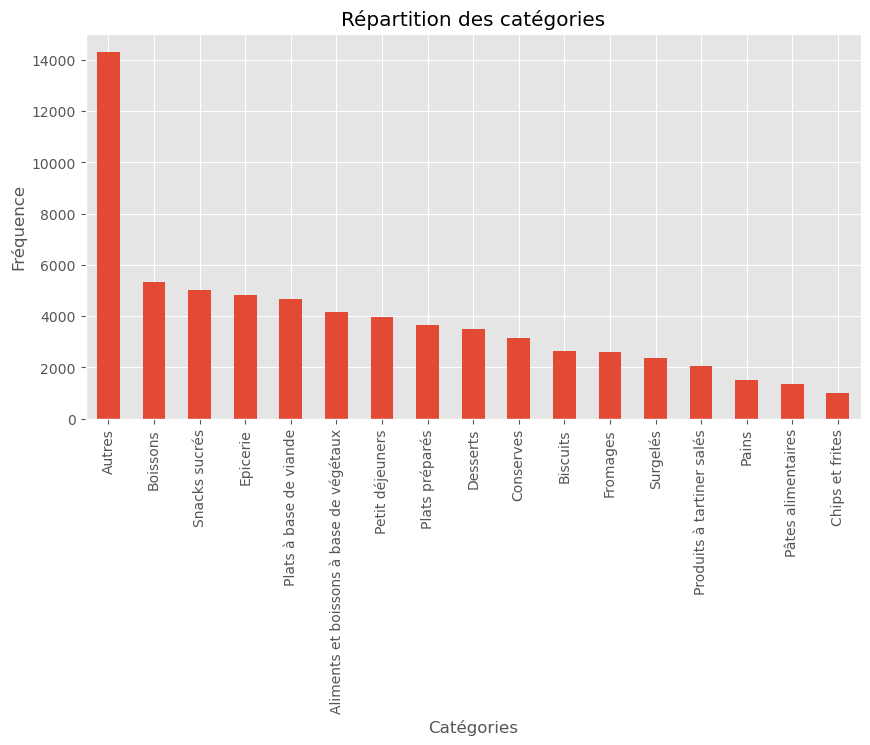

In [607]:
# Calcul des fréquences absolues et relatives
freq_abs = data_cat3['main_category_fr'].value_counts()
freq_rel = data_cat3['main_category_fr'].value_counts(normalize=True) * 100

# Affichage des fréquences
print("Fréquences absolues :")
print(freq_abs)
print("\nFréquences relatives (%) :")
print(freq_rel)

# Visualisation
plt.figure(figsize=(10, 5))
freq_abs.plot(kind='bar')
plt.title('Répartition des catégories')
plt.xlabel('Catégories')
plt.ylabel('Fréquence')
plt.show()

Fréquences absolues :
countries
France         43940
Autre           6474
Allemagne       4473
Espagne         2734
Suisse          1784
Royaume-Uni     1775
USA             1638
Russie           754
Australie        751
Belgique         728
Portugal         392
Italie           357
Pays-Bas         257
Brésil            93
Name: count, dtype: int64

Fréquences relatives (%) :
countries
France         66.424792
Autre           9.786848
Allemagne       6.761905
Espagne         4.133031
Suisse          2.696901
Royaume-Uni     2.683296
USA             2.476190
Russie          1.139834
Australie       1.135299
Belgique        1.100529
Portugal        0.592593
Italie          0.539683
Pays-Bas        0.388511
Brésil          0.140590
Name: proportion, dtype: float64


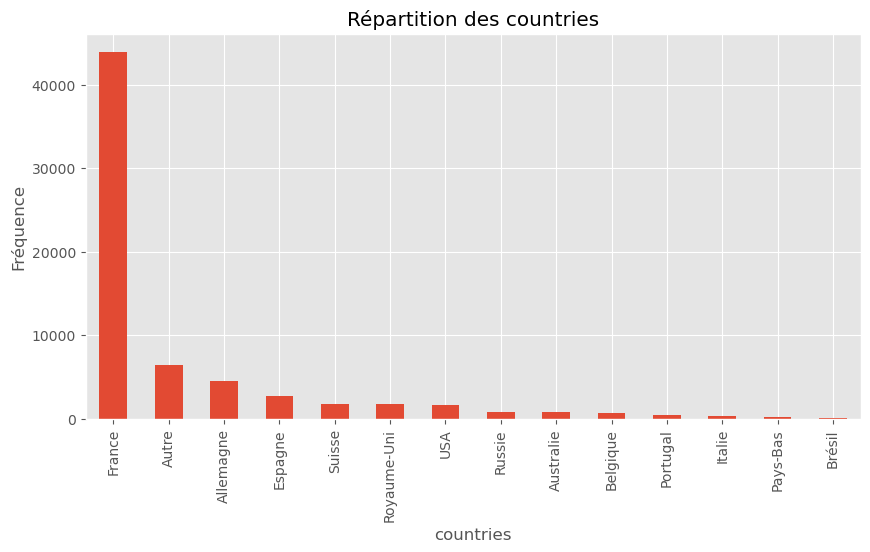

In [608]:
# Calcul des fréquences absolues et relatives
freq_abs = data_cat3['countries'].value_counts()
freq_rel = data_cat3['countries'].value_counts(normalize=True) * 100

# Affichage des fréquences
print("Fréquences absolues :")
print(freq_abs)
print("\nFréquences relatives (%) :")
print(freq_rel)

# Visualisation
plt.figure(figsize=(10, 5))
freq_abs.plot(kind='bar')
plt.title('Répartition des countries')
plt.xlabel('countries')
plt.ylabel('Fréquence')
plt.show()

Fréquences absolues :
nutrition_grade_fr
d        15457
c        12183
e        10822
a         9960
Autre     9558
b         8170
Name: count, dtype: int64

Fréquences relatives (%) :
nutrition_grade_fr
d        23.366591
c        18.417234
e        16.359788
a        15.056689
Autre    14.448980
b        12.350718
Name: proportion, dtype: float64


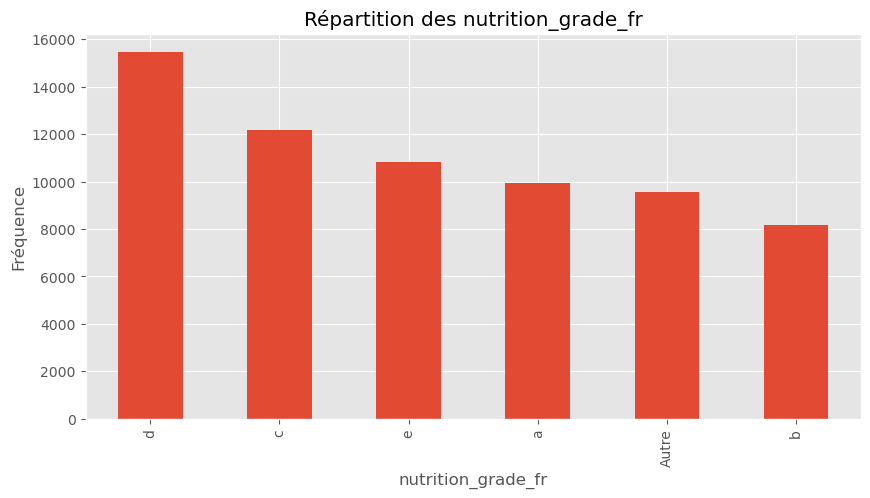

In [609]:
# Calcul des fréquences absolues et relatives
freq_abs = data_cat3['nutrition_grade_fr'].value_counts()
freq_rel = data_cat3['nutrition_grade_fr'].value_counts(normalize=True) * 100

# Affichage des fréquences
print("Fréquences absolues :")
print(freq_abs)
print("\nFréquences relatives (%) :")
print(freq_rel)

# Visualisation
plt.figure(figsize=(10, 5))
freq_abs.plot(kind='bar')
plt.title('Répartition des nutrition_grade_fr')
plt.xlabel('nutrition_grade_fr')
plt.ylabel('Fréquence')
plt.show()

La france est le pays le plus représenter, et de loin. Pas étonnant étant donné que notre société est française.
Pour les nutri-score on observe que les aliments les plus mal noté sont aussi les plus présent (d,c,e).

### *Analyse bivariée*

In [614]:
# Transformation des features catégorielles
data_encoded = pd.get_dummies(data_cat3, columns=['main_category_fr', 'countries', 'nutrition_grade_fr'], prefix=['cat', 'pays', 'score'])
data_encoded

salt_100g  proteins_100g  sugars_100g  carbohydrates_100g  \
46        0.89202       7.424056    13.391697           28.233926   
106       0.09652       2.500000    57.500000           70.000000   
136       0.89202       7.424056    13.391697           28.233926   
138       0.04360       6.250000    10.442000           77.080000   
174       2.16000      22.000000     0.000000           23.000000   
...           ...            ...          ...                 ...   
320734    1.35000       7.800000     1.800000           56.988000   
320736    0.89202       7.424056    13.391697           28.233926   
320751    0.68000      13.000000     2.600000           74.800000   
320752    0.89202       7.424056    13.391697           28.233926   
320762    0.89202       7.424056    13.391697           28.233926   

        saturated-fat_100g   fat_100g  energy_100g  \
46                5.275975  13.180558  1094.957941   
106              12.500000  20.000000  1883.000000   
136               5.275975  13.180558  1094.957941   
138               0.148000   4.170000  1481.000000   
174               7.000000  12.000000  1210.000000   
...                    ...        ...          ...   
320734            3.400000  29.052000  2155.000000   
320736            5.275975  13.180558  1094.957941   
320751            0.600000   2.800000  1643.000000   
320752            5.275975  13.180558  1094.957941   
320762            5.275975  13.180558  1094.957941   

        cat_Aliments et boissons à base de végétaux  cat_Autres  cat_Biscuits  \
46                                            False        True         False   
106                                           False        True         False   
136                                           False        True         False   
138                                           False        True         False   
174                                            True       False         False   
...                                             ...         ...           ...   
320734                                        False       False         False   
320736                                        False        True         False   
320751                                        False       False         False   
320752                                        False       False         False   
320762                                        False        True         False   

        cat_Boissons  cat_Chips et frites  cat_Conserves  cat_Desserts  \
46             False                False          False         False   
106            False                False          False         False   
136            False                False          False         False   
138            False                False          False         False   
174            False                False          False         False   
...              ...                  ...            ...           ...   
320734         False                 True          False         False   
320736         False                False          False         False   
320751         False                False          False         False   
320752          True                False          False         False   
320762         False                False          False         False   

        cat_Epicerie  cat_Fromages  cat_Pains  cat_Petit déjeuners  \
46             False         False      False                False   
106            False         False      False                False   
136            False         False      False                False   
138            False         False      False                False   
174            False         False      False                False   
...              ...           ...        ...                  ...   
320734         False         False      False                False   
320736         False         False      False                False   
320751         False         False    

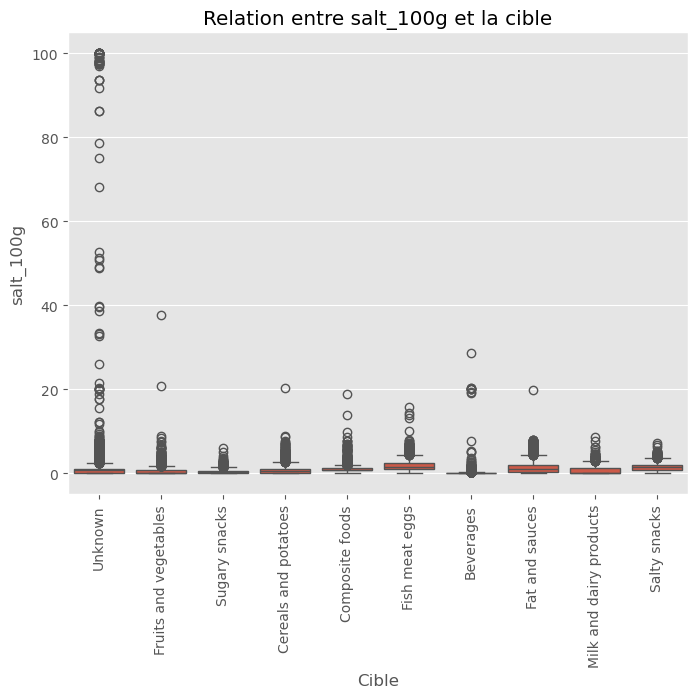

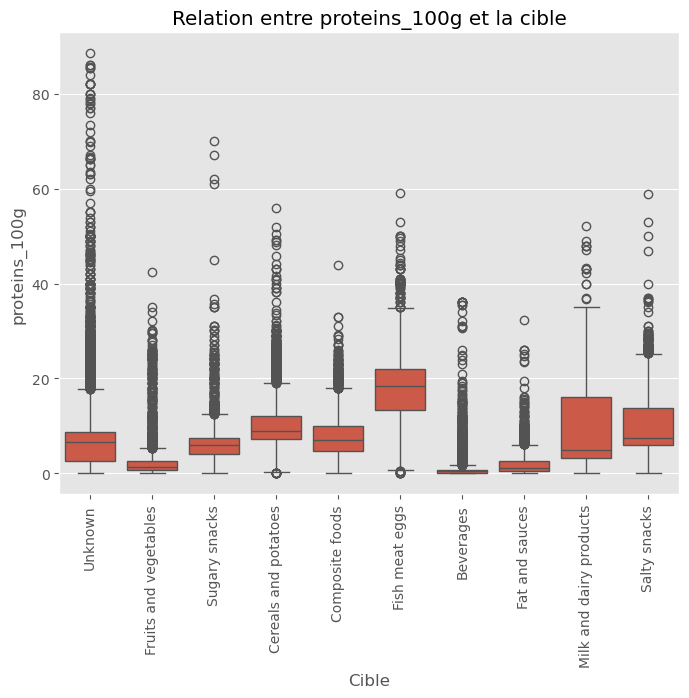

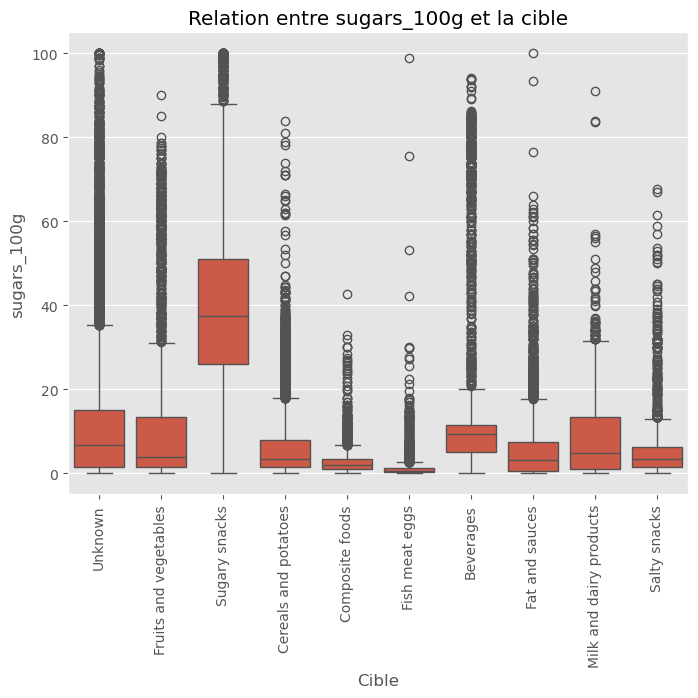

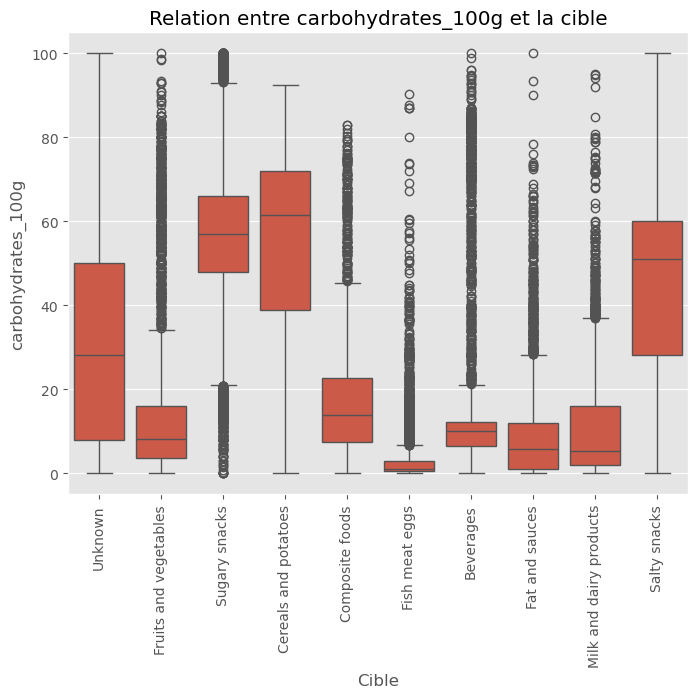

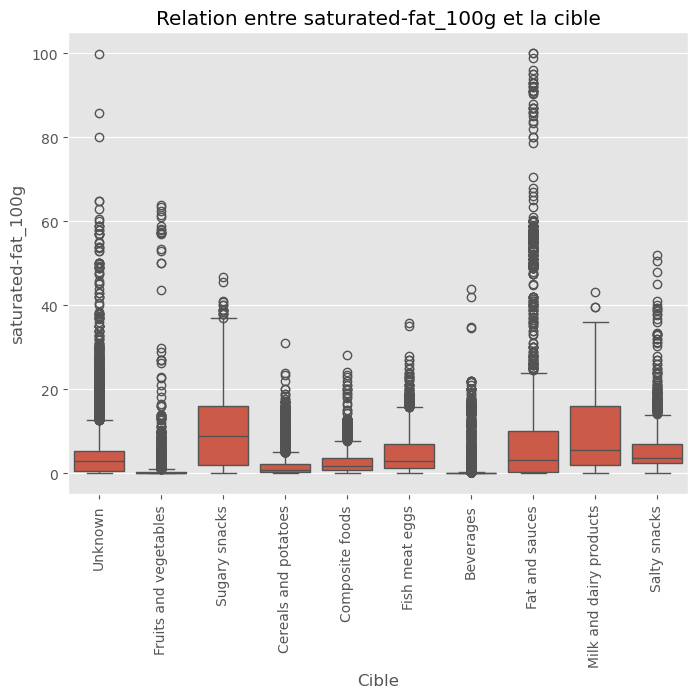

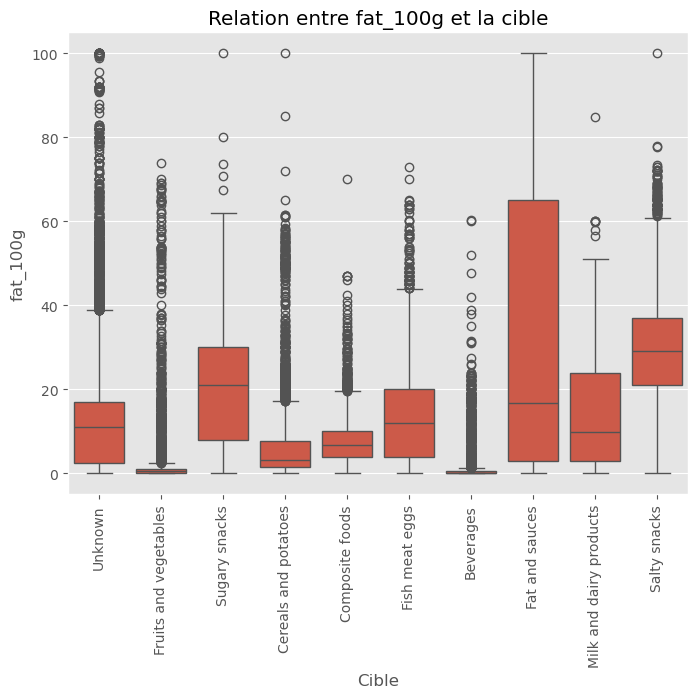

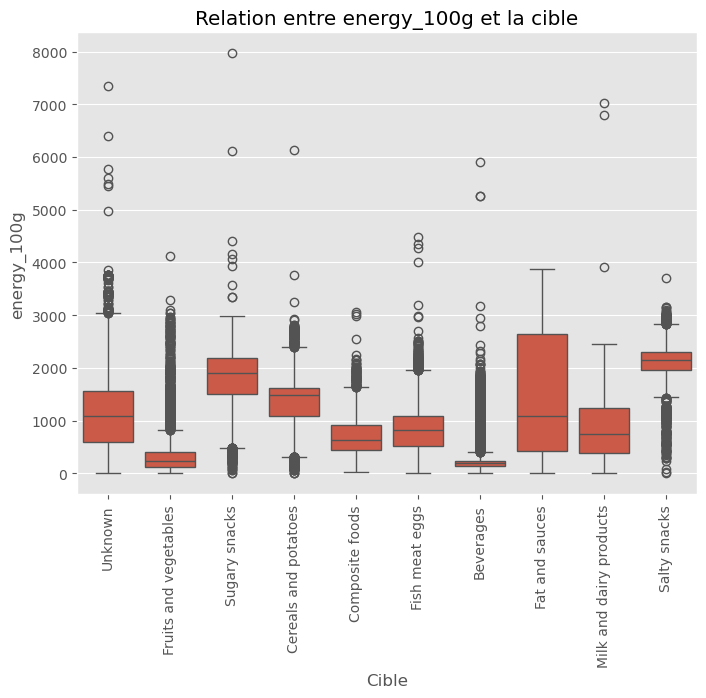

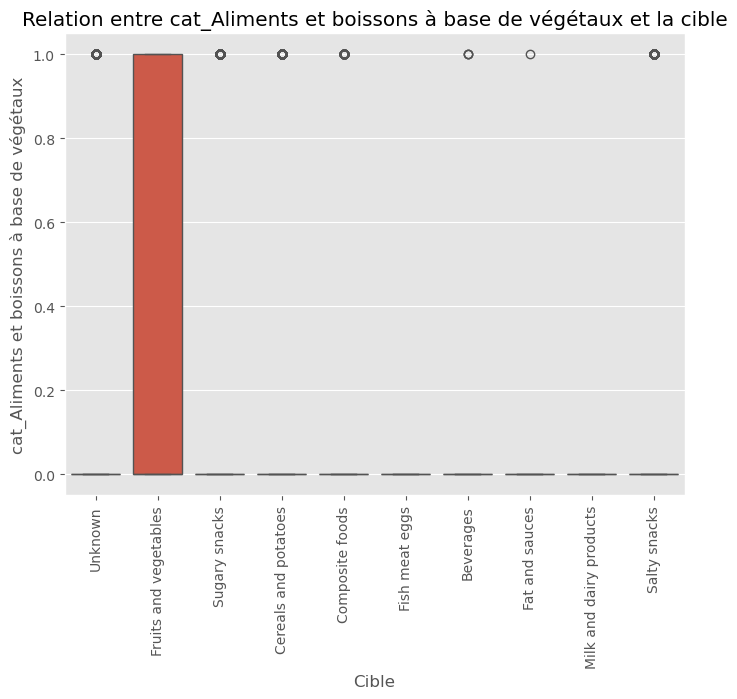

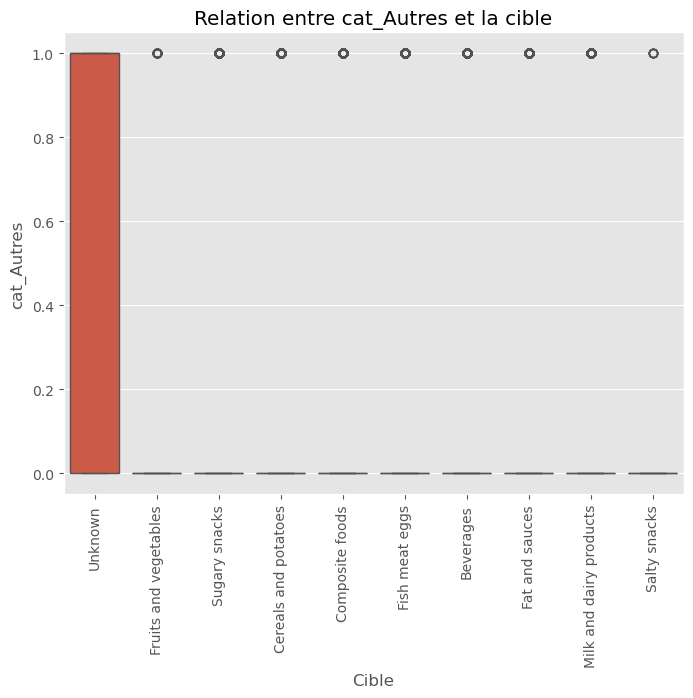

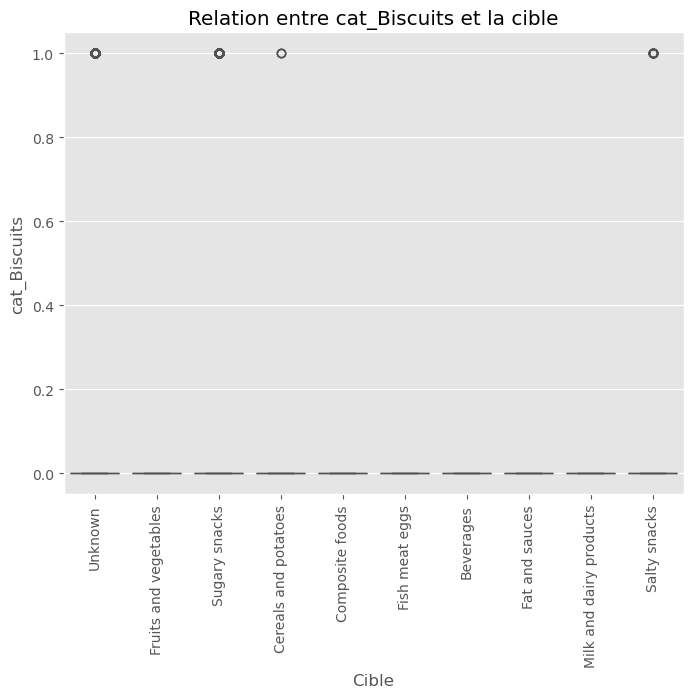

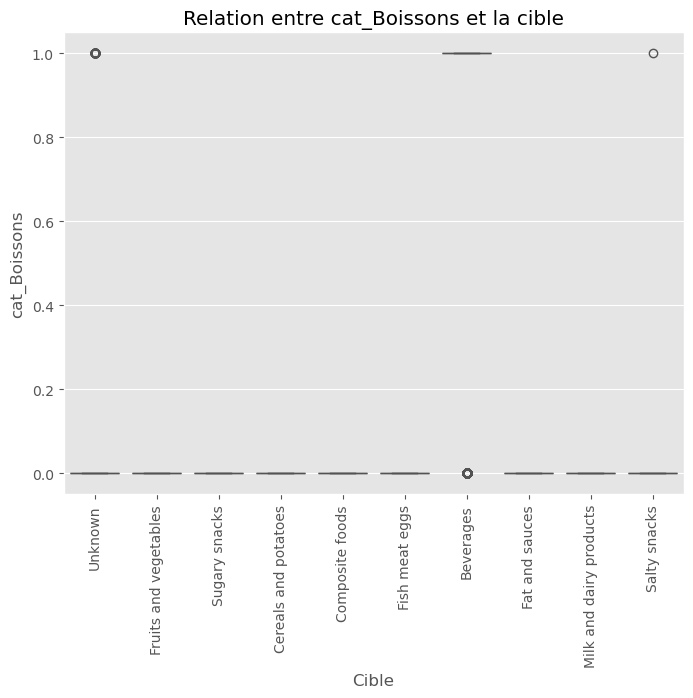

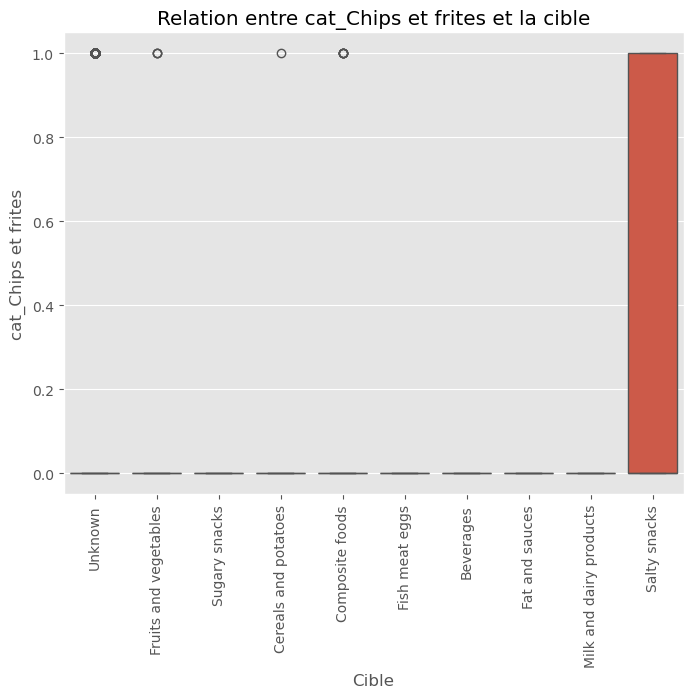

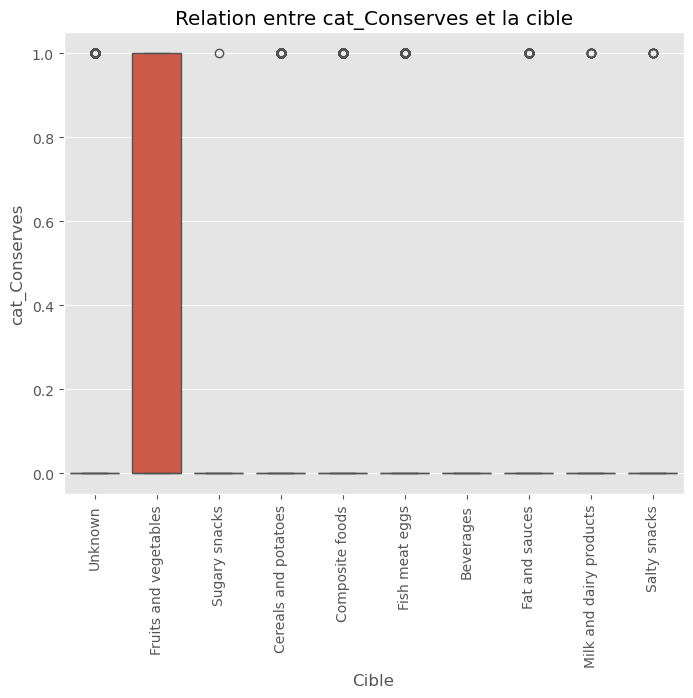

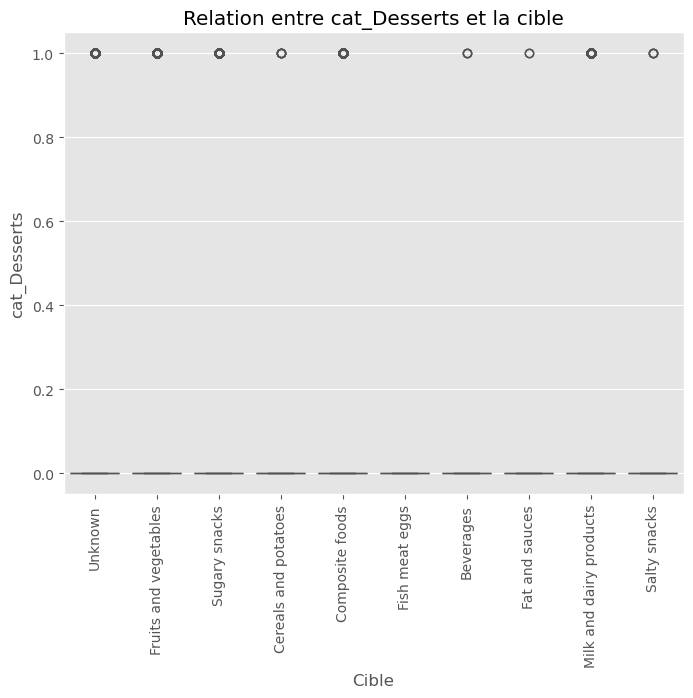

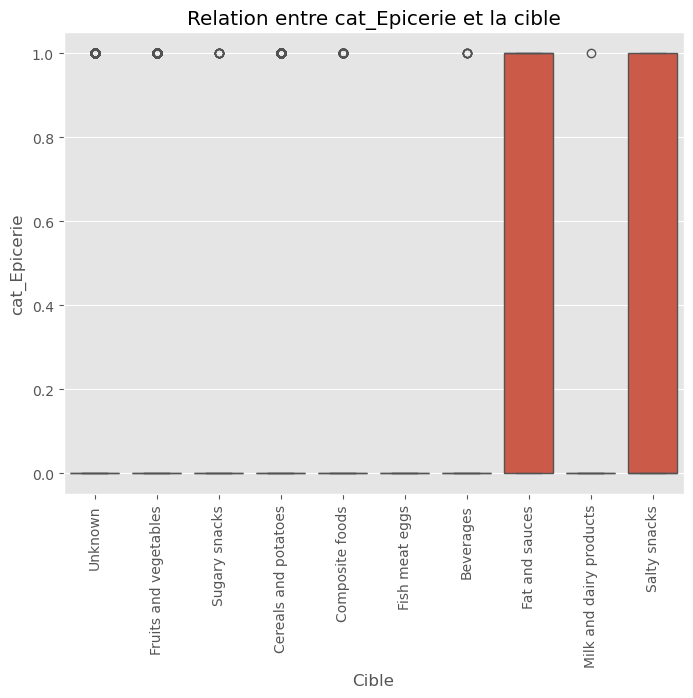

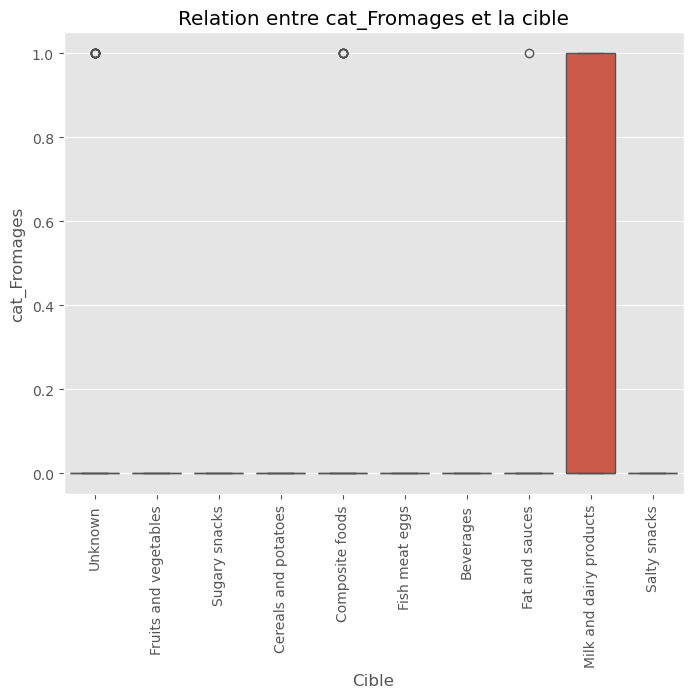

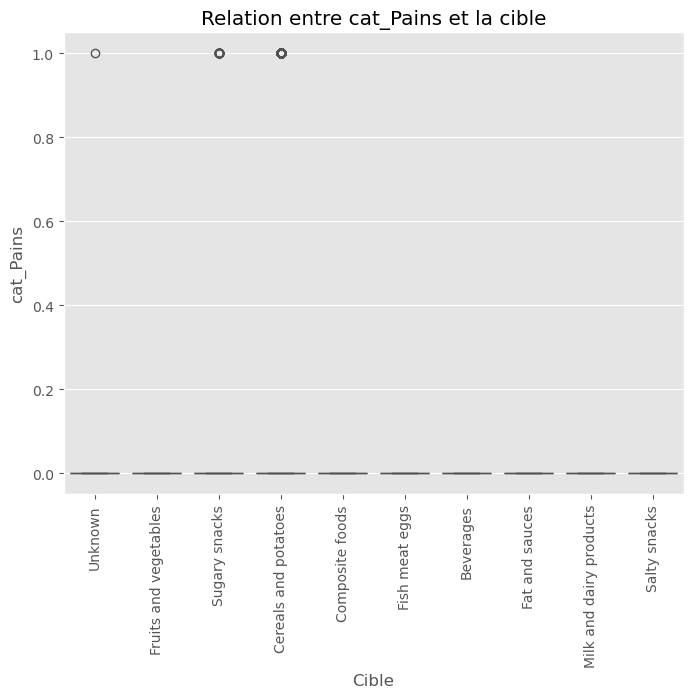

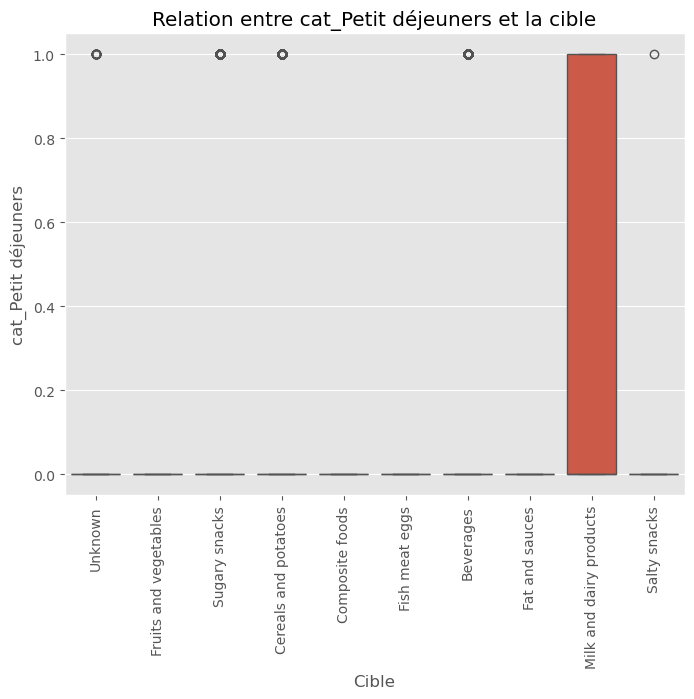

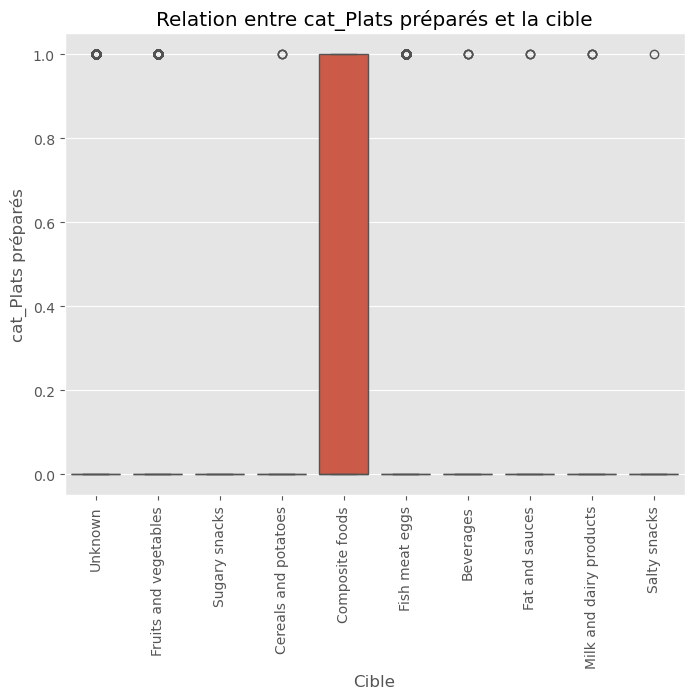

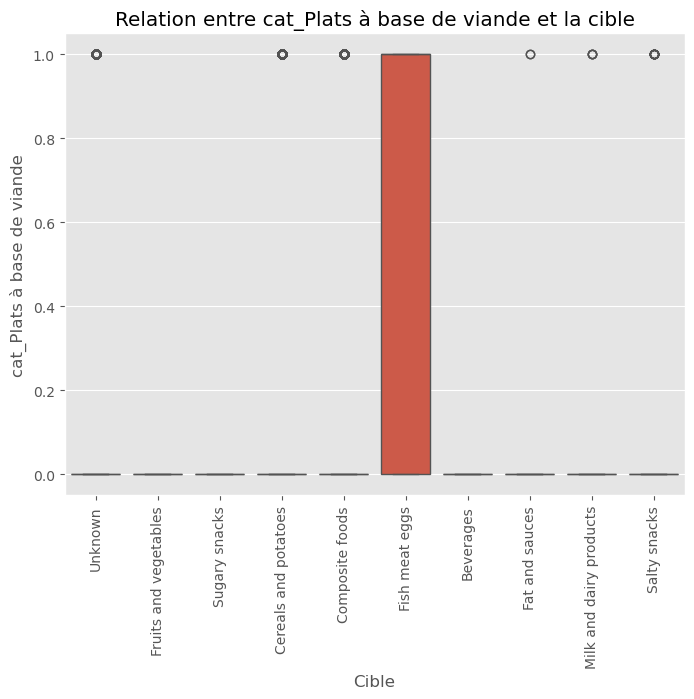

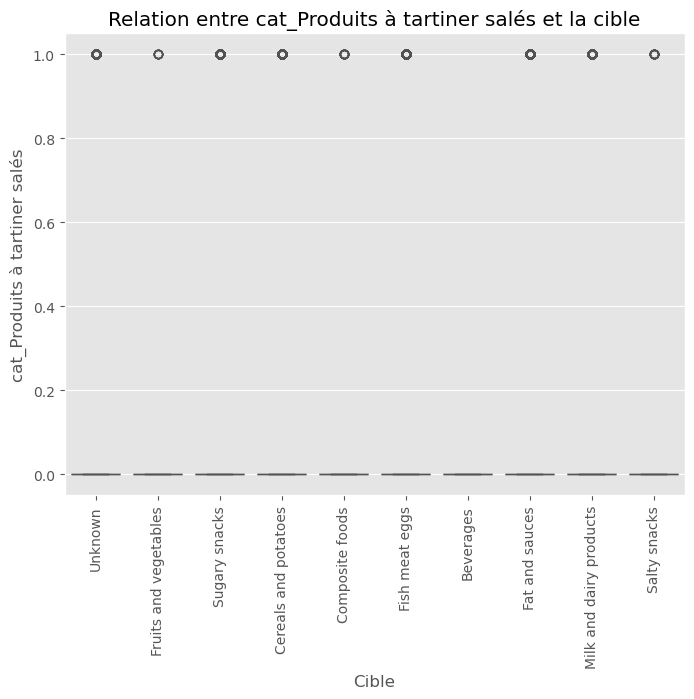

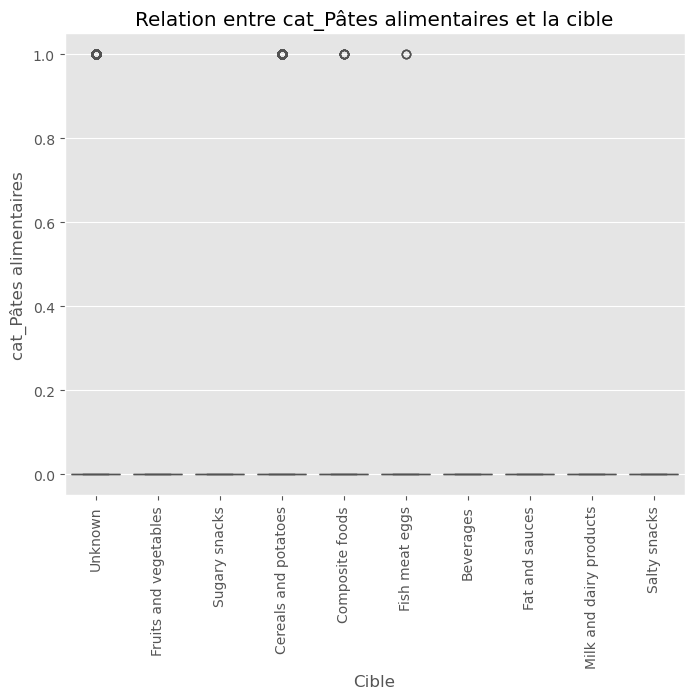

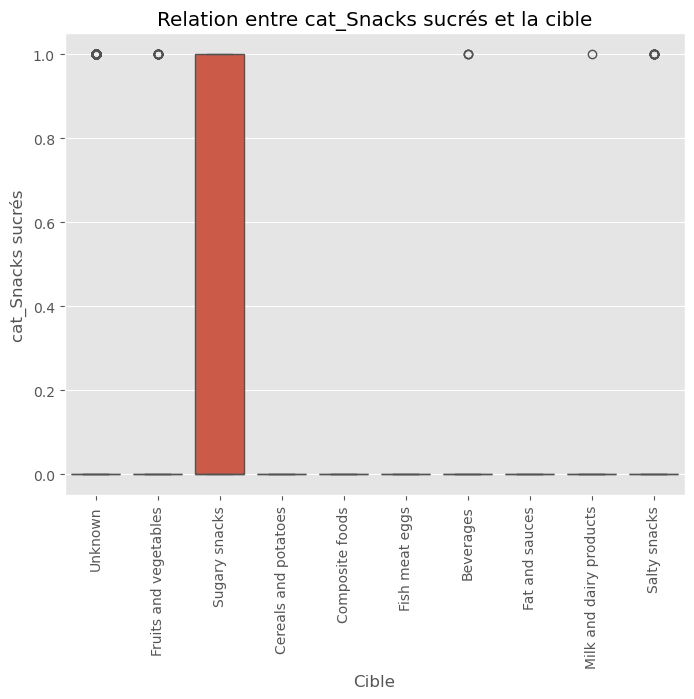

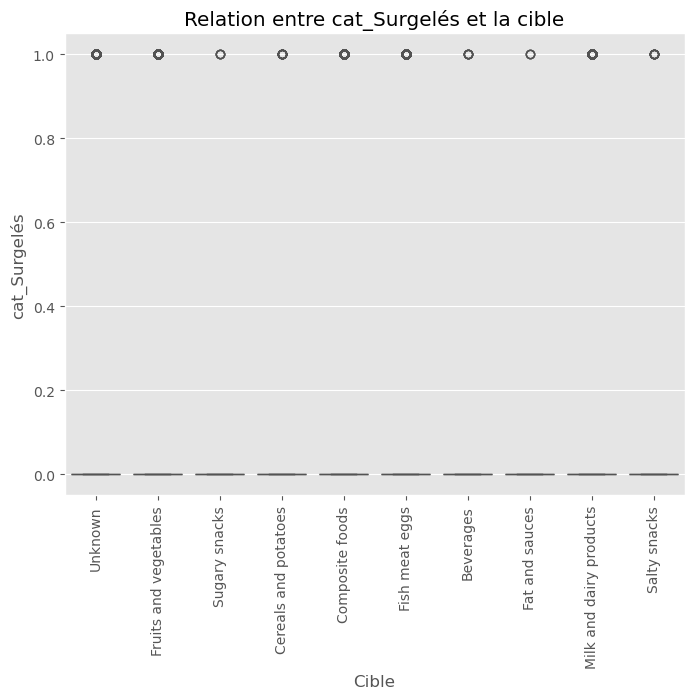

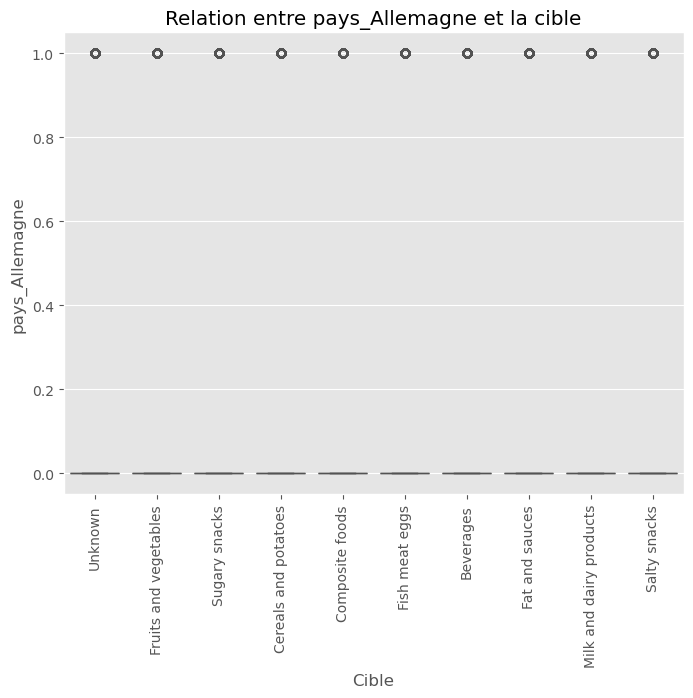

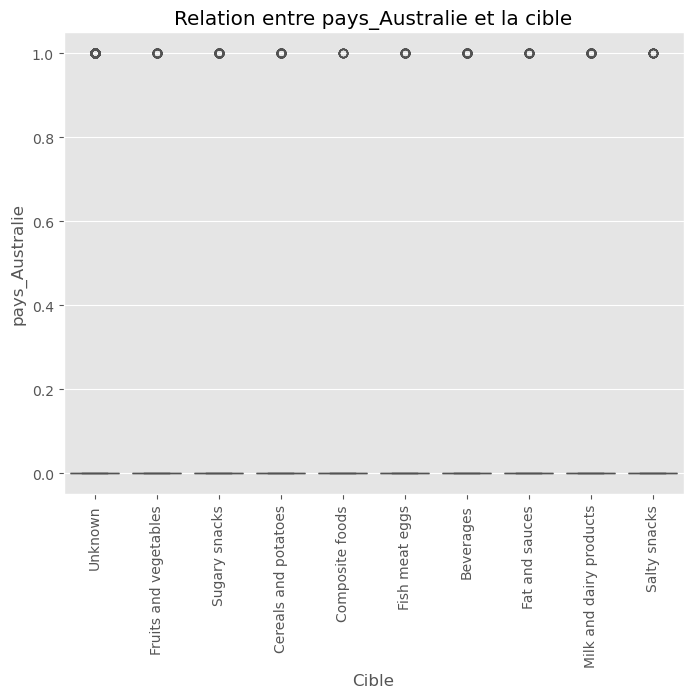

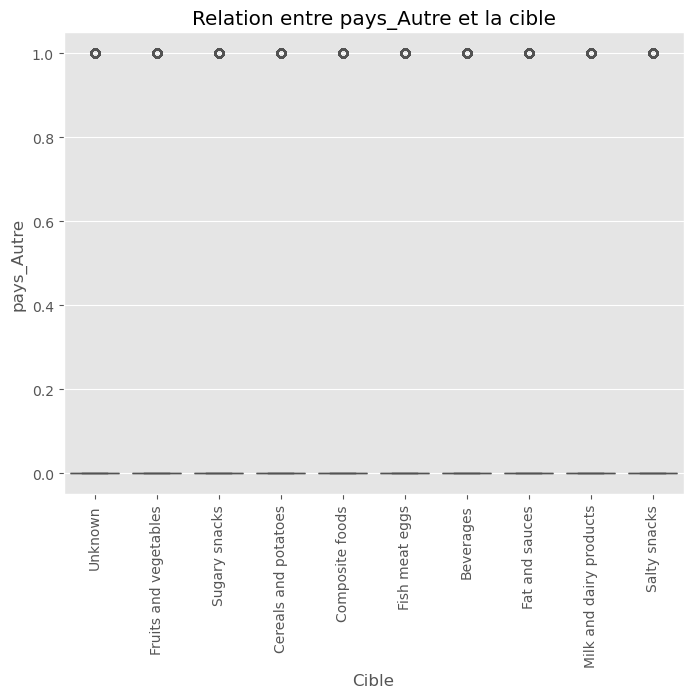

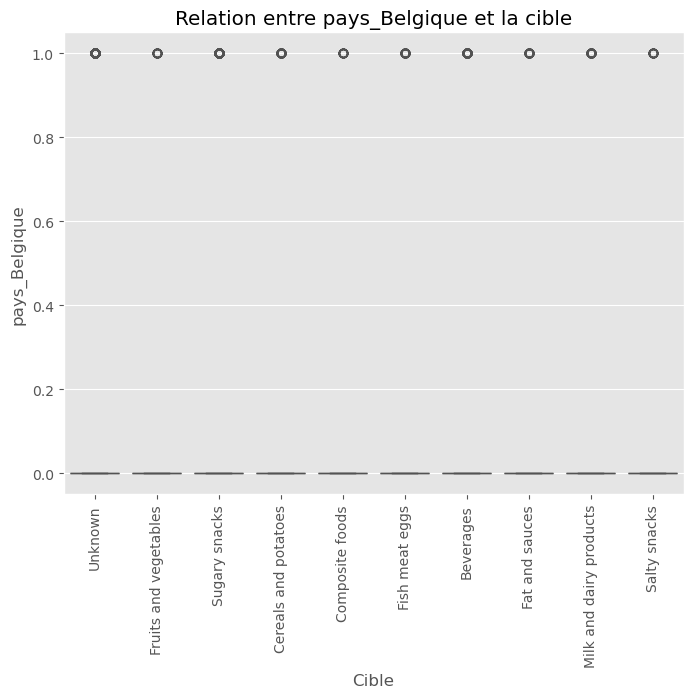

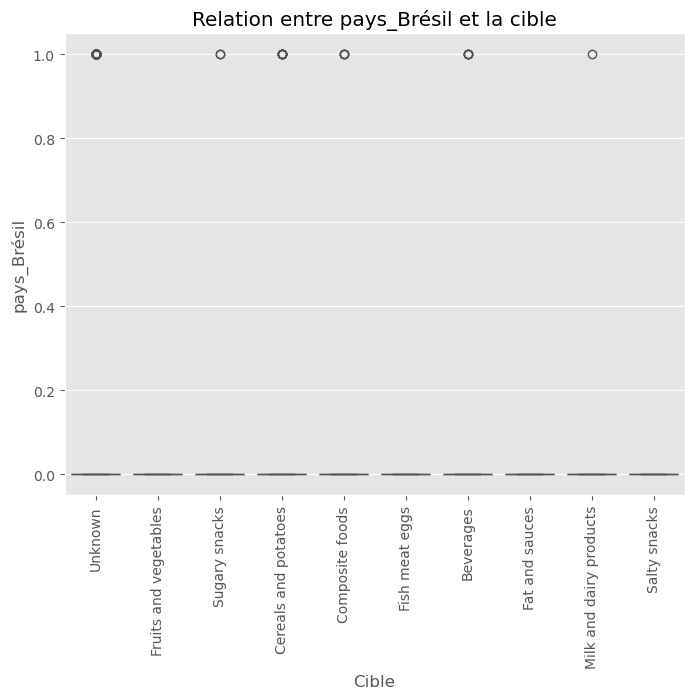

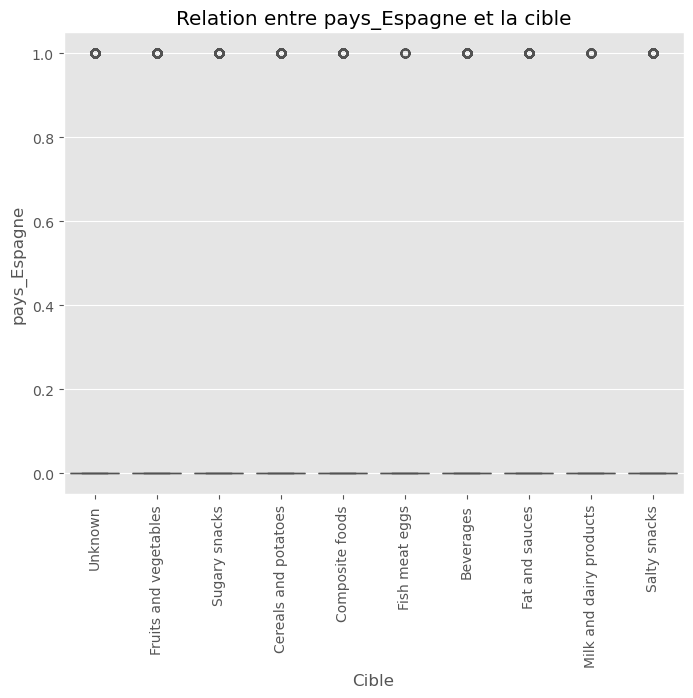

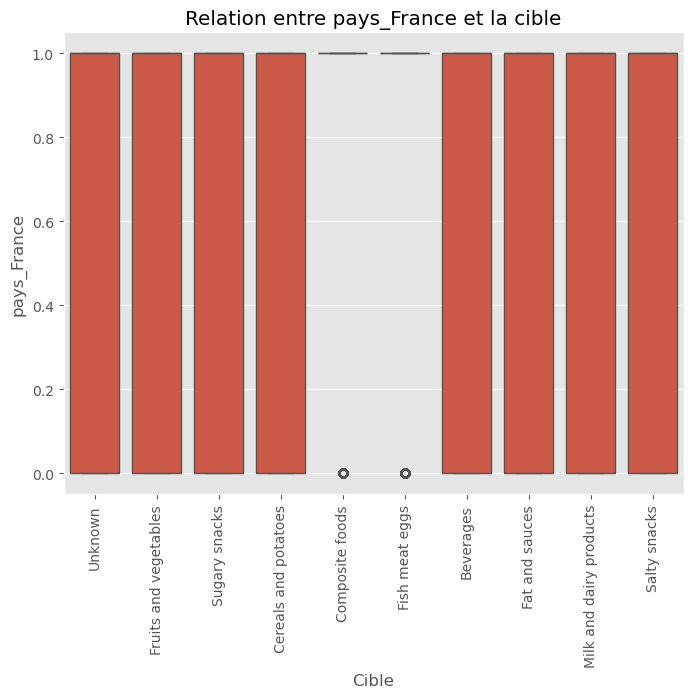

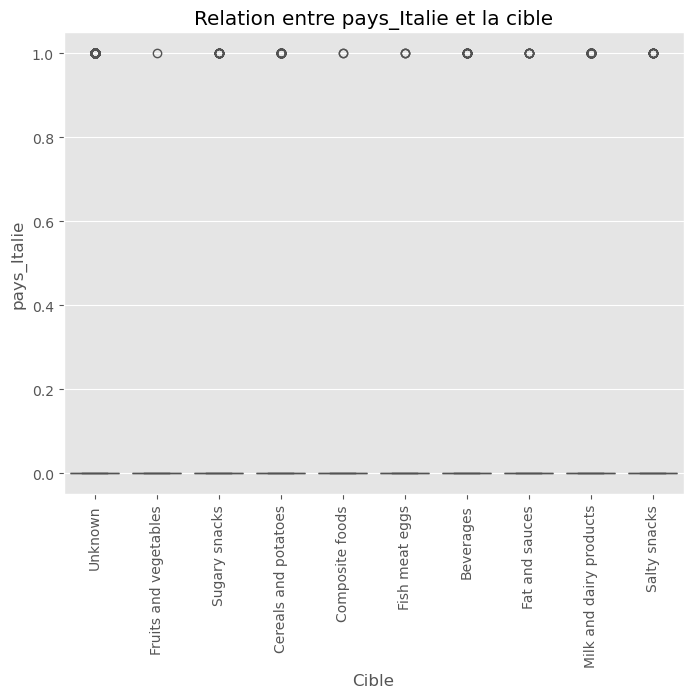

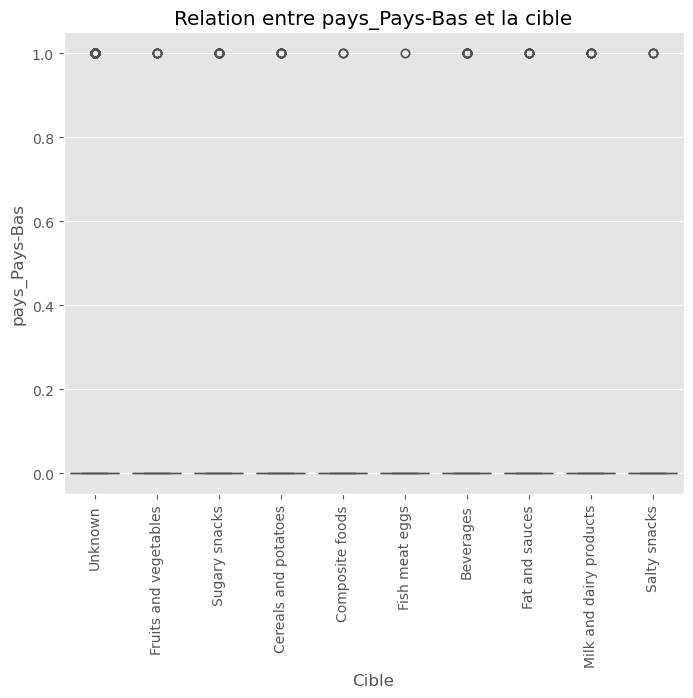

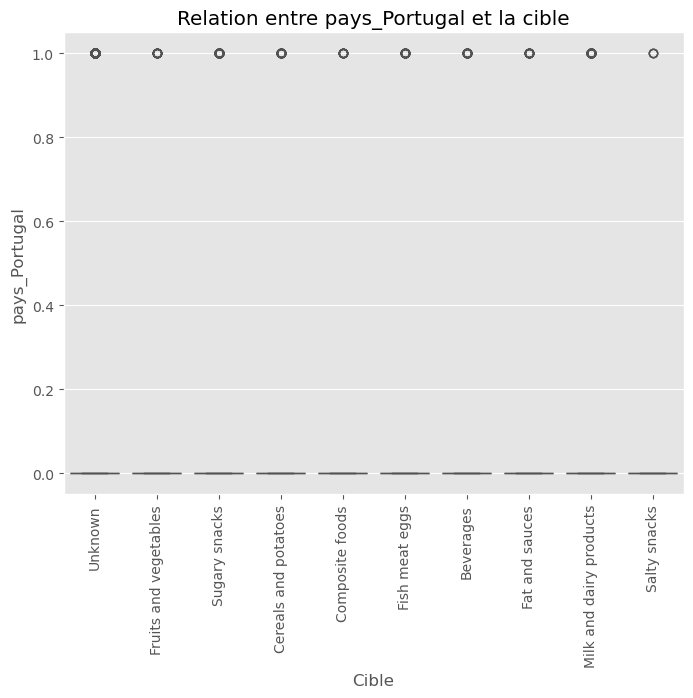

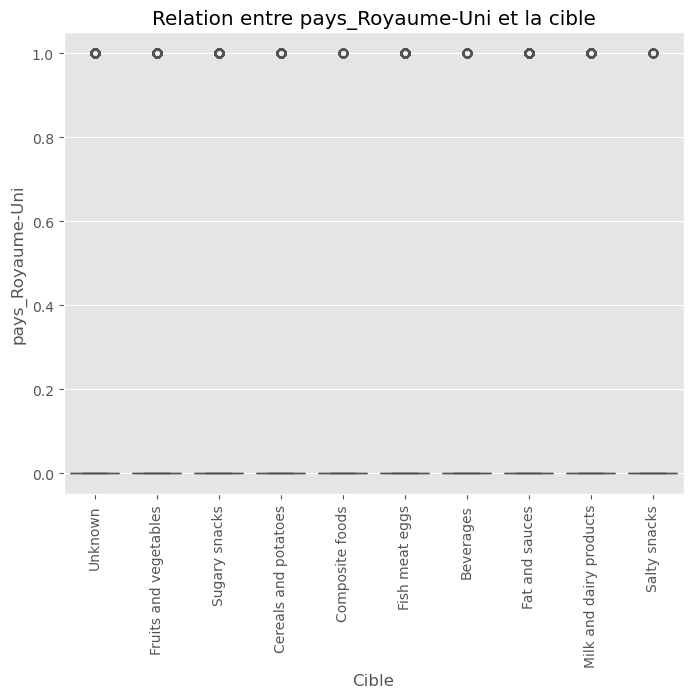

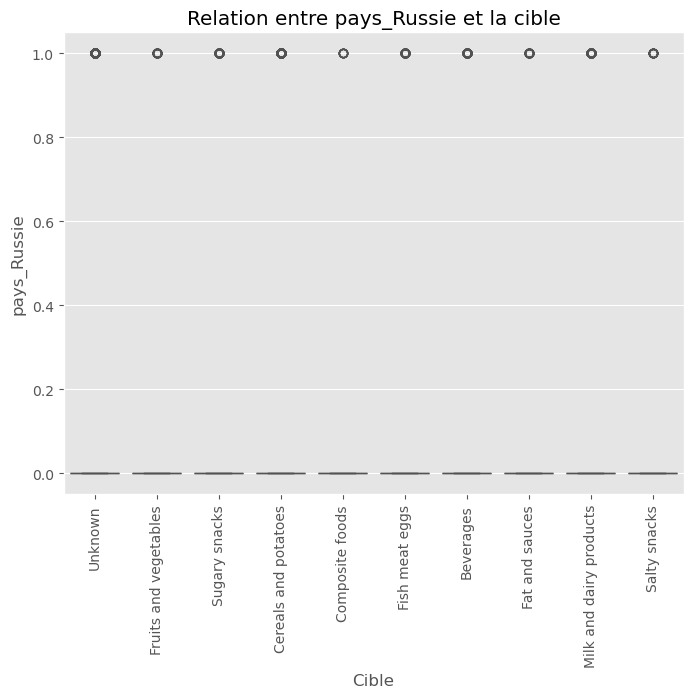

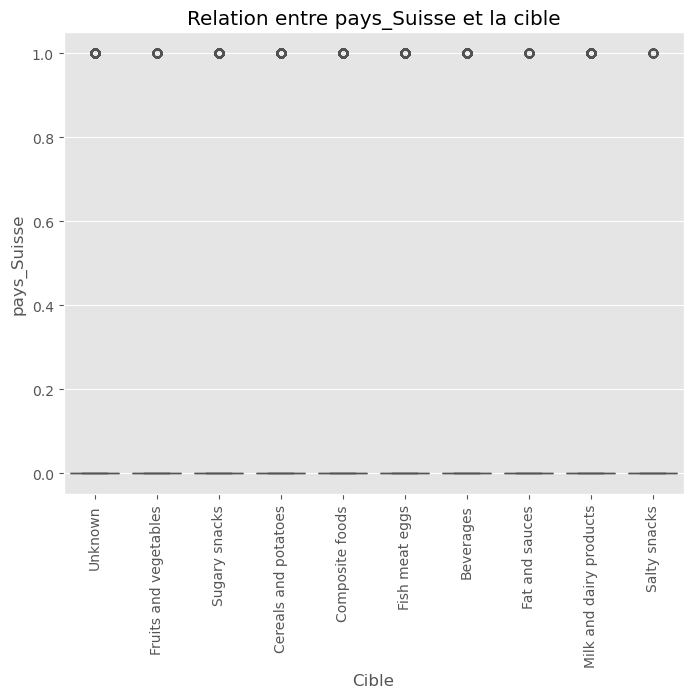

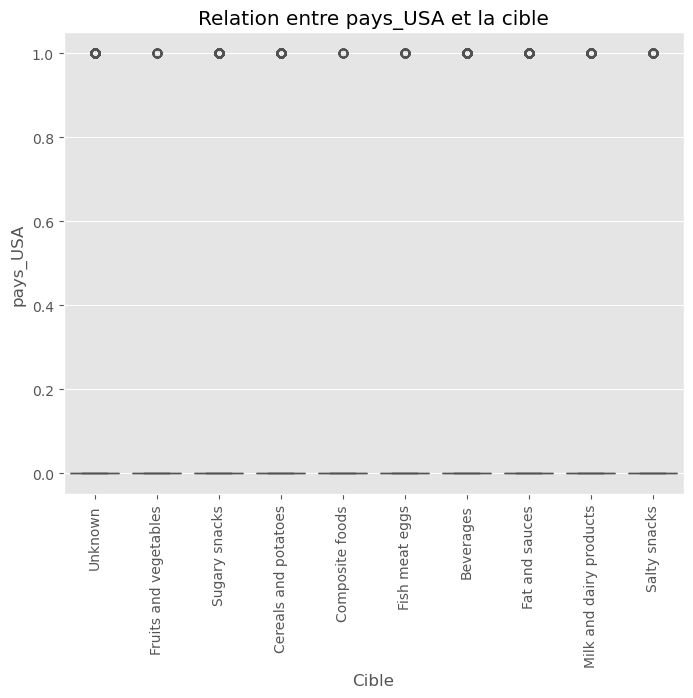

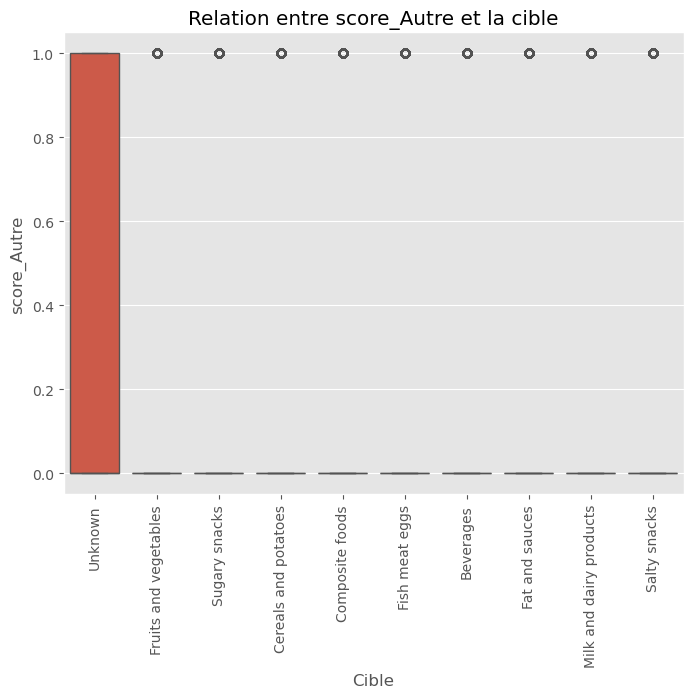

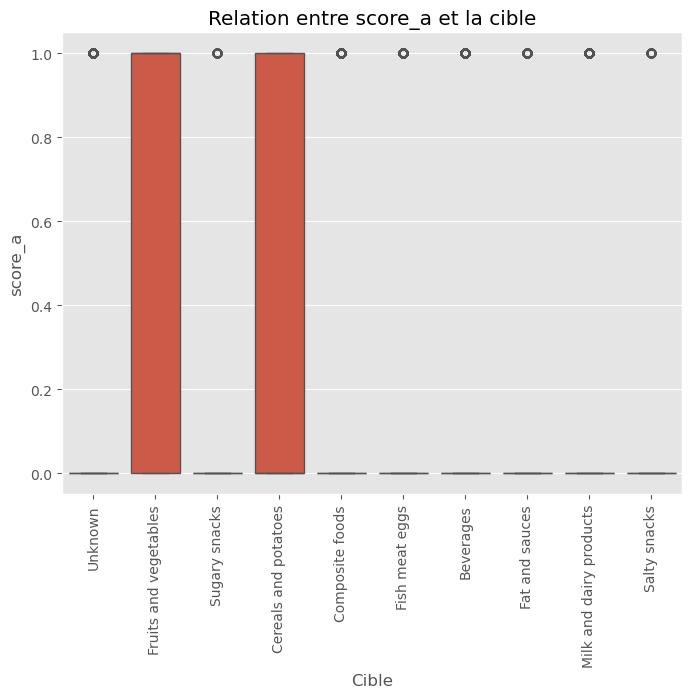

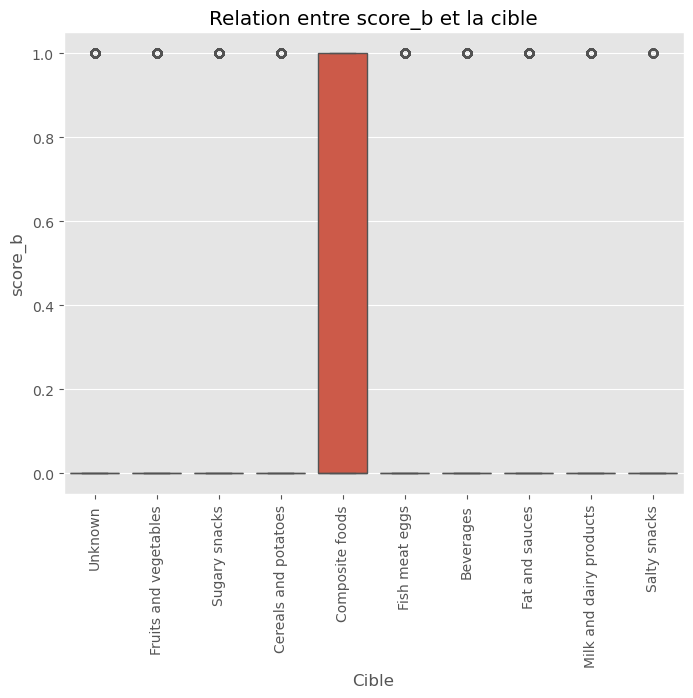

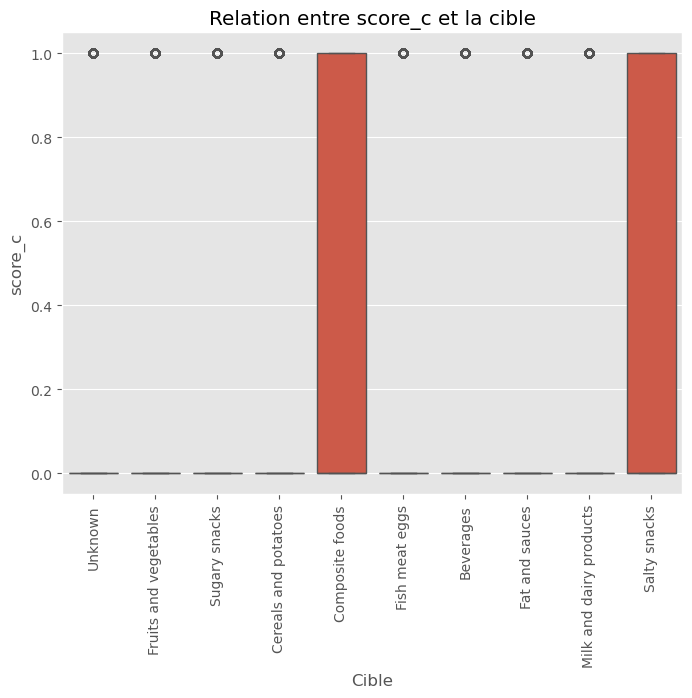

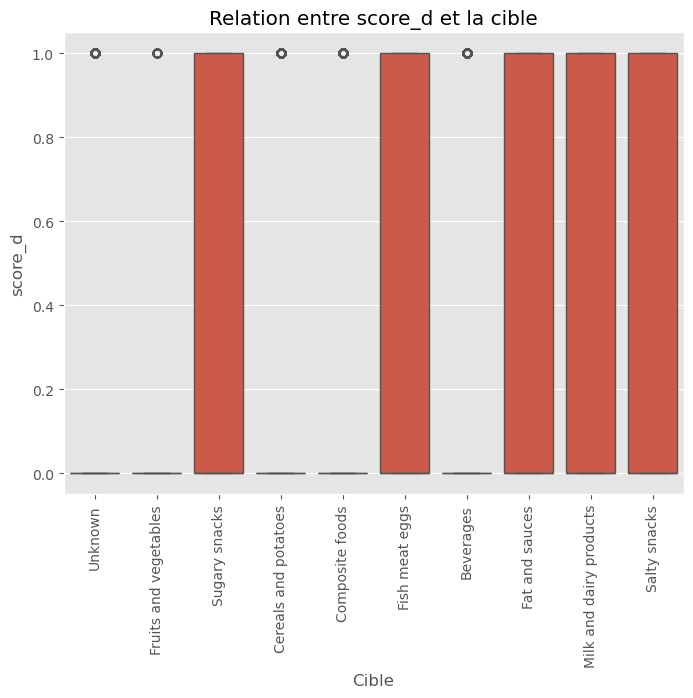

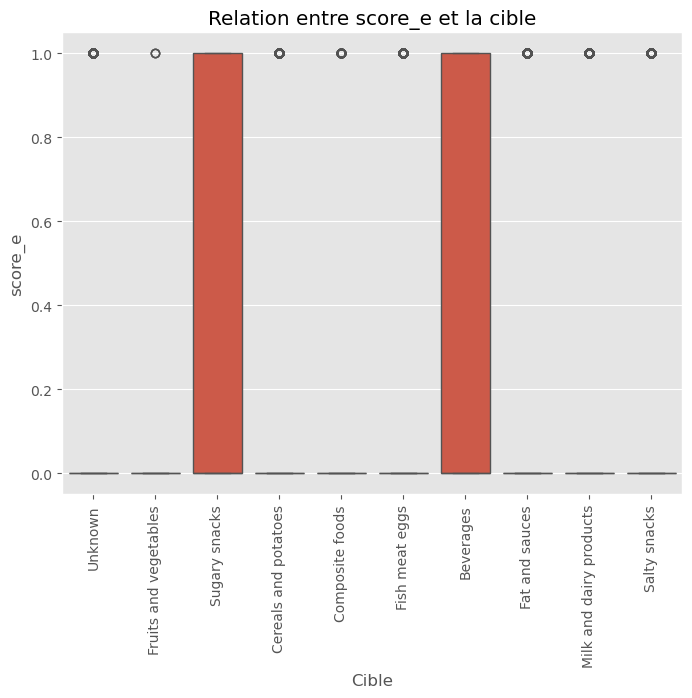

In [615]:
# Boucle sur toutes les colonnes de features
for col in data_encoded.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cible, y=data_encoded[col])
    plt.title(f"Relation entre {col} et la cible")
    plt.xlabel("Cible")
    plt.ylabel(col)
    plt.xticks(rotation=90)
    plt.show()

Pour les protéines par exemple ont observe que celles ci sont plus sont plus présentes dans des groupes comme 'fish meat eggs' ce qui est parfaitement cohérents. On retrouve ce même procédé pour nos différentes features quantitatives.

Pour ce qui est des qualitatives, on apprend pas grand chose si ce n'est la France qui présente des résultat pour le moins étrange. 'Composites foods' et 'fish meat eggs' ont des valeurs élevées (ou maximales) pour toutes les catégories ou groupes, ce qui donne des barres constamment proches ou égales à 1.
Cela suggère une absence de variation ou que ces colonnes représentent des proportions qui atteignent systématiquement leur valeur maximale.

Pour les nutri-score, sans surprise on retrouve une certaine cohérence. Les groupes 'Fruits and vegetables' et 'Cereals and potatoes' obtiennent pour la plupart de la note A , là où 'Beverages' et 'Sugary snacks' possèdent en général la note de E ( voir D pour 'Sugary snacks').

In [619]:
# Méthode ANOVA
for col in data_encoded.columns:
    groups = [data_encoded[col][cible == category] for category in cible.unique()]
    anova_result = f_oneway(*groups)
    print(f"ANOVA pour {col} : Statistique={anova_result.statistic}, p-valeur={anova_result.pvalue}")

ANOVA pour salt_100g : Statistique=240.21833310428886, p-valeur=0.0
ANOVA pour proteins_100g : Statistique=3852.5807208545225, p-valeur=0.0
ANOVA pour sugars_100g : Statistique=4924.148916050289, p-valeur=0.0
ANOVA pour carbohydrates_100g : Statistique=7212.8762365788725, p-valeur=0.0
ANOVA pour saturated-fat_100g : Statistique=1635.428146007844, p-valeur=0.0
ANOVA pour fat_100g : Statistique=2593.976231743359, p-valeur=0.0
ANOVA pour energy_100g : Statistique=5028.675878977153, p-valeur=0.0
ANOVA pour cat_Aliments et boissons à base de végétaux : Statistique=1760.44713589659, p-valeur=0.0
ANOVA pour cat_Autres : Statistique=5403.882839126566, p-valeur=0.0
ANOVA pour cat_Biscuits : Statistique=1686.5075141591067, p-valeur=0.0
ANOVA pour cat_Boissons : Statistique=38259.852758089255, p-valeur=0.0
ANOVA pour cat_Chips et frites : Statistique=3209.3360230575345, p-valeur=0.0
ANOVA pour cat_Conserves : Statistique=908.4003558775087, p-valeur=0.0
ANOVA pour cat_Desserts : Statistique=512.40

Si la p-valeur est inférieure à 0.05, cela indique que la feature est significativement différente entre les catégories de la cible. Ici toute nos p-value sont bien inférieur à 0,05. On peut conclure que toute nos variable sont signicativement différente entre les catégorie de la cible.
En d’autres termes, le groupe auquel appartient un produit influence significativement sa teneur moyenne en sel.

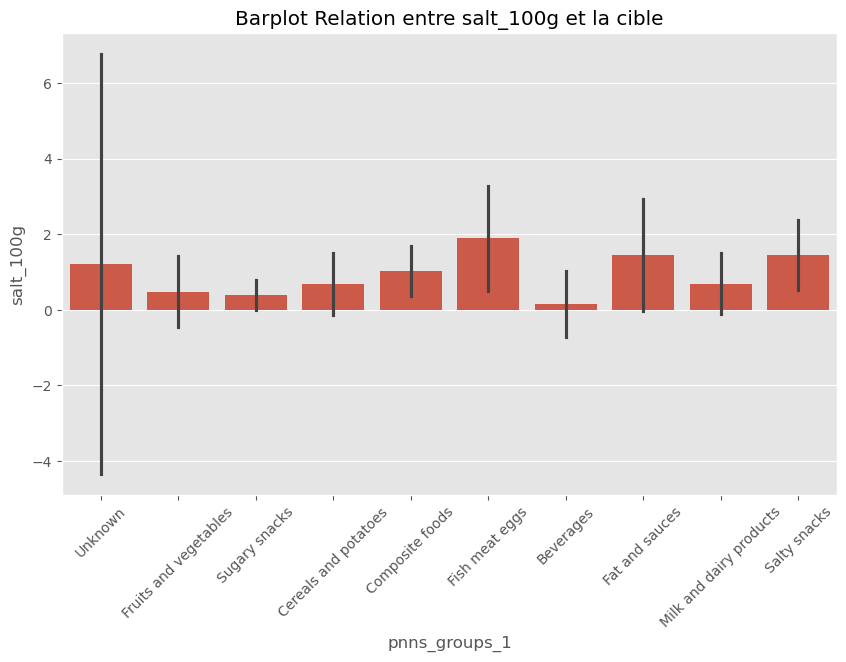

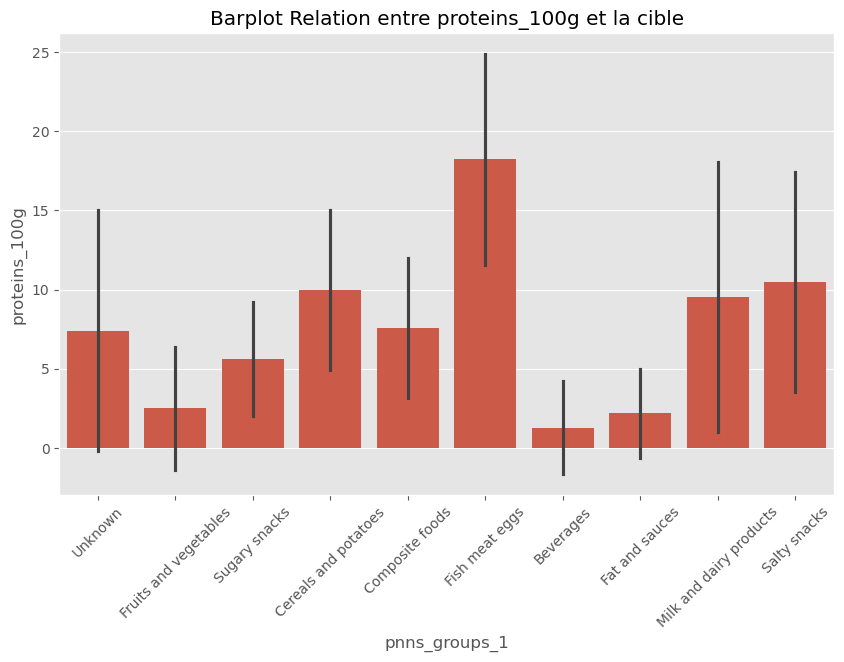

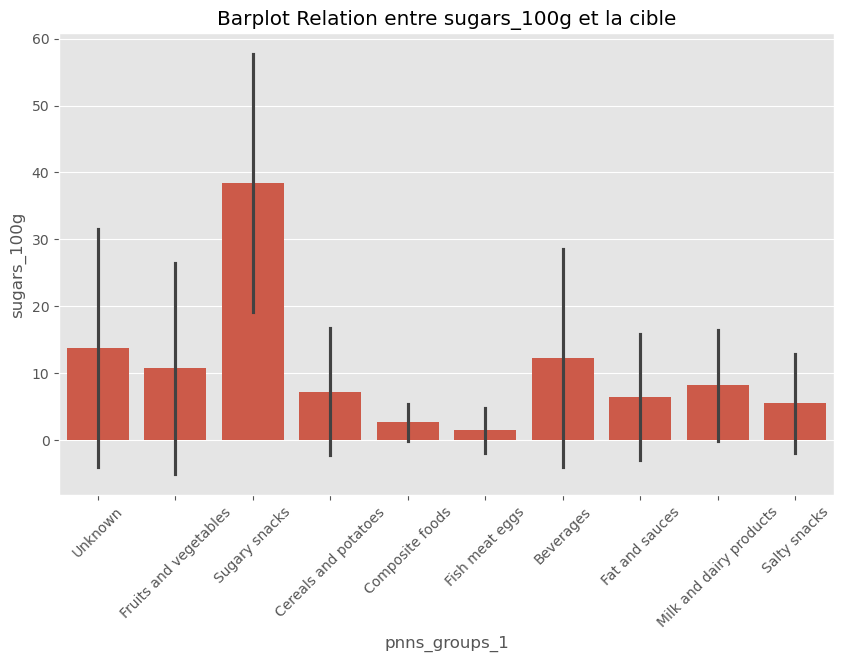

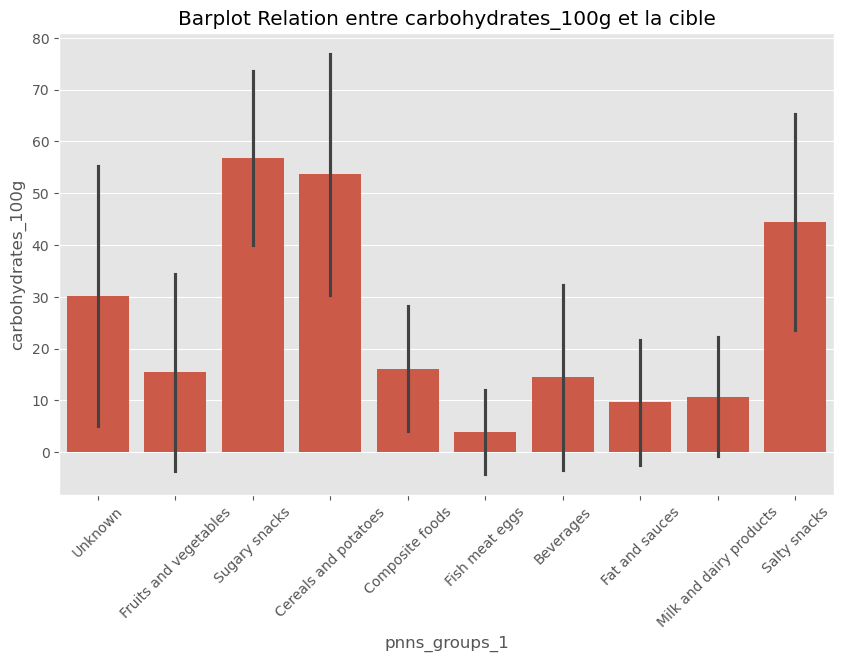

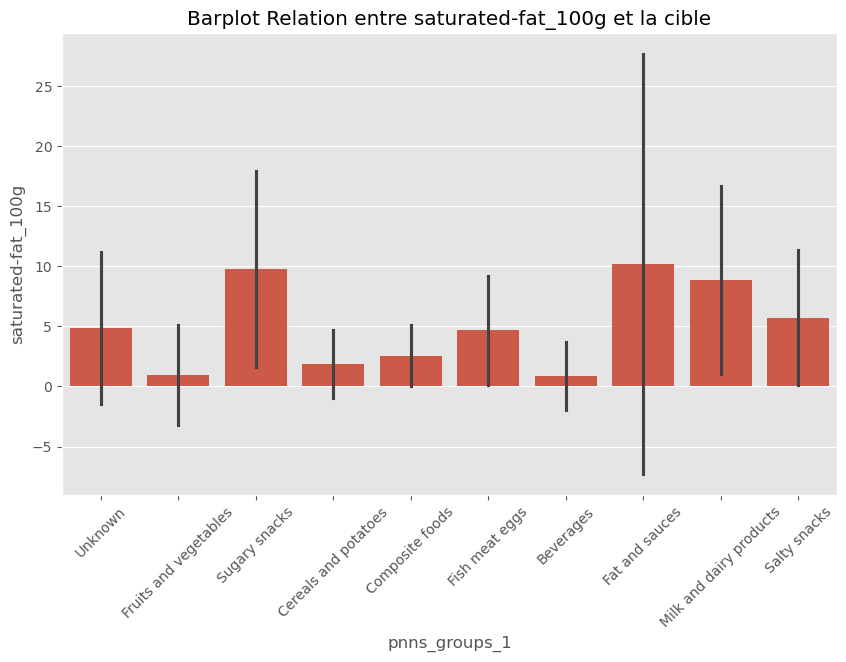

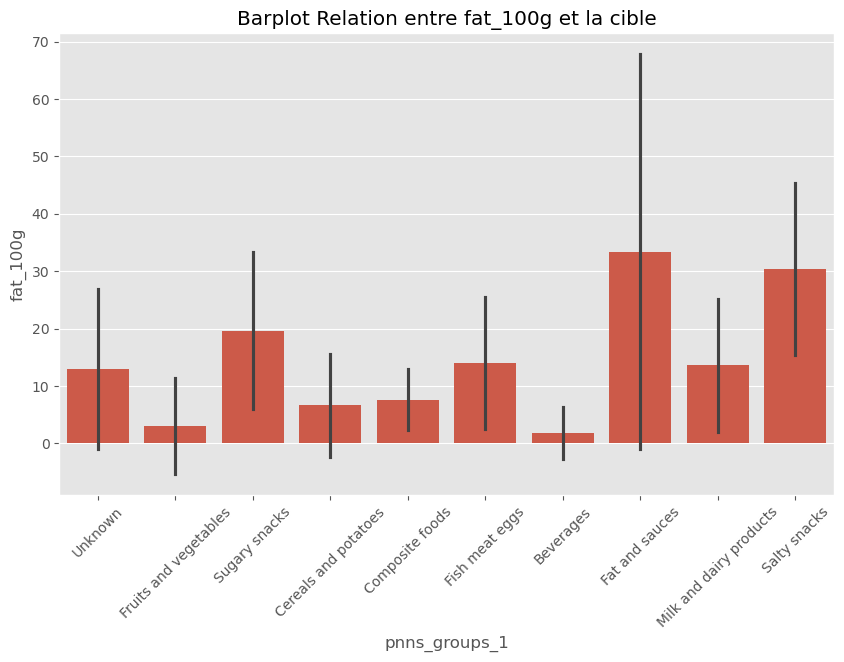

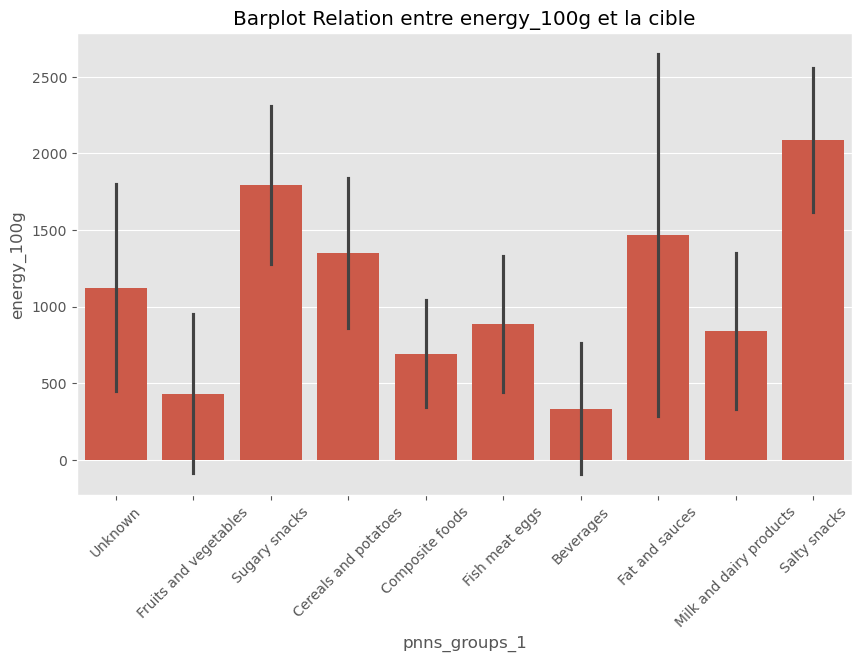

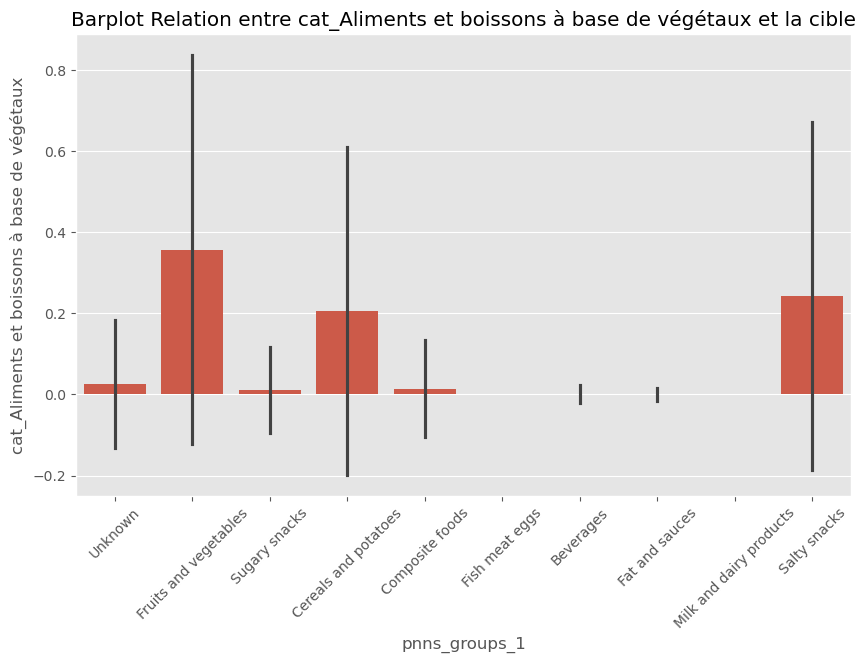

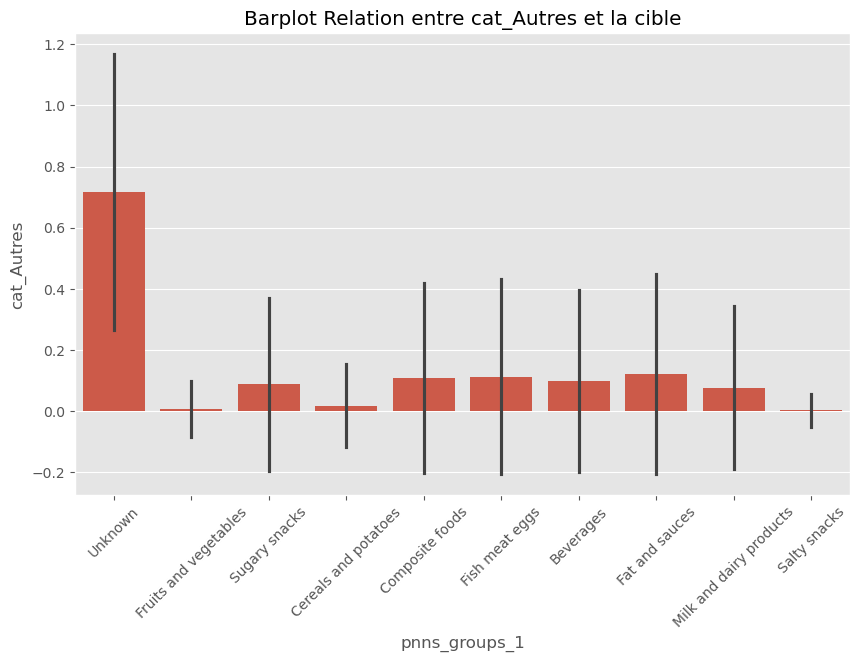

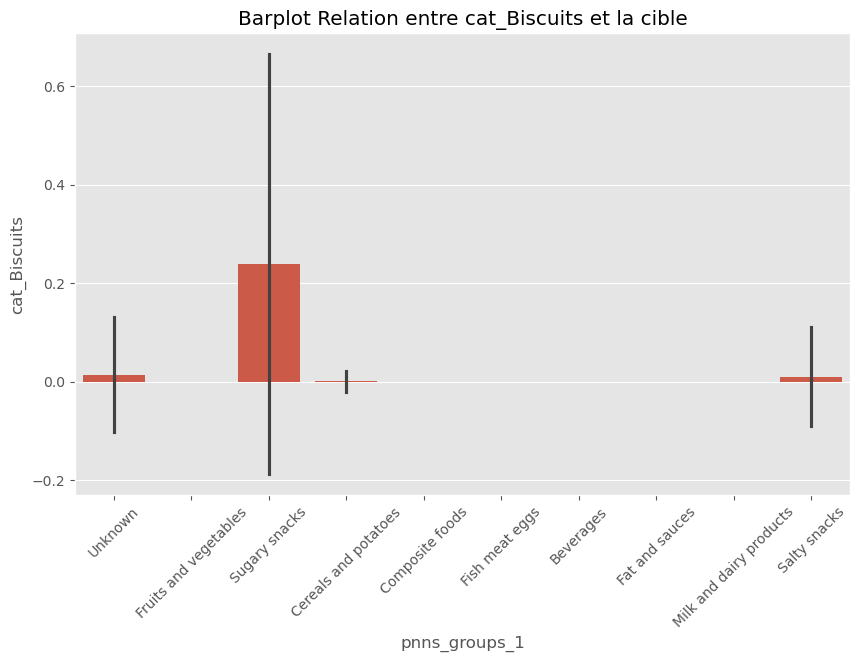

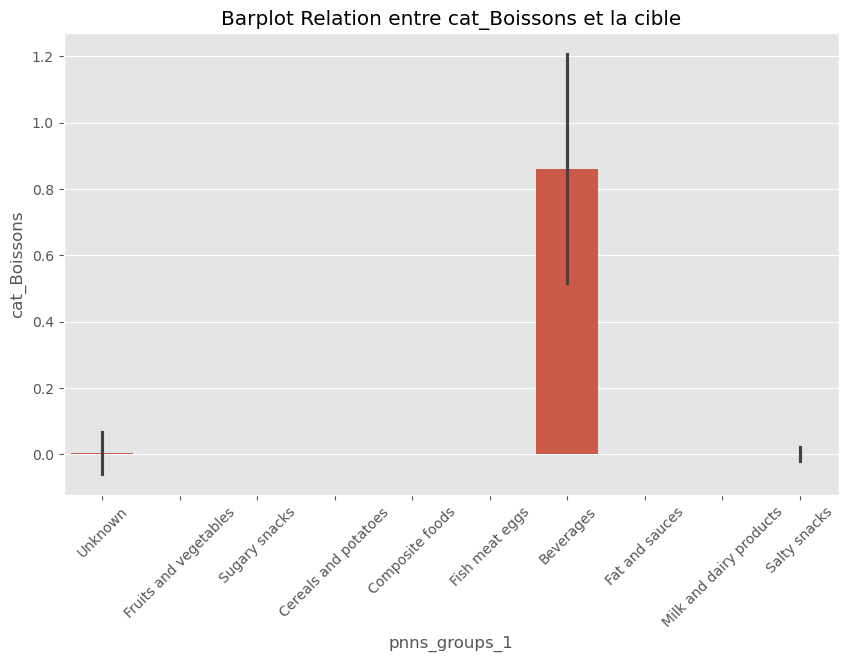

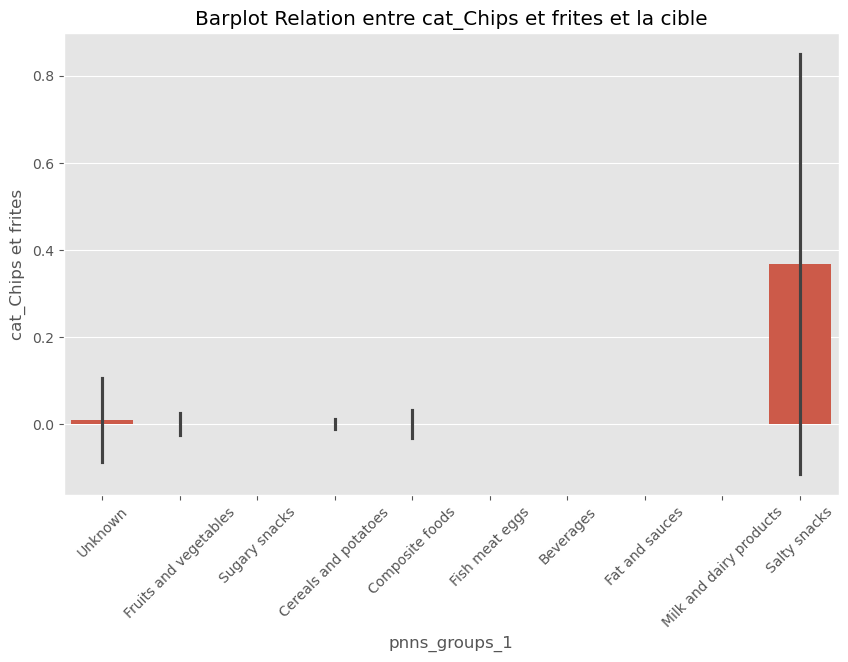

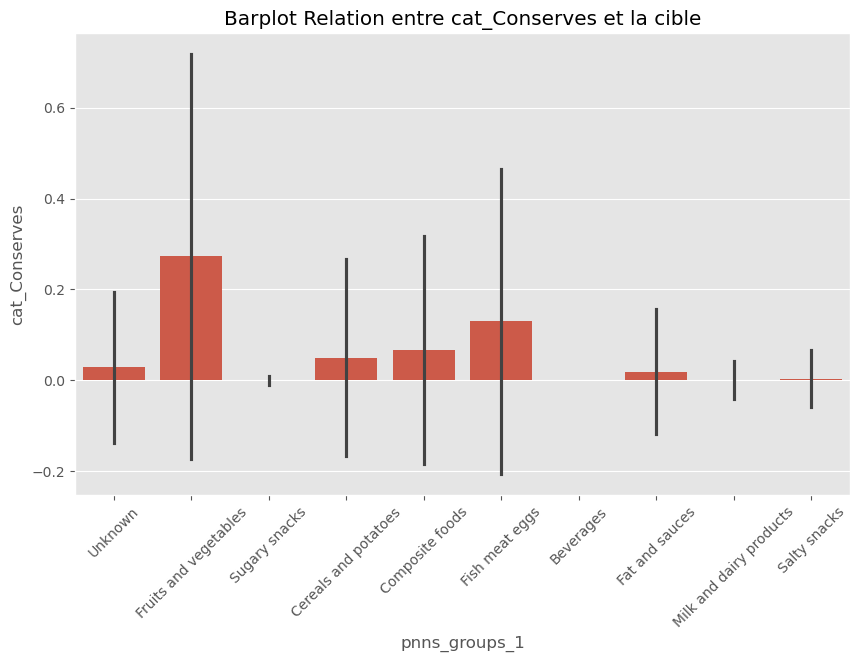

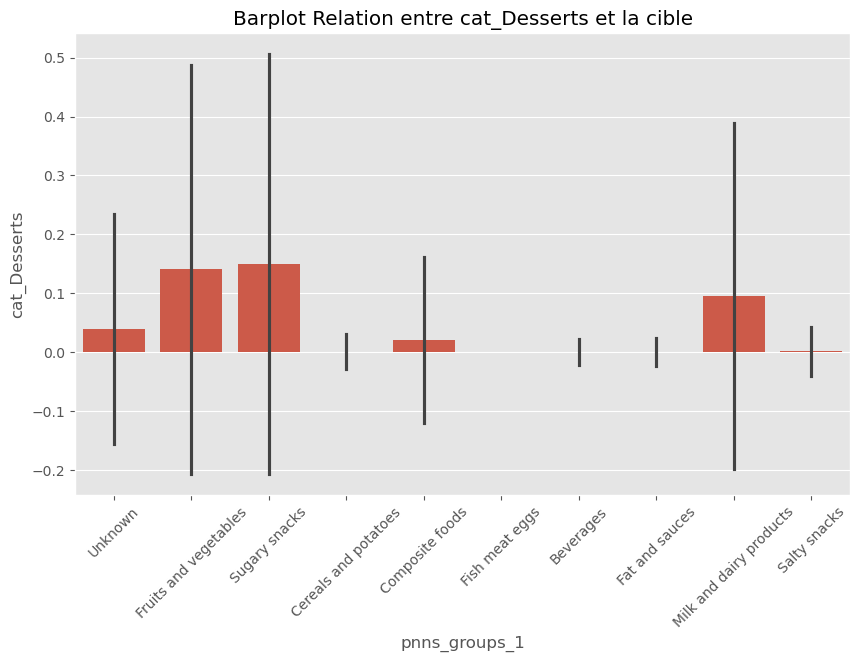

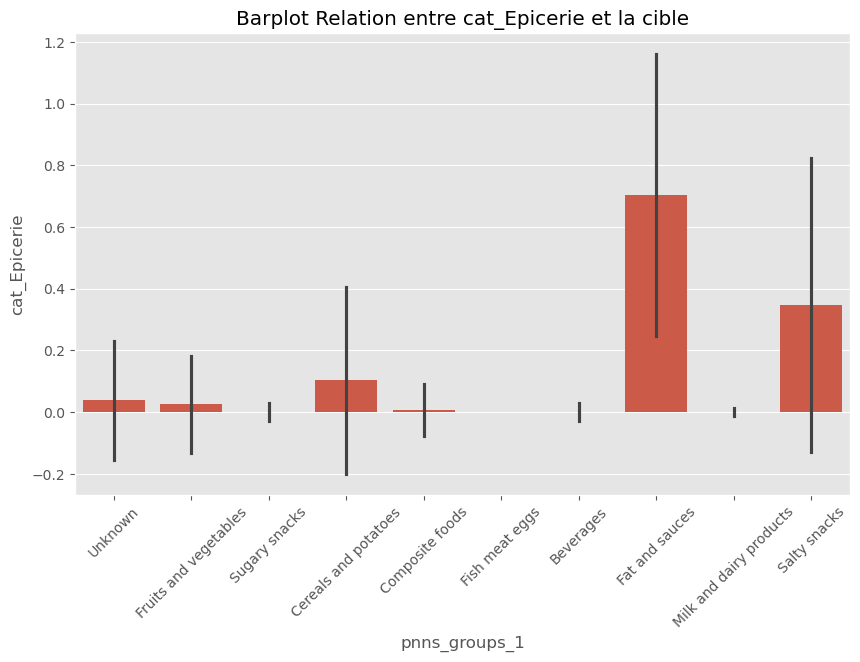

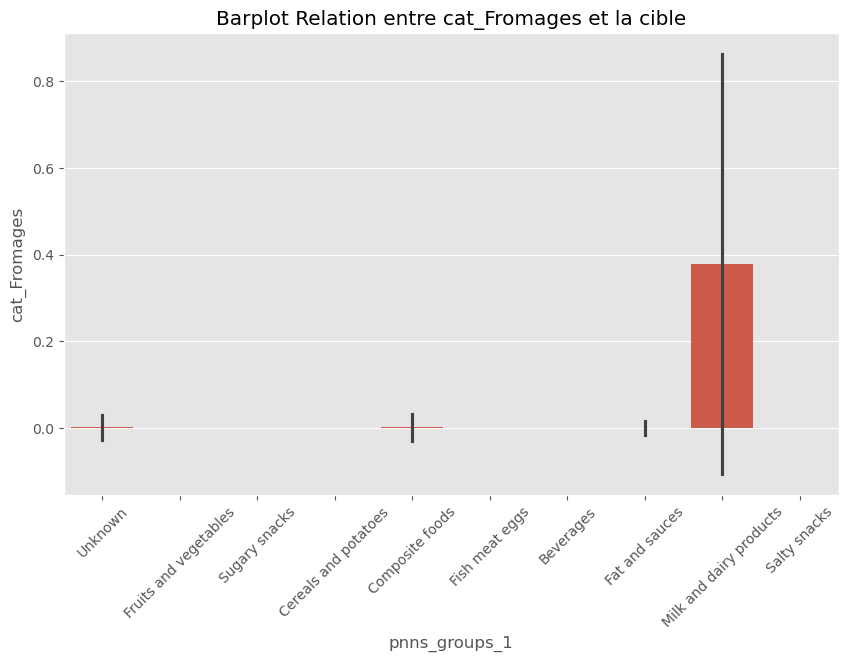

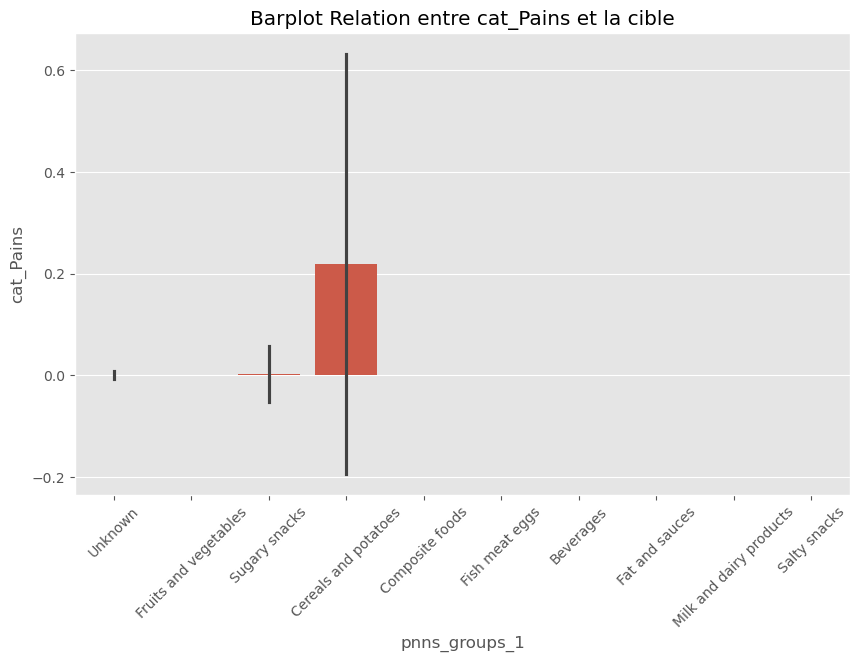

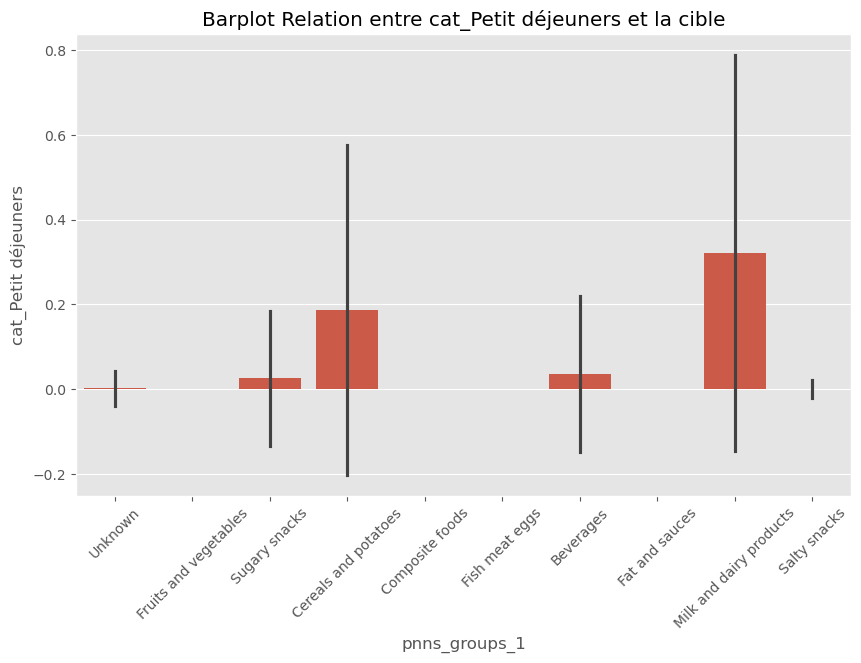

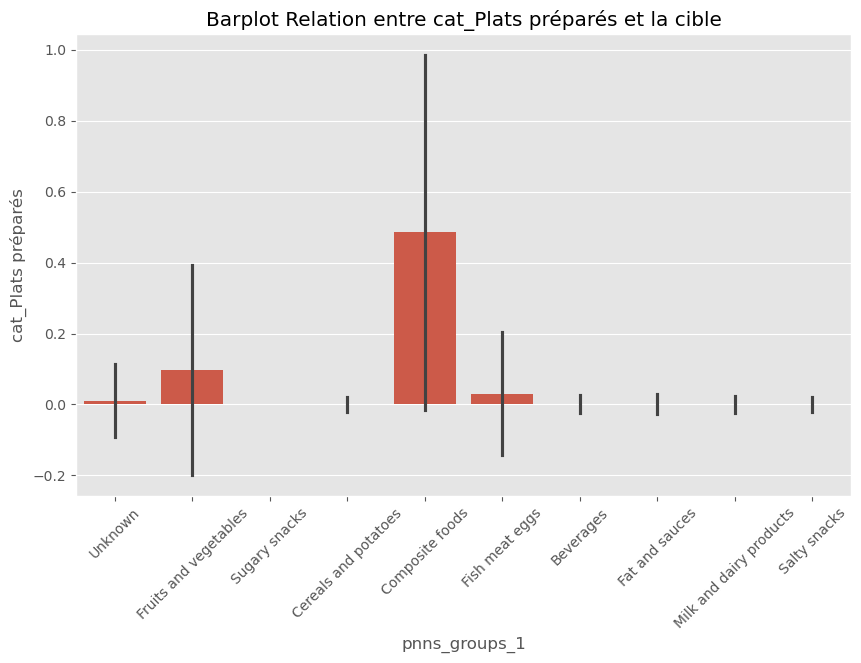

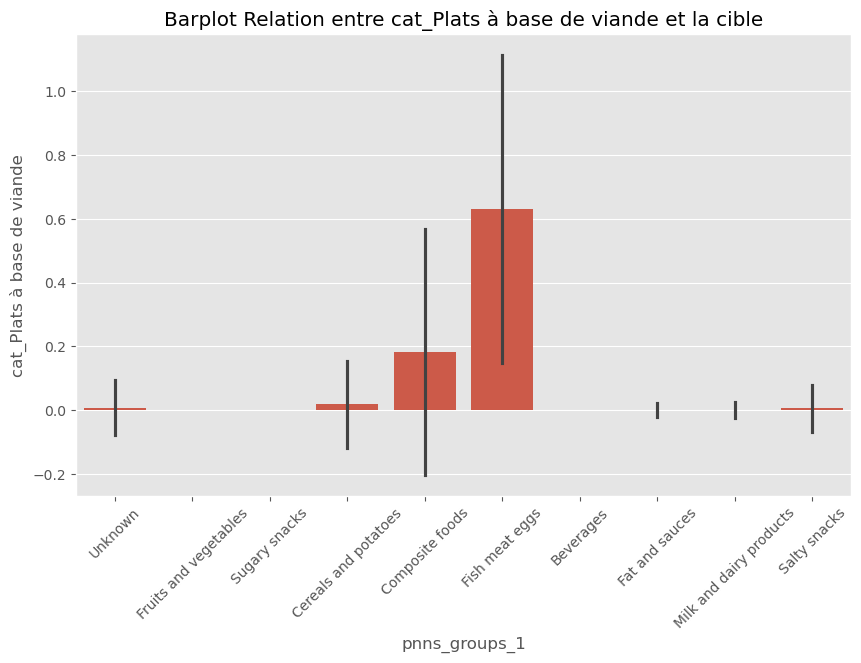

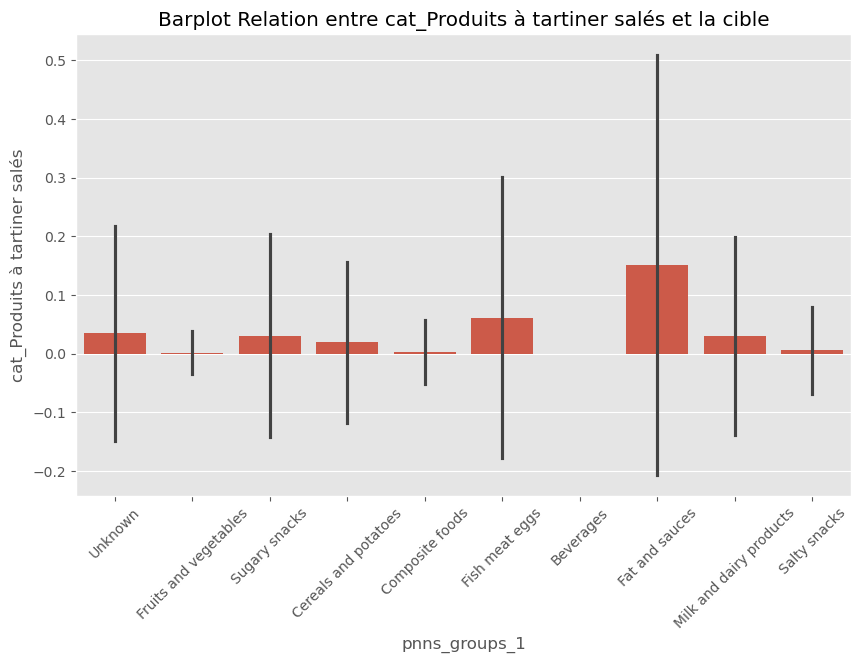

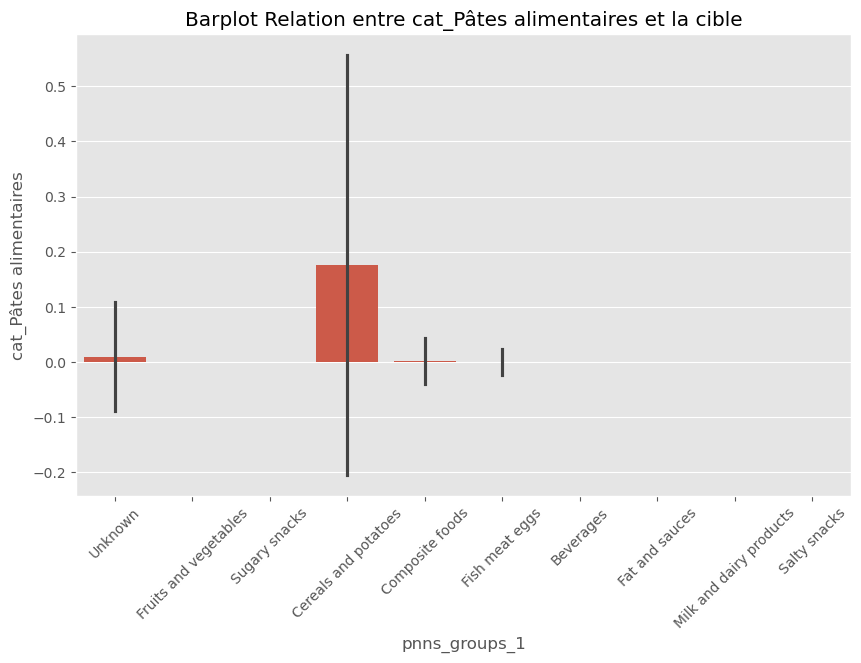

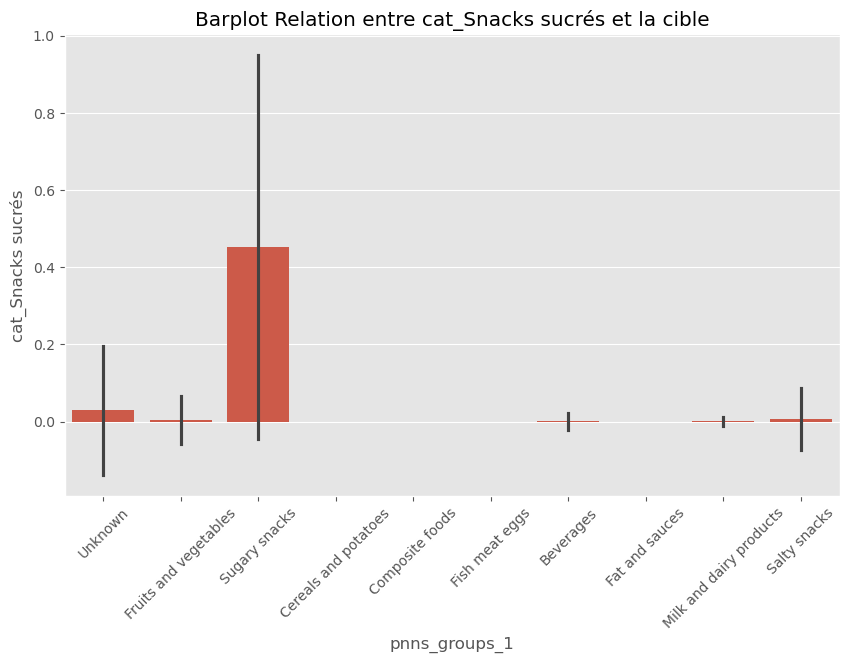

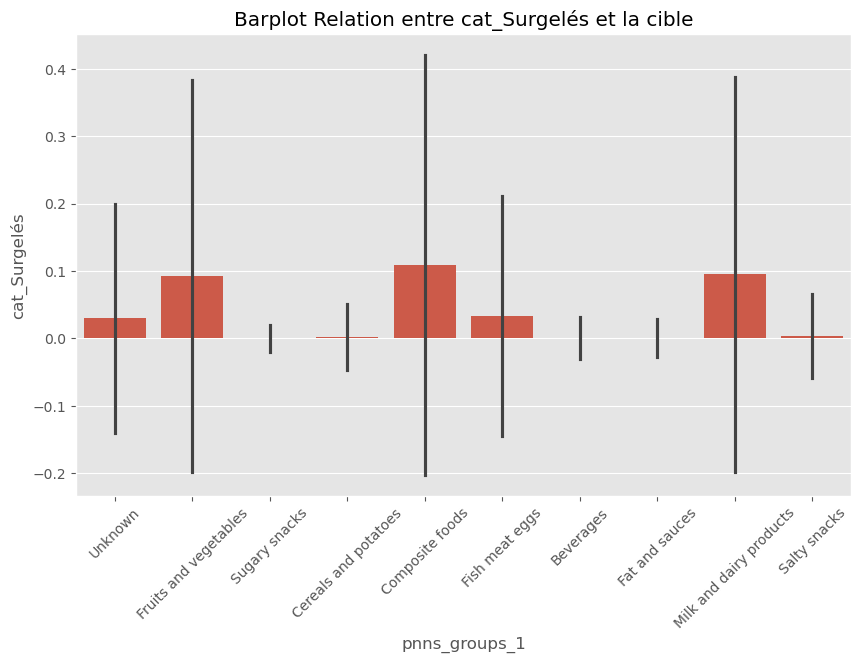

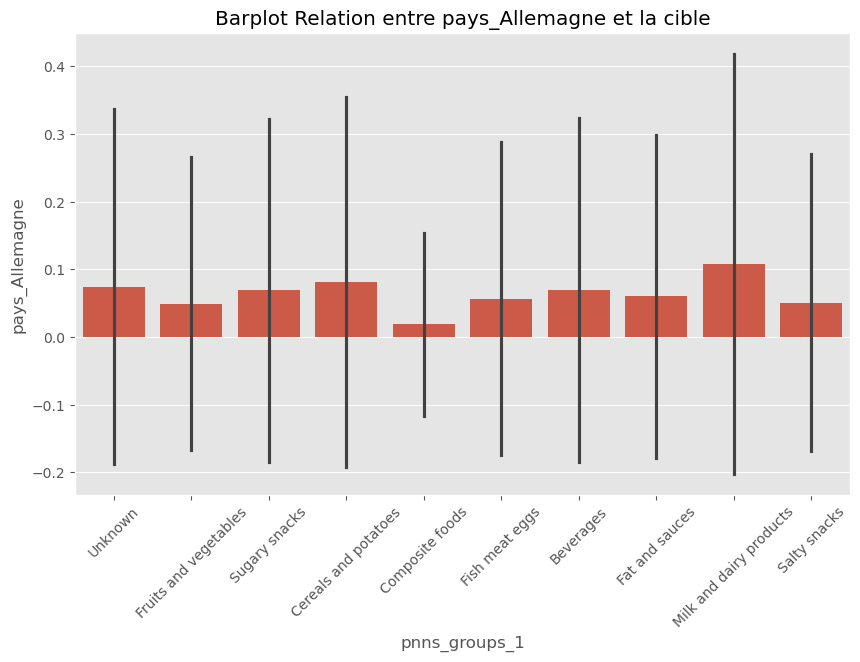

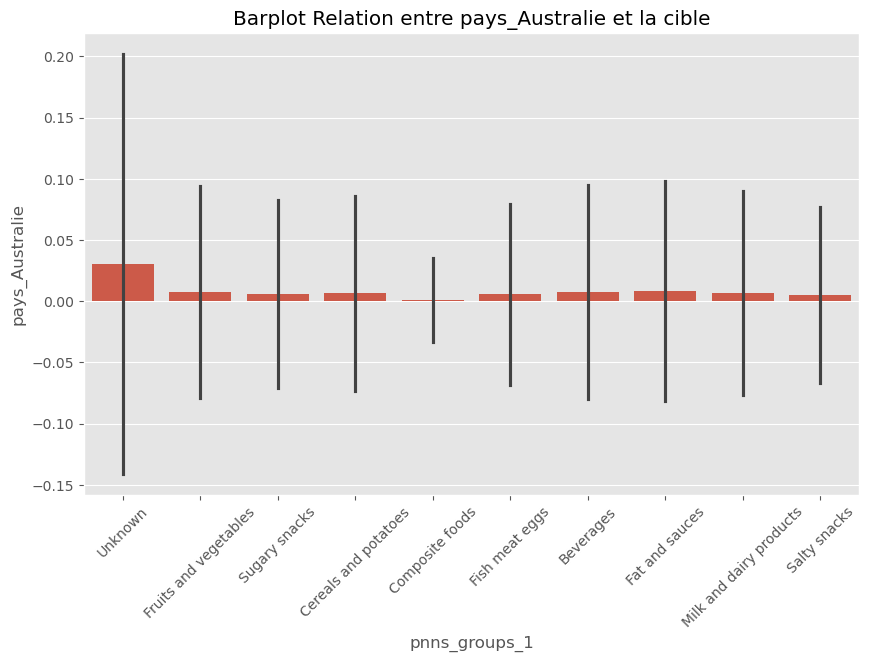

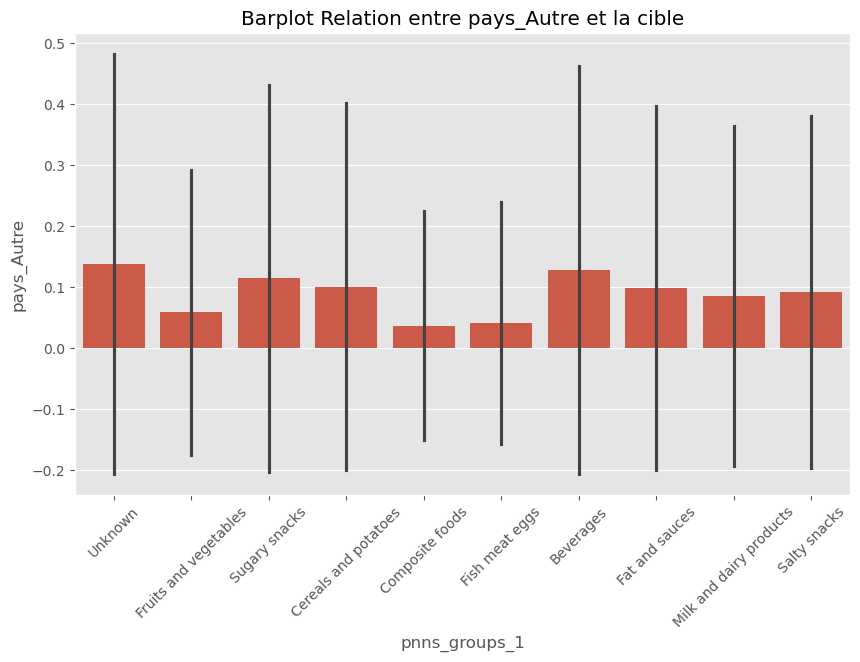

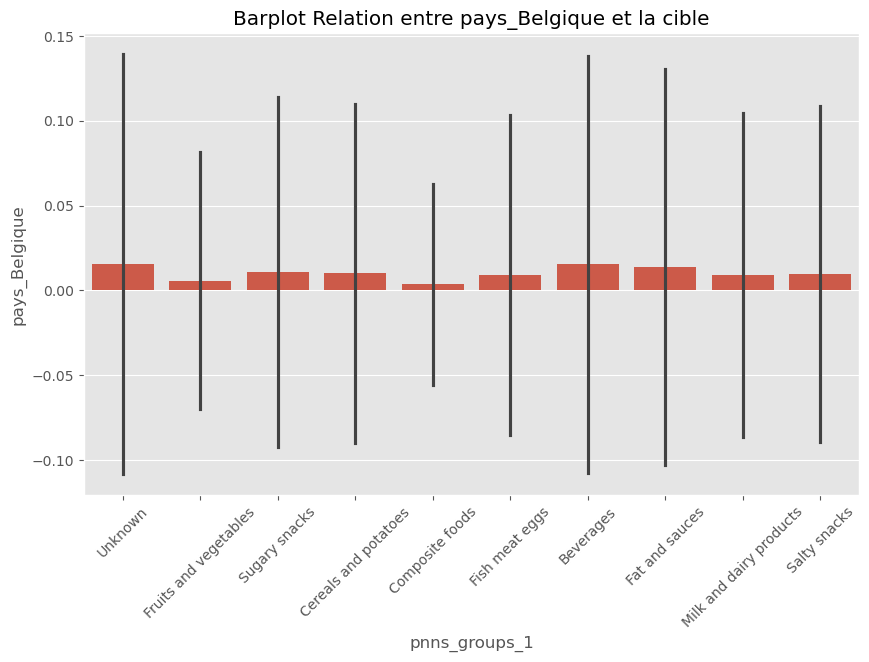

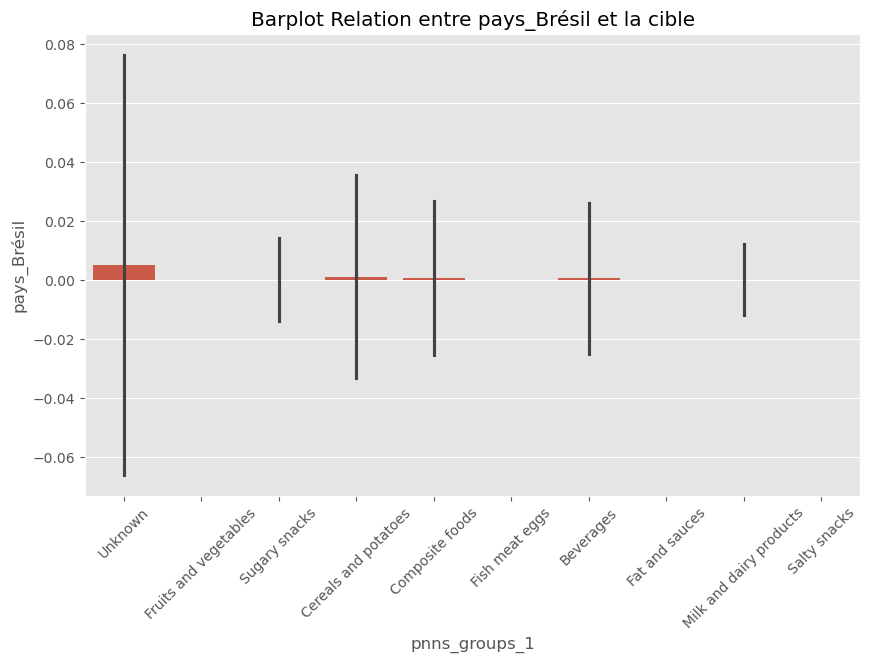

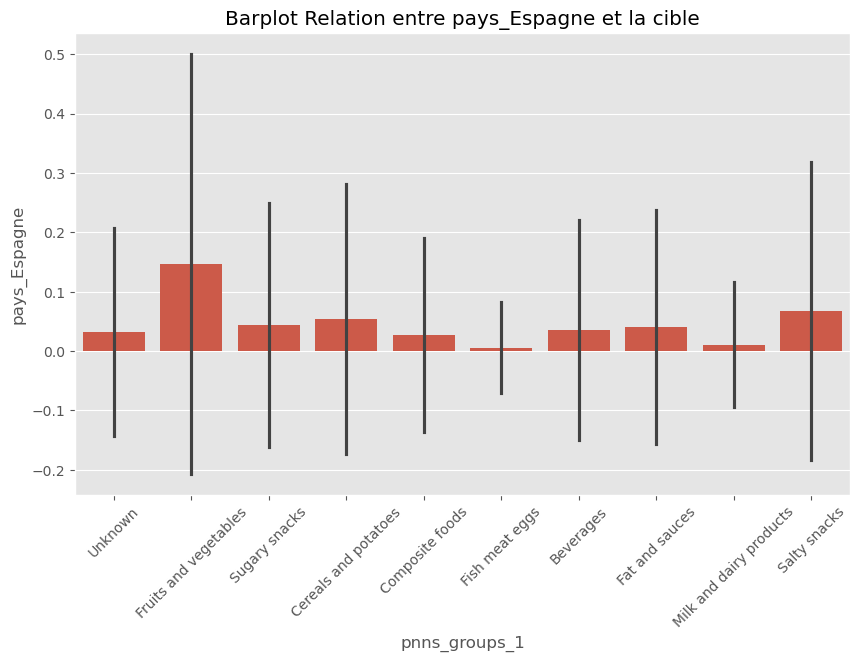

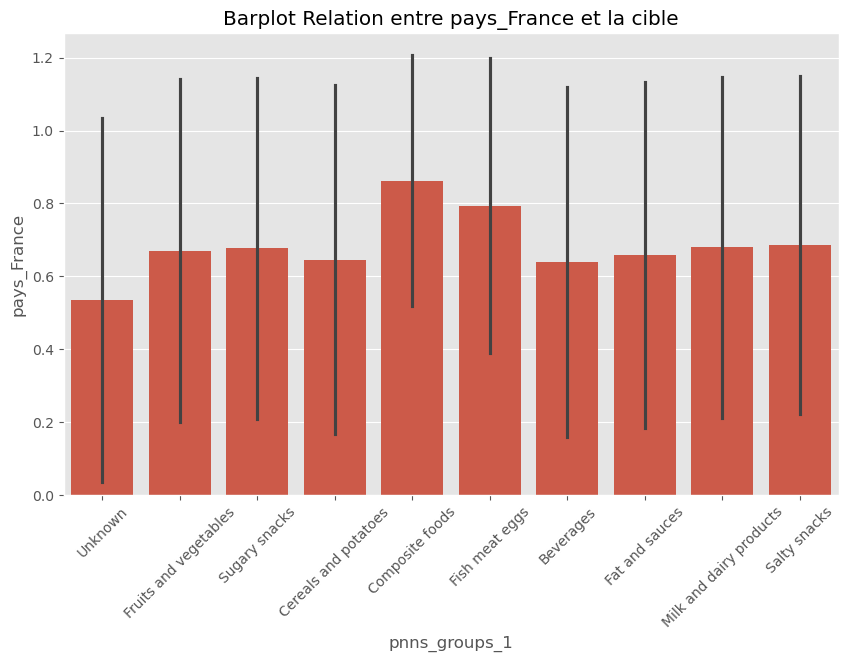

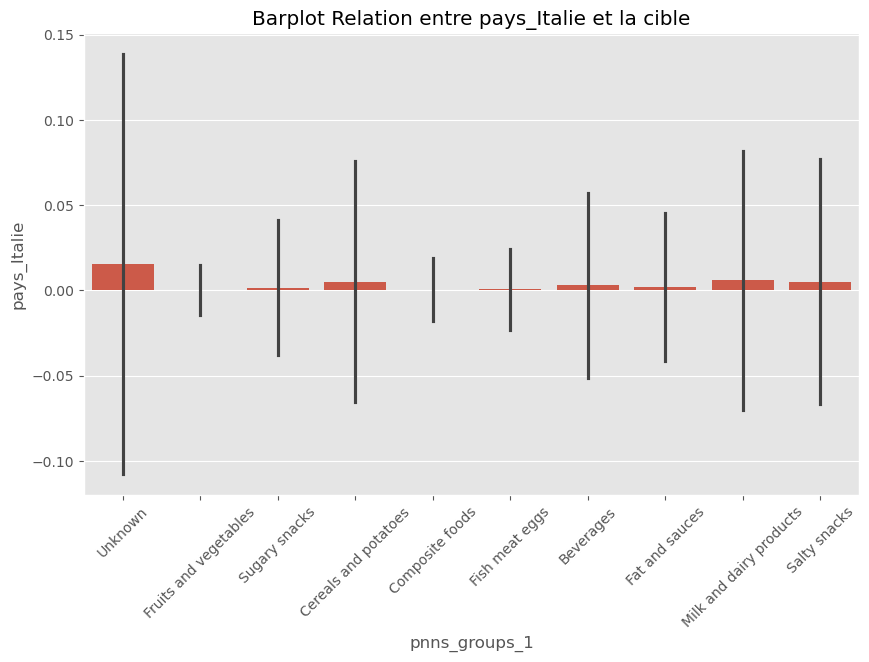

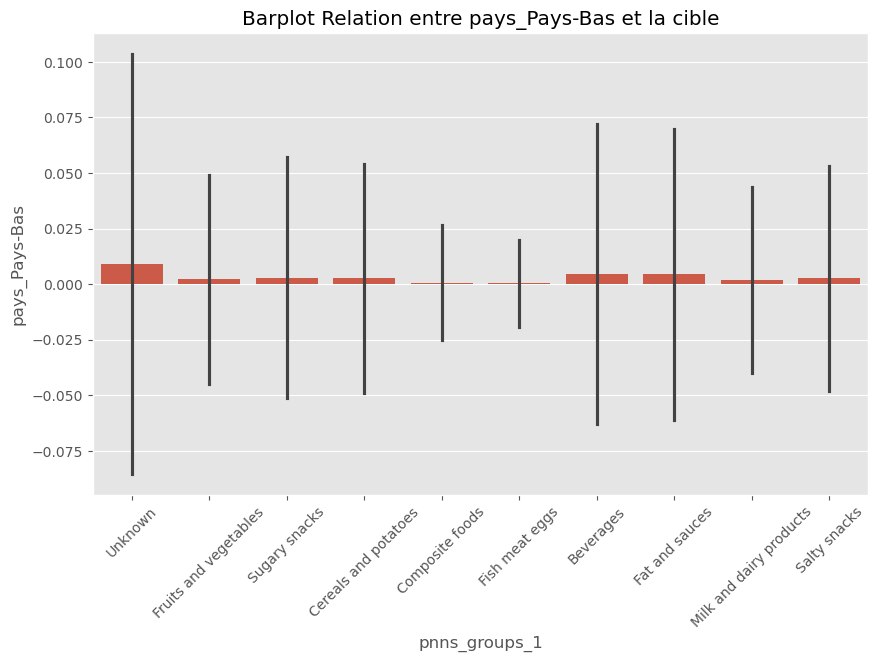

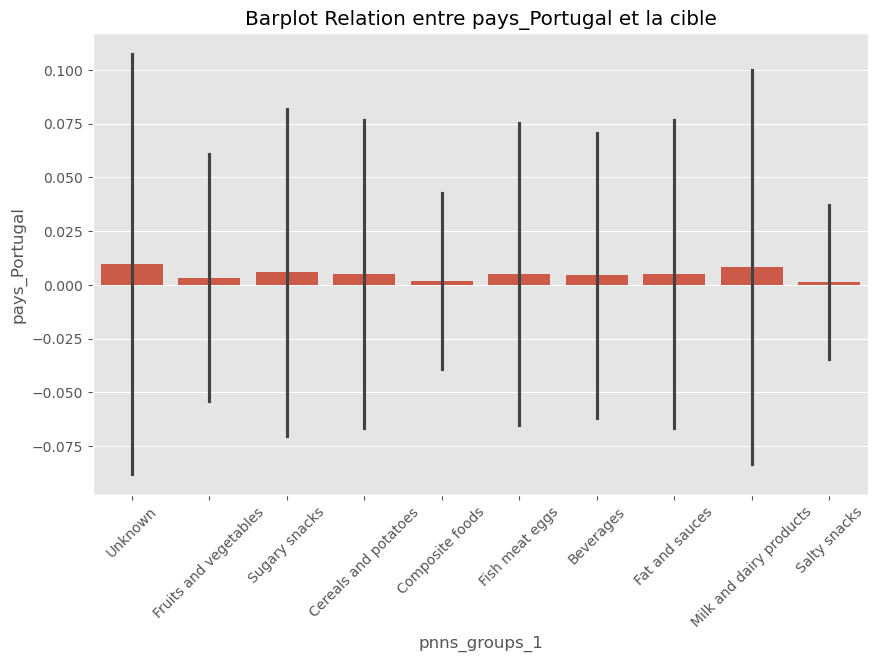

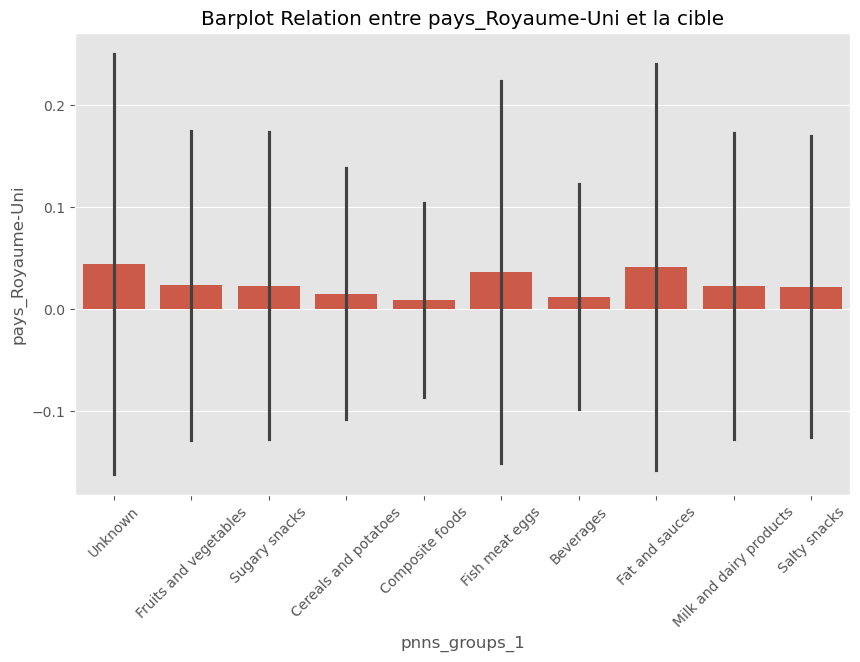

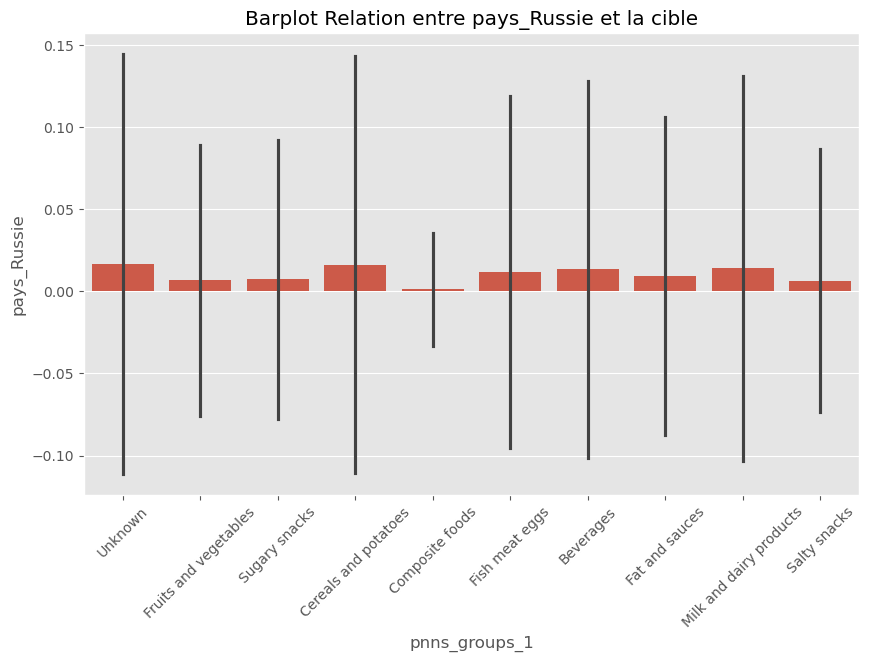

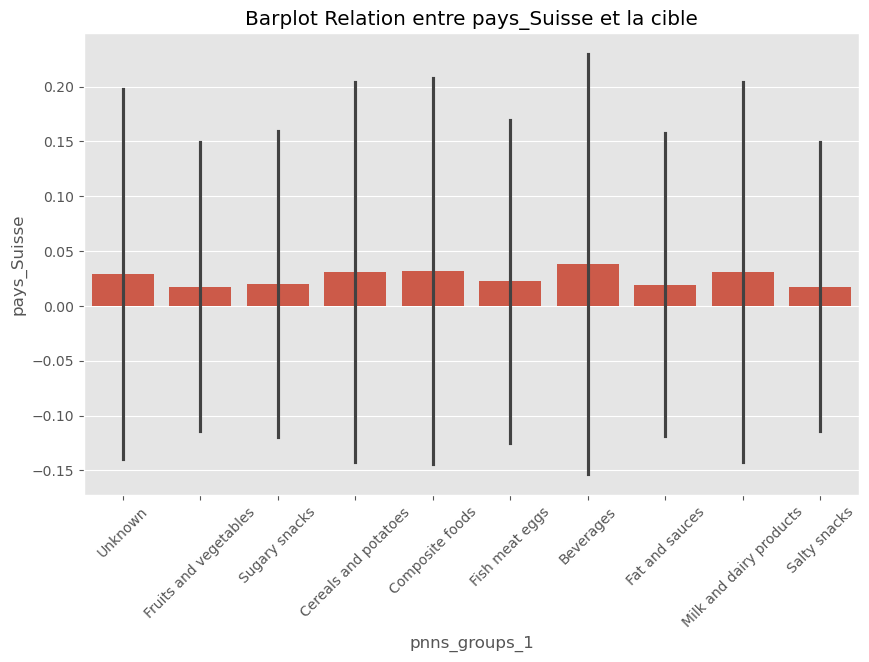

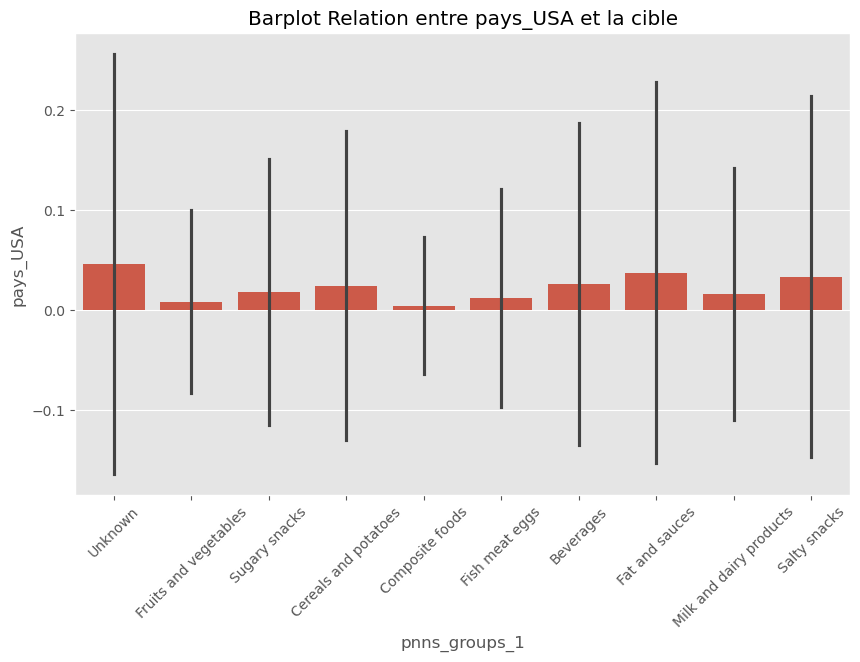

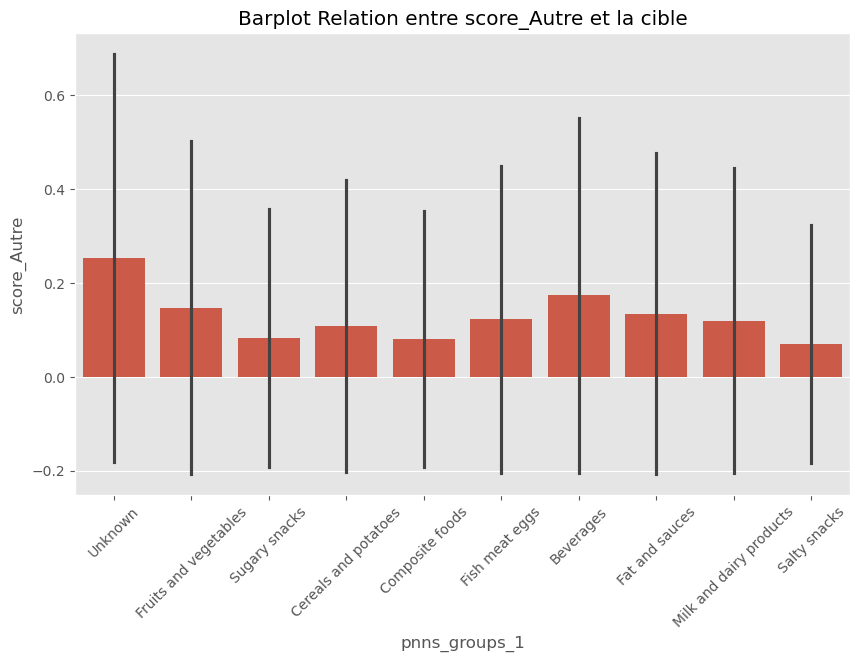

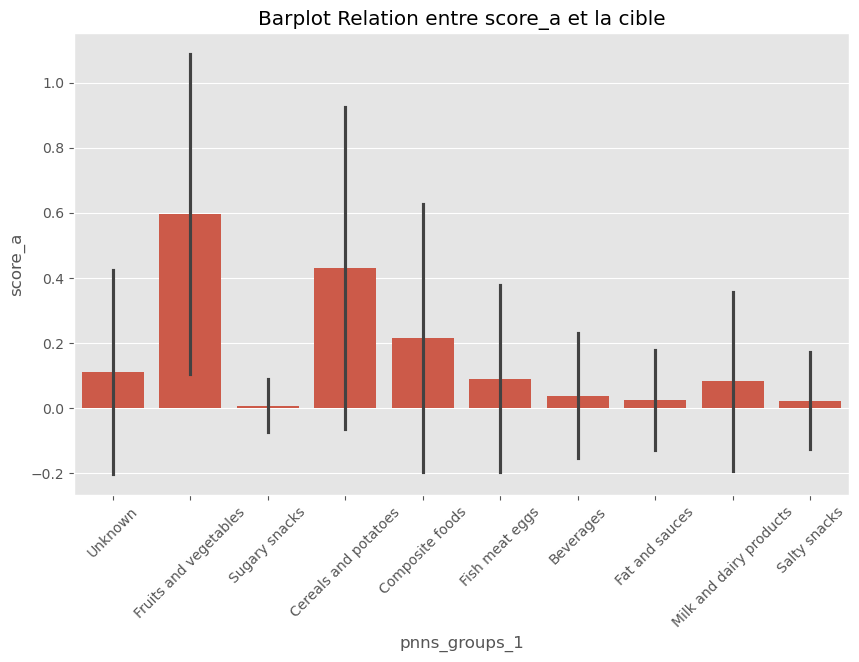

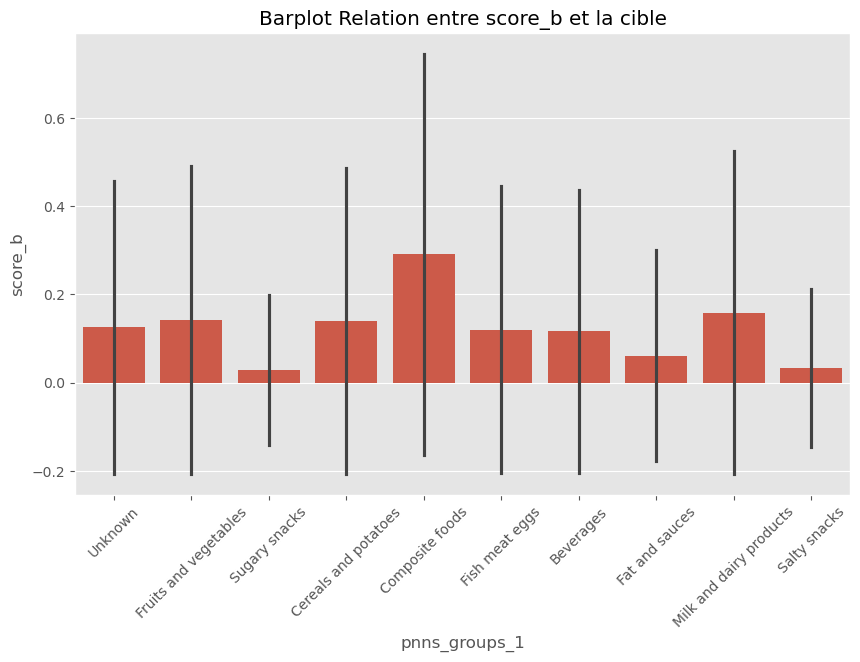

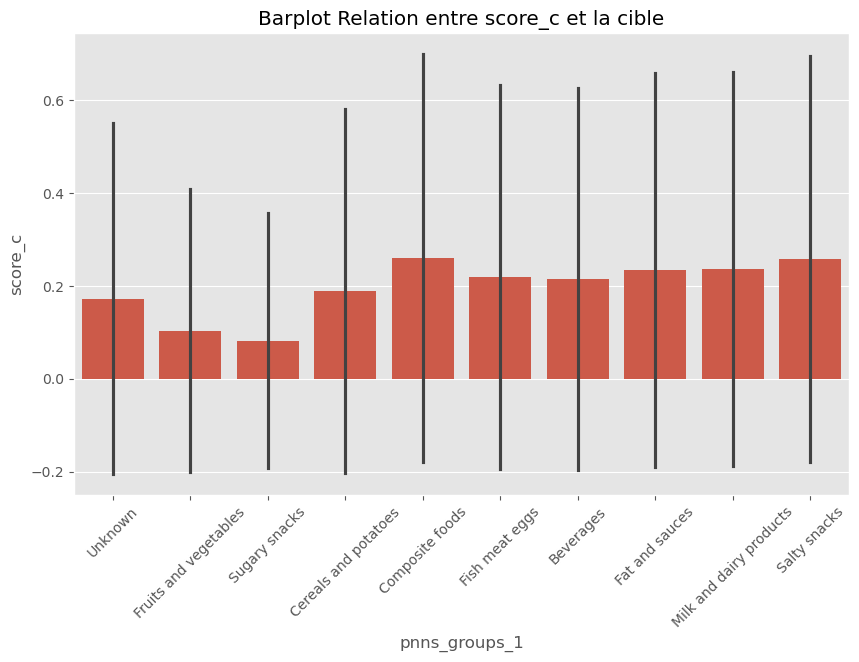

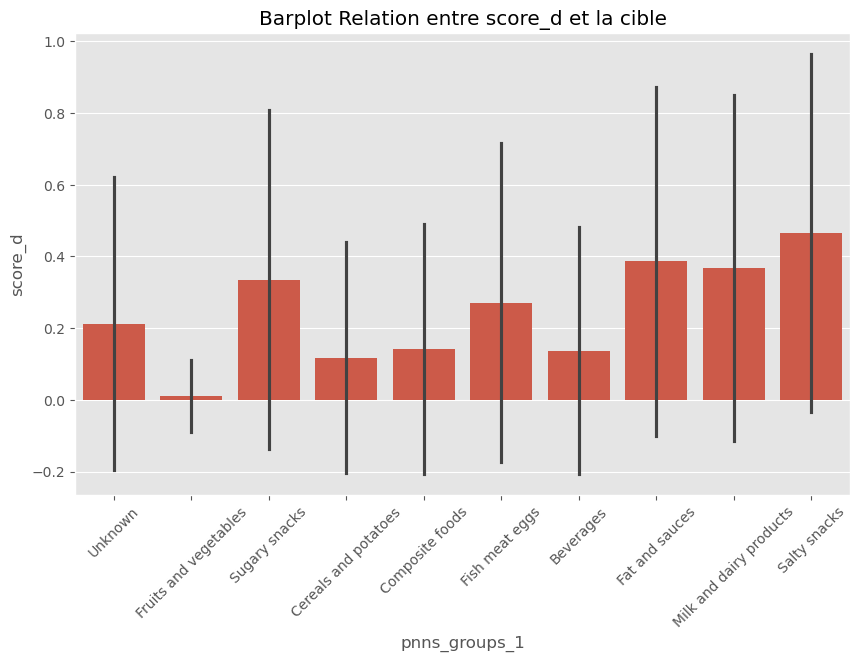

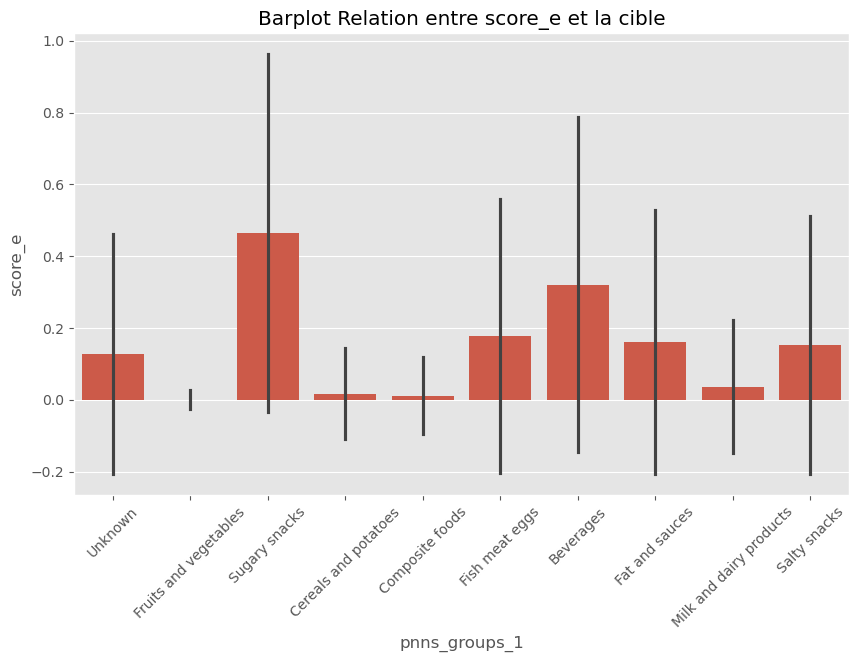

In [626]:
# Barplot
for col in data_encoded.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cible, y=data_encoded[col], errorbar='sd')
    plt.title(f'Barplot Relation entre {col} et la cible')
    plt.xticks(rotation=45)
    plt.ylabel(col)
    plt.show()

Pour ce barplot, on observe des résultat similaire pour les variables quantitative. Cependant pour les variable quantitatives il y a de quoi s'y intéresser de plus près. Les catégorie 'Composite foods' et 'Fish meat eggs' ont les valeurs moyenne les plus élevées, ce qui signifie qu'une grande proportion de produits dans cette catégorie proviennent de France."Beverages" et "Fat and sauces" montrent des proportions proches de la moyenne globale. Enfin pour le nutri-score ont observe encore une fois des résultat qui correspondent à notre distribution réaliser plus tôt. On peut ainsi conclure que réaliser ce Barplot aura permis de détailler notre analyse de 'France'.

Les résultats obtenus à travers nos différents graphiques confortent les données à disposition. Les résultats sont cohérents pour les features quantitatives et intéressantes à analyser pour les valeurs qualitatives. 

## **Analyse multivariée**

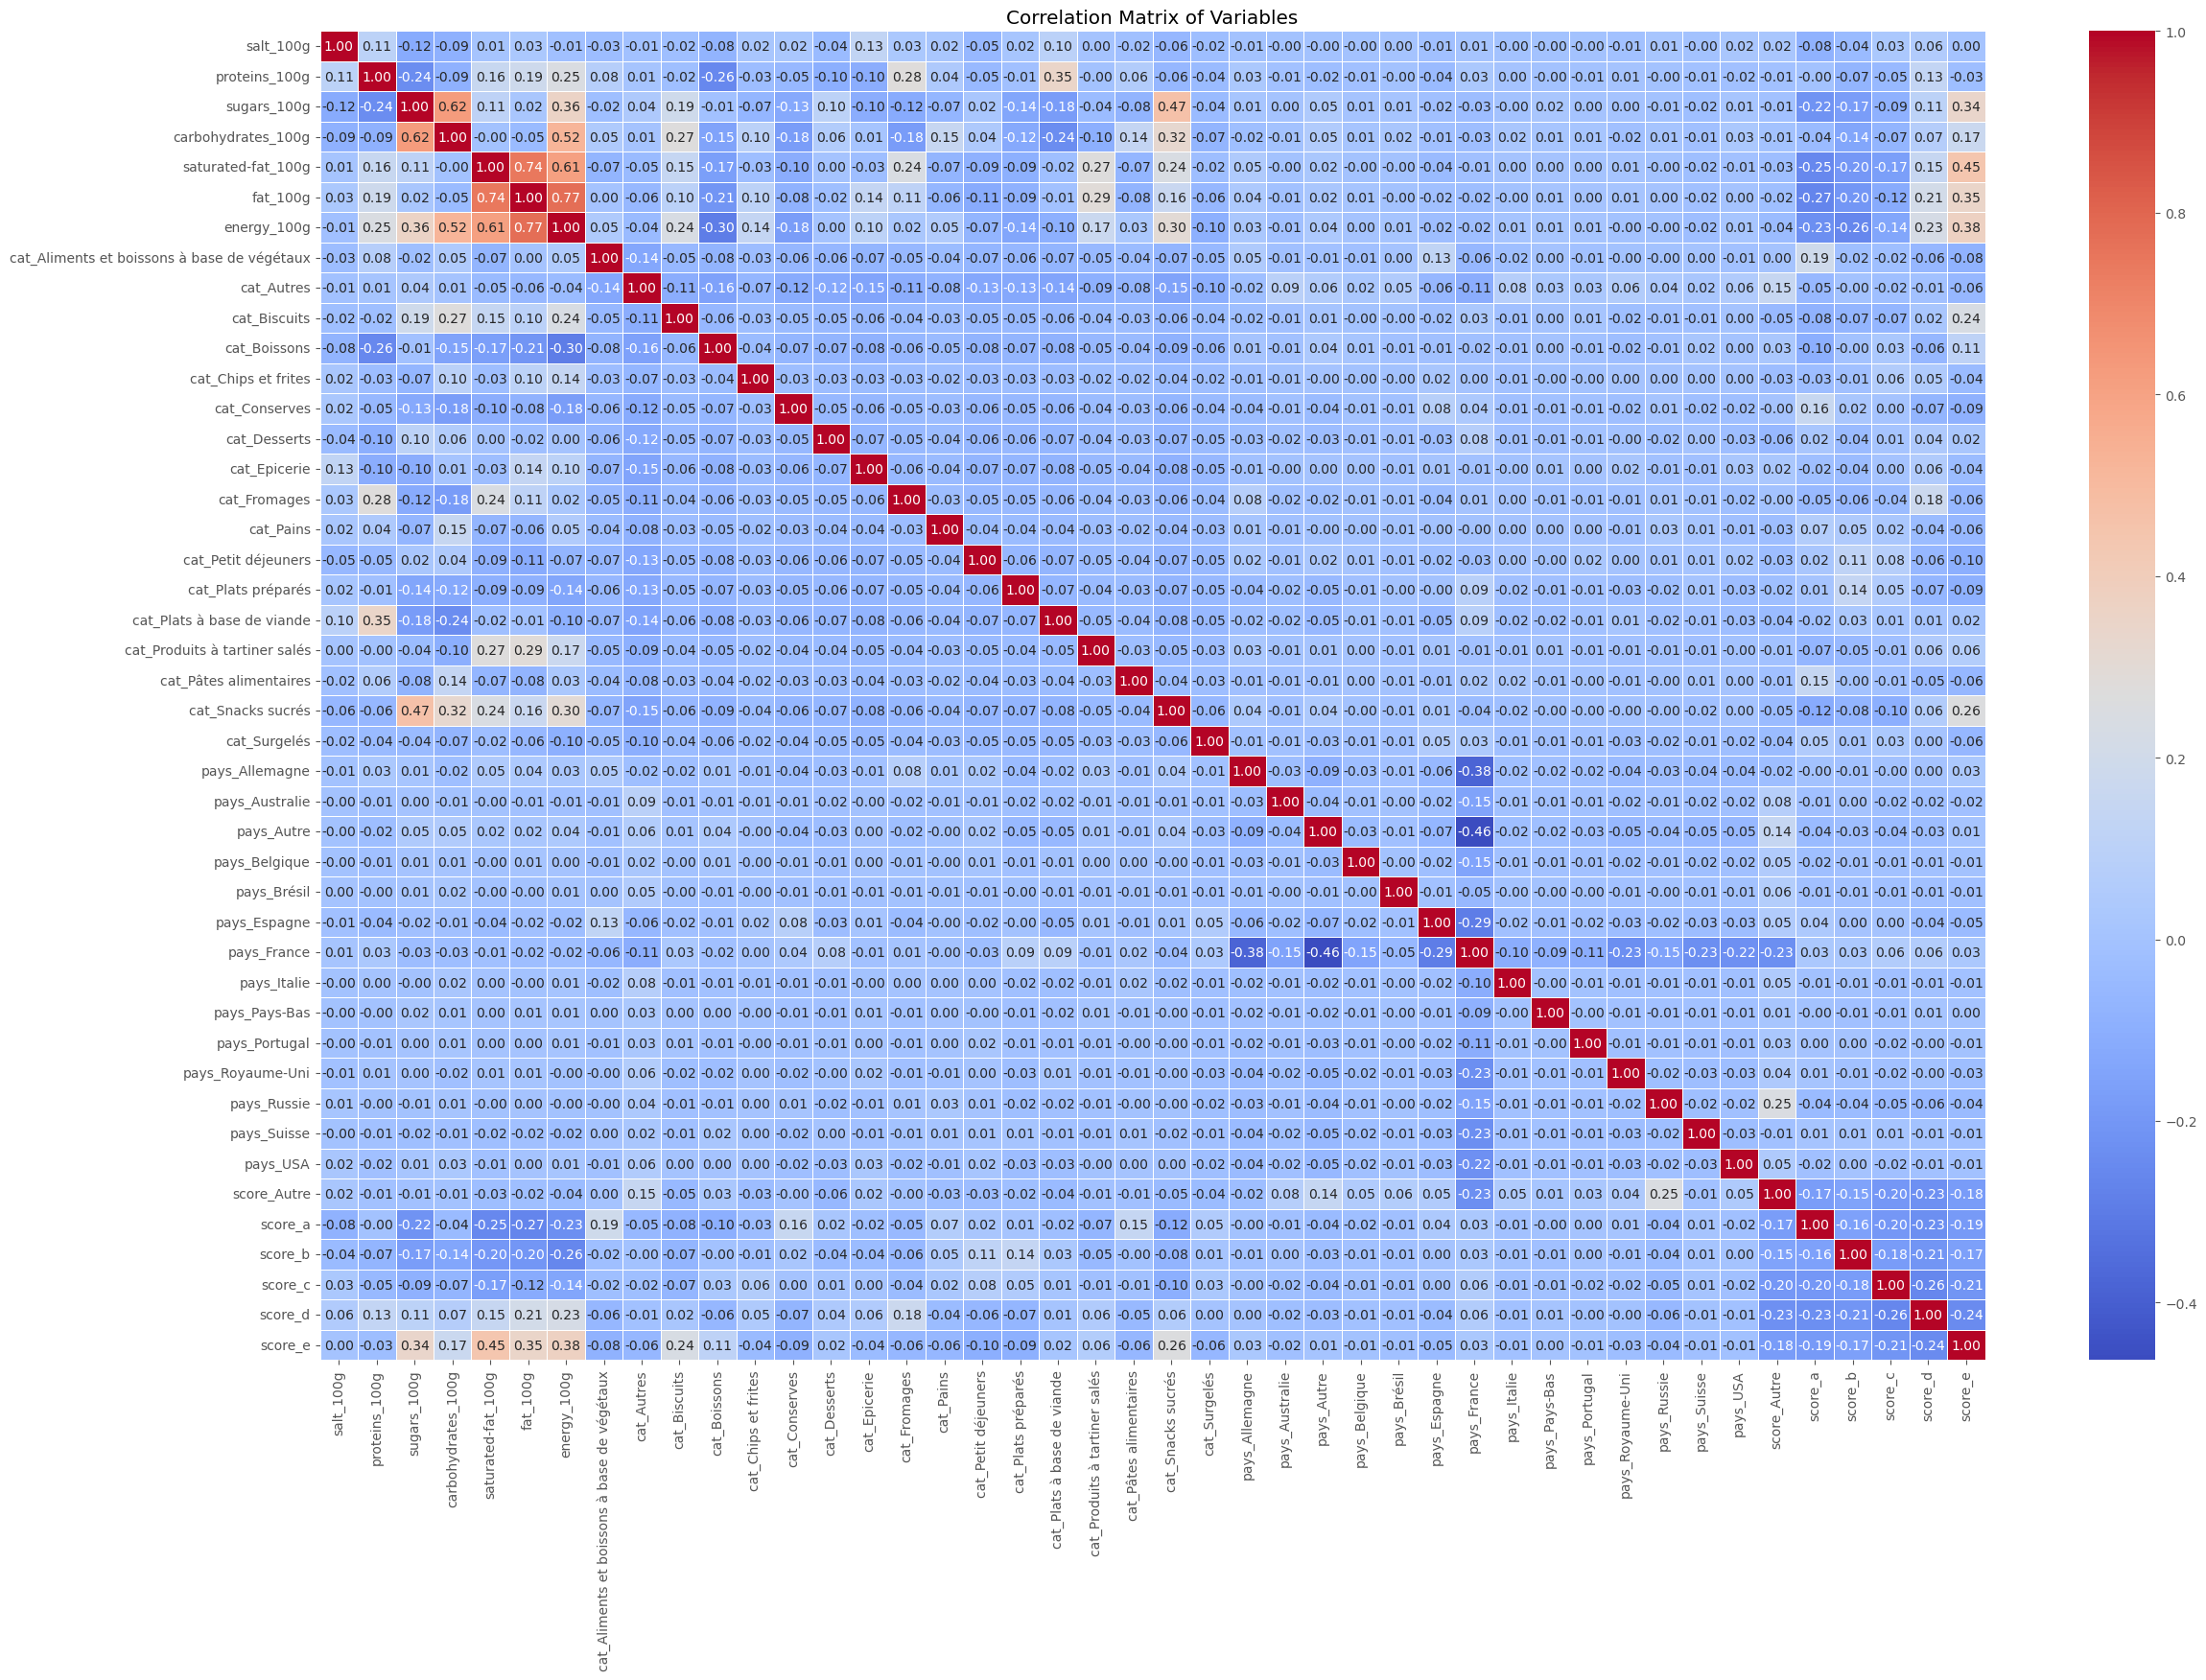

In [636]:
# Calcul de la matrice de corrélation
correlation_matrix = data_encoded.corr()
# Affichage de la matrice de corrélation avec heatmap
plt.figure(figsize=(28, 18))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Variables')
plt.show()

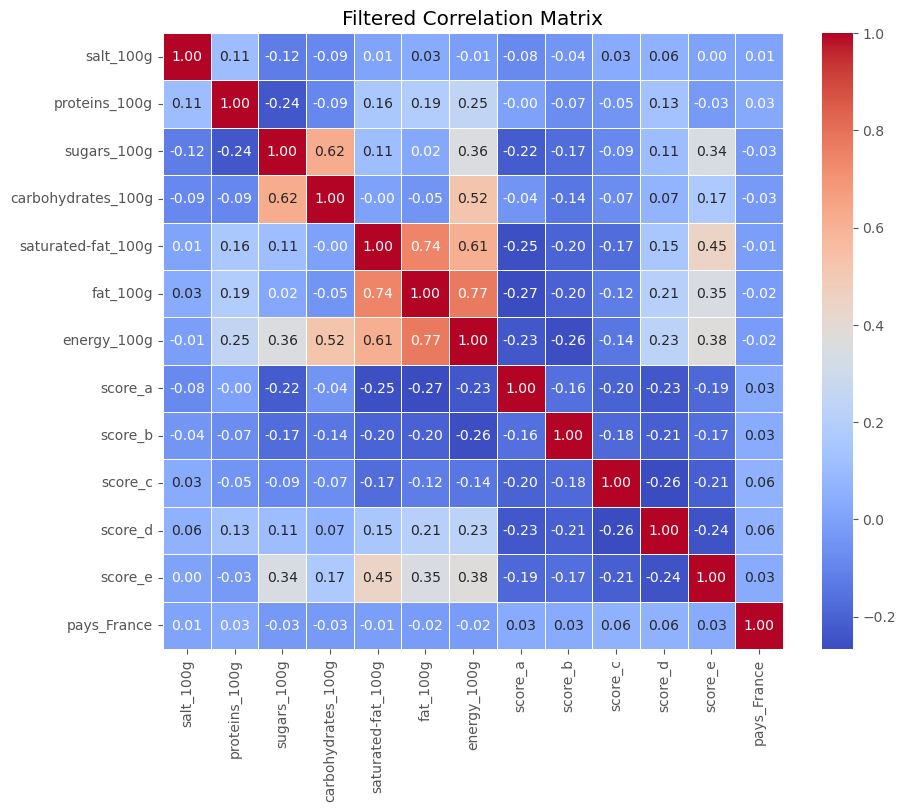

In [638]:
# Liste des colonnes à conserver
selected_columns = ['salt_100g', 'proteins_100g', 'sugars_100g', 'carbohydrates_100g', 'saturated-fat_100g', 'fat_100g', 'energy_100g','score_a', 'score_b', 'score_c', 'score_d', 'score_e', 'pays_France']

# Sélectionner les colonnes et lignes correspondantes dans la matrice de corrélation
filtered_correlation_matrix = correlation_matrix.loc[selected_columns, selected_columns]

# Affichage de la heatmap pour les colonnes sélectionnées
plt.figure(figsize=(10, 8))  # Ajuster la taille selon le nombre de colonnes
sns.heatmap(filtered_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Filtered Correlation Matrix')
plt.show()

De ce matrice de corrélation , on peut observer énormément d'informations intéressantes. Si on observe les nutri-scores, alors on constate qu'un aliment en conserves aura plus tendances à obtenir la note de A. Ce qui est logique étant donné que beaucoup d'aliments en conserves sont des légumes ou de saliments sains. Les plats cuisiné et les plats à base de viande ont plus de chance de venir de >France.

In [647]:
# Transformation d'une features catégorielles
encoded_cible, cible_categories = pd.factorize(cible)

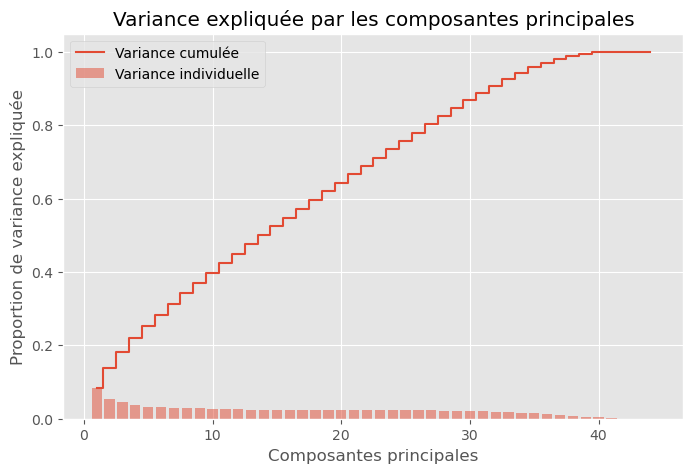

Projection des données sur les deux premières composantes principales :
            PC1       PC2
0     -0.138638 -0.225190
1      2.903473 -2.509949
2     -0.138638 -0.225190
3      0.188001 -2.014725
4     -0.205145  0.694035
...         ...       ...
66145  1.174538 -0.233690
66146 -0.138638 -0.225190
66147 -0.500958 -0.614081
66148 -0.576266 -1.001571
66149  0.037323 -0.916195

[66150 rows x 2 columns]


In [652]:
# Méthode ACP

# Standardiser les données
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_encoded)

# Appliquer l'ACP
pca = PCA()
pca_data = pca.fit_transform(data_standardized)

# Résultats de l'ACP
# Variance expliquée
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Afficher la variance expliquée
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center', label='Variance individuelle')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Variance cumulée')
plt.xlabel('Composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Variance expliquée par les composantes principales')
plt.legend(loc='best')
plt.show()

# Projeter les données
# Créer un DataFrame des composantes principales
pca_df = pd.DataFrame(data=pca_data, columns=[f"PC{i+1}" for i in range(pca_data.shape[1])])

# Afficher les 2 premières composantes principales
print("Projection des données sur les deux premières composantes principales :")
print(pca_df.iloc[:, :2])

In [655]:
# Fixer un seuil de 80 % de variance expliquée
threshold = 0.80
n_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"Nombre de composantes principales retenues : {n_components}")

Nombre de composantes principales retenues : 27


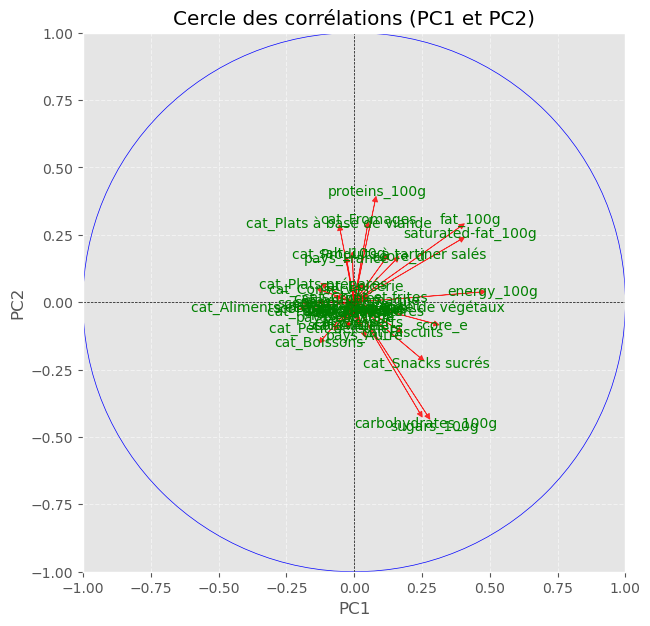

In [660]:
# Récupérer les composantes principales
components = pca.components_
features = data_encoded.columns  # Remplacez par les noms des colonnes de vos données d'origine

# Dimensions du cercle
fig, ax = plt.subplots(figsize=(7, 7))

# Tracer un cercle
circle = plt.Circle((0, 0), 1, color='b', fill=False)
ax.add_artist(circle)

# Ajouter les flèches des variables
for i, feature in enumerate(features):
    plt.arrow(0, 0, components[0, i], components[1, i], 
              color='r', alpha=0.8, head_width=0.02, head_length=0.02)
    plt.text(components[0, i] * 1.1, components[1, i] * 1.1, feature, 
             color='g', ha='center', va='center', fontsize=10)

# Configurations du graphique
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.title('Cercle des corrélations (PC1 et PC2)')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

Les 27 premières composantes sont significatives puisqu'elles expliquent la plus grande majorité de la variance. 
Les composantes au-delà de la 27e contribuent très peu et peuvent être négligées.

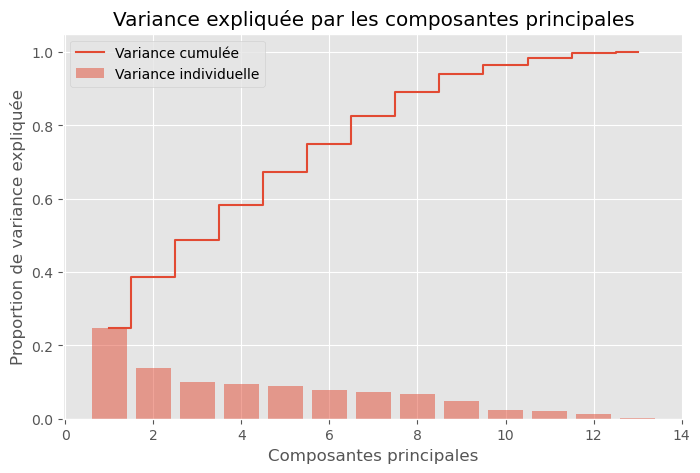

Projection des données sur les deux premières composantes principales :
            PC1       PC2
0     -0.018763  0.025698
1      2.943113 -2.612234
2     -0.018763  0.025698
3      0.101239 -1.467718
4     -0.192794  1.352544
...         ...       ...
66145  0.828245 -0.031626
66146 -0.018763  0.025698
66147 -0.452972 -0.767083
66148  0.019405 -0.075633
66149  0.019405 -0.075633

[66150 rows x 2 columns]


In [675]:
# Liste des variables à utiliser pour l'ACP
selected_variables = ['salt_100g', 'proteins_100g', 'sugars_100g', 'carbohydrates_100g', 'saturated-fat_100g', 'fat_100g',
                      'energy_100g', 'score_a','score_b', 'score_c', 'score_d', 'score_e', 'pays_France']

# Filtrer les données pour ne conserver que les colonnes sélectionnées
data_filtered = data_encoded[selected_variables]
# Standardiser les données
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_filtered)
# Appliquer l'ACP
pca = PCA()
pca_data = pca.fit_transform(data_standardized)
# Variance expliquée
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
# Afficher la variance expliquée
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center', label='Variance individuelle')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Variance cumulée')
plt.xlabel('Composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Variance expliquée par les composantes principales')
plt.legend(loc='best')
plt.show()
# Créer un DataFrame des composantes principales
pca_df = pd.DataFrame(data=pca_data, columns=[f"PC{i+1}" for i in range(pca_data.shape[1])])
# Afficher les 2 premières composantes principales
print("Projection des données sur les deux premières composantes principales :")
print(pca_df.iloc[:, :2])

In [679]:
# Fixer un seuil de 80 % de variance expliquée
threshold = 0.80
n_components2 = np.argmax(cumulative_variance >= threshold) + 1
print(f"Nombre de composantes principales retenues : {n_components2}")

Nombre de composantes principales retenues : 7


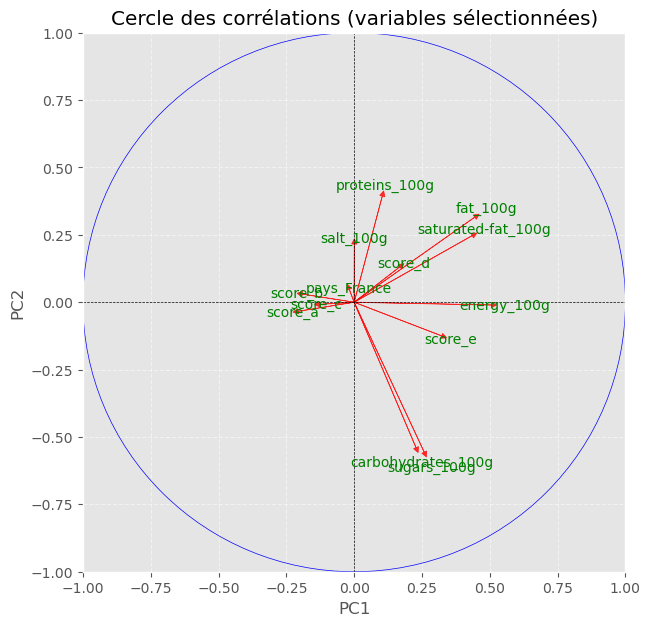

In [685]:
selected_features = ['salt_100g', 'proteins_100g', 'sugars_100g', 'carbohydrates_100g', 'saturated-fat_100g', 'fat_100g', 'energy_100g', 'score_a','score_b', 'score_c', 'score_d', 'score_e', 'pays_France']  # Remplacez par vos colonnes
data_subset = data_encoded[selected_features]

# Standardiser les données
scaler = StandardScaler()
data_subset_standardized = scaler.fit_transform(data_subset)

# Appliquer l'ACP sur l'échantillon de variables
pca = PCA()
pca_data_subset = pca.fit_transform(data_subset_standardized)

# Récupérer les composantes principales pour les variables sélectionnées
components_subset = pca.components_

# Dimensions du cercle
fig, ax = plt.subplots(figsize=(7, 7))

# Tracer un cercle
circle = plt.Circle((0, 0), 1, color='b', fill=False)
ax.add_artist(circle)

# Ajouter les flèches des variables sélectionnées
for i, feature in enumerate(selected_features):
    plt.arrow(0, 0, components_subset[0, i], components_subset[1, i], 
              color='r', alpha=0.8, head_width=0.02, head_length=0.02)
    plt.text(components_subset[0, i] * 1.1, components_subset[1, i] * 1.1, feature, 
             color='g', ha='center', va='center', fontsize=10)

# Configurations du graphique
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.title('Cercle des corrélations (variables sélectionnées)')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

Le cercle des corrélations montre comment les variables initiales sont projetées dans l'espace des deux premières composantes principales (PC1 et PC2). La proximité d'une variable au bord du cercle indique sa contribution aux composantes principales. Les variables proches du centre contribuent peu. Les variables projetées dans cette direction (comme carbohydrates_100g et sugars_100g) sont fortement corrélées avec la première composante principale. Les variables proches de cet axe (comme proteins_100g et salt_100g) sont fortement corrélées avec la seconde composante principale. fat_100g et saturated-fat_100g : Très proches l'une de l'autre, indiquant une corrélation élevée entre elles. Leur contribution est répartie entre PC1 et PC2. Pays_France : Cette variable semble proche du centre, ce qui indique qu'elle est peu informative dans cet espace.

    - Les variables comme sugars_100g, carbohydrates_100g, fat_100g, et proteins_100g jouent un rôle clé dans la variance expliquée par les deux premières composantes principales.
Les scores (score_a, score_d, etc.) et la variable Pays_France contribuent peu à l'explication de la variance.

In [692]:
# Appliquer l'ACP avec le nombre optimal de composantes
pca_optimal = PCA(n_components=n_components2)
data_reduced = pca_optimal.fit_transform(data_standardized)

# Convertir en DataFrame
data_reduced_df = pd.DataFrame(data_reduced, columns=[f"PC{i+1}" for i in range(n_components2)])

# Afficher les premières lignes des données réduites
print(data_reduced_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -0.018763  0.025698  0.010382  0.029994  0.016985 -0.584256  0.020149
1  2.943113 -2.612234  1.233163 -0.373260 -0.024526  1.083825  0.566053
2 -0.018763  0.025698  0.010382  0.029994  0.016985 -0.584256  0.020149
3  0.101239 -1.467718 -0.480115 -0.156930  0.088795  1.437020  0.095969
4 -0.192794  1.352544  0.148601  1.748349  1.109818  1.504184 -0.065115


In [694]:
grouped = data_encoded.groupby('pays_France')

# Moyennes des features par catégorie
group_stats = grouped.mean()
print("Moyennes des features par catégorie :")
print(group_stats)

Moyennes des features par catégorie :
             salt_100g  proteins_100g  sugars_100g  carbohydrates_100g  \
pays_France                                                              
False         0.859432       7.108072    14.065928           29.229532   
True          0.904500       7.542372    12.849794           27.666103   

             saturated-fat_100g   fat_100g  energy_100g  \
pays_France                                               
False                  5.329650  13.562319  1121.376552   
True                   5.124589  12.750075  1082.956845   

             cat_Aliments et boissons à base de végétaux  cat_Autres  \
pays_France                                                            
False                                           0.082801    0.278253   
True                                            0.052572    0.184911   

             cat_Biscuits  cat_Boissons  cat_Chips et frites  cat_Conserves  \
pays_France                                                 

In [696]:
data_numeric = data_encoded.select_dtypes(include=['number'])

In [697]:
# Grouper par 'main_categories_fr' et calculer les moyennes
grouped = data_encoded.groupby('pays_France')
group_stats = grouped[data_numeric.columns].mean()

print("Moyennes des features numériques par catégorie :")
print(group_stats)

Moyennes des features numériques par catégorie :
             salt_100g  proteins_100g  sugars_100g  carbohydrates_100g  \
pays_France                                                              
False         0.859432       7.108072    14.065928           29.229532   
True          0.904500       7.542372    12.849794           27.666103   

             saturated-fat_100g   fat_100g  energy_100g  
pays_France                                              
False                  5.329650  13.562319  1121.376552  
True                   5.124589  12.750075  1082.956845  


In [699]:
# Fréquences des catégories dans chaque groupe
category_counts = grouped['pays_France'].size()
print("Nombre d'éléments dans chaque catégorie :")
print(category_counts)

Nombre d'éléments dans chaque catégorie :
pays_France
False    22210
True     43940
Name: pays_France, dtype: int64


Les produits français semblent globalement :
- Plus riches en protéines (7.50 g vs 7.04 g).
- Moins sucrés et moins gras (moins de glucides, lipides et acides gras saturés).
- Moins caloriques (moins d'énergie par 100 g).

## **Conclusion**

**Faisabilité de l'application de suggestion pour Santé publique France**

    Après avoir réalisé une analyse approfondie des données d'Open Food Facts confiées par Santé publique France, nous pouvons conclure que la création d’un système de suggestion ou d’auto-complétion est techniquement faisable mais nécessite certaines conditions pour garantir son efficacité et sa pertinence. Voici les points clés à retenir :

        Une part significative des données comporte des valeurs manquantes ou incomplètes. Ces lacunes devront être traitées via des techniques avancées, comme l’imputation par KNN.
        Les valeurs aberrantes ont été identifiées et des approches statistiques ont été proposées pour les corriger ou les justifier en fonction des spécificités produits.

        Les colonnes sélectionnées offrent une base solide pour la modélisation et la suggestion. Elles permettent de définir des patterns d’auto-complétion pertinents pour guider les utilisateurs dans leur saisie.

        Les techniques comme l'ACP et des analyse uni/bi/multi variées, sont adaptées pour exploiter efficacement les relations des produits. Cela permettrait de développer un modèle d’auto-complétion robuste et évolutif.

        Le projet est en accord avec les principes fondamentaux de la RGPD. L’utilisation des données est restreinte aux besoins du développement et leur anonymisation est assurée, garantissant la confidentialité des informations.